In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [8]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 800
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [9]:
# sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
#                                   kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

sim_rln = MaaSSim.simulators.simulate_RLn(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-04-01 14:36:26,639] Setting up 4h simulation at 2023-04-01 12:36:05 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
Day =  0
comm_rate =  0.1


[2023-04-01 14:36:35,103] simulation time 3.5 s


nP =  0    nV =  0
revenue =  0.0    npnv =  0.0
reward: 0.0
mean reward so far: nan
Day =  1
comm_rate =  0.15


[2023-04-01 14:36:44,604] simulation time 4.1 s


nP =  25    nV =  2
revenue =  0.0015752522727272725    npnv =  0.019125
reward: 27.724439999999994
mean reward so far: 0.0
Day =  2
comm_rate =  0.2


[2023-04-01 14:36:54,581] simulation time 4.5 s


nP =  36    nV =  5
revenue =  0.0033249818181818186    npnv =  0.03655
reward: 58.51968000000001
mean reward so far: 13.862219999999997
Day =  3
comm_rate =  0.2


[2023-04-01 14:37:05,145] simulation time 5.1 s


nP =  66    nV =  6
revenue =  0.006082295454545453    npnv =  0.05355
reward: 107.04839999999999
mean reward so far: 28.748040000000003
Day =  4
comm_rate =  0.25


[2023-04-01 14:37:15,739] simulation time 5.1 s


nP =  70    nV =  5
revenue =  0.007126238636363636    npnv =  0.051000000000000004
reward: 125.42179999999999
mean reward so far: 48.32313
Day =  5
comm_rate =  0.3


[2023-04-01 14:37:27,156] simulation time 5.9 s


nP =  92    nV =  10
revenue =  0.011100974999999999    npnv =  0.0816
reward: 195.37716
mean reward so far: 63.742864
Day =  6
comm_rate =  0.35


[2023-04-01 14:37:38,580] simulation time 6.0 s


nP =  102    nV =  7
revenue =  0.014459001136363636    npnv =  0.0731
reward: 254.47842
mean reward so far: 85.68191333333334
Day =  7
comm_rate =  0.4


[2023-04-01 14:37:51,127] simulation time 7.0 s


nP =  133    nV =  11
revenue =  0.022388554545454544    npnv =  0.10327499999999999
reward: 394.03855999999996
mean reward so far: 109.79570000000001
Day =  8
comm_rate =  0.4


[2023-04-01 14:38:03,398] simulation time 6.8 s


nP =  131    nV =  10
revenue =  0.021820781818181815    npnv =  0.098175
reward: 384.04576
mean reward so far: 145.3260575
Day =  9
comm_rate =  0.45


[2023-04-01 14:38:15,643] simulation time 6.7 s


nP =  132    nV =  10
revenue =  0.024742707954545456    npnv =  0.09860000000000001
reward: 435.47166000000004
mean reward so far: 171.85046888888888
Day =  10
comm_rate =  0.5


[2023-04-01 14:38:27,738] simulation time 6.6 s


nP =  148    nV =  7
revenue =  0.030467170454545455    npnv =  0.09265
reward: 536.2222
mean reward so far: 198.212588
Day =  11
comm_rate =  0.45


[2023-04-01 14:38:40,488] simulation time 7.2 s


nP =  136    nV =  15
revenue =  0.025345779545454545    npnv =  0.12155
reward: 446.08572000000004
mean reward so far: 228.94073454545457
Day =  12
comm_rate =  0.5


[2023-04-01 14:38:53,251] simulation time 7.2 s


nP =  142    nV =  12
revenue =  0.02829742045454545    npnv =  0.11135
reward: 498.03459999999995
mean reward so far: 247.03615000000002
Day =  13
comm_rate =  0.45


[2023-04-01 14:39:06,841] simulation time 8.1 s


nP =  179    nV =  16
revenue =  0.030593342045454542    npnv =  0.14407499999999998
reward: 538.44282
mean reward so far: 266.3437230769231
Day =  14
comm_rate =  0.5


[2023-04-01 14:39:19,348] simulation time 6.8 s


nP =  124    nV =  18
revenue =  0.02660681818181818    npnv =  0.12919999999999998
reward: 468.28
mean reward so far: 285.77937285714285
Day =  15
comm_rate =  0.45


[2023-04-01 14:39:32,449] simulation time 7.6 s


nP =  158    nV =  16
revenue =  0.028340928409090905    npnv =  0.13515
reward: 498.80034
mean reward so far: 297.9460813333333
Day =  16
comm_rate =  0.45


[2023-04-01 14:39:45,959] simulation time 8.0 s


nP =  172    nV =  15
revenue =  0.03370154318181818    npnv =  0.13684999999999997
reward: 593.14716
mean reward so far: 310.4994725
Day =  17
comm_rate =  0.45


[2023-04-01 14:39:58,994] simulation time 7.5 s


nP =  152    nV =  15
revenue =  0.028634185227272724    npnv =  0.12835
reward: 503.96165999999994
mean reward so far: 327.12580705882357
Day =  18
comm_rate =  0.4


[2023-04-01 14:40:12,307] simulation time 7.7 s


nP =  158    nV =  18
revenue =  0.02596920909090909    npnv =  0.14364999999999997
reward: 457.05808
mean reward so far: 336.95002111111114
Day =  19
comm_rate =  0.45


[2023-04-01 14:40:25,349] simulation time 7.5 s


nP =  162    nV =  11
revenue =  0.029978989772727272    npnv =  0.11560000000000001
reward: 527.63022
mean reward so far: 343.27149789473685
Day =  20
comm_rate =  0.45


[2023-04-01 14:40:38,629] simulation time 7.8 s


nP =  167    nV =  14
revenue =  0.030361540909090906    npnv =  0.130475
reward: 534.36312
mean reward so far: 352.489434
Day =  21
comm_rate =  0.45


[2023-04-01 14:40:52,124] simulation time 7.9 s


nP =  173    nV =  13
revenue =  0.032058245454545456    npnv =  0.128775
reward: 564.2251200000001
mean reward so far: 361.15008571428575
Day =  22
comm_rate =  0.45


[2023-04-01 14:41:05,144] simulation time 7.5 s


nP =  156    nV =  13
revenue =  0.028346226136363634    npnv =  0.12155
reward: 498.89358
mean reward so far: 370.3807690909091
Day =  23
comm_rate =  0.5


[2023-04-01 14:41:18,970] simulation time 8.3 s


nP =  187    nV =  16
revenue =  0.03981755681818182    npnv =  0.147475
reward: 700.789
mean reward so far: 375.9682826086957
Day =  24
comm_rate =  0.55


[2023-04-01 14:41:31,815] simulation time 7.3 s


nP =  146    nV =  20
revenue =  0.033622025    npnv =  0.14705
reward: 591.74764
mean reward so far: 389.50247916666666
Day =  25
comm_rate =  0.55


[2023-04-01 14:41:44,838] simulation time 7.5 s


nP =  155    nV =  17
revenue =  0.0358555625    npnv =  0.138125
reward: 631.0579
mean reward so far: 397.59228559999997
Day =  26
comm_rate =  0.5


[2023-04-01 14:41:57,913] simulation time 7.5 s


nP =  158    nV =  17
revenue =  0.03392864772727272    npnv =  0.1394
reward: 597.1442
mean reward so far: 406.5717323076923
Day =  27
comm_rate =  0.45


[2023-04-01 14:42:10,958] simulation time 7.5 s


nP =  155    nV =  10
revenue =  0.028614671590909097    npnv =  0.108375
reward: 503.61822000000006
mean reward so far: 413.62997185185185
Day =  28
comm_rate =  0.5


[2023-04-01 14:42:24,226] simulation time 7.7 s


nP =  165    nV =  18
revenue =  0.03500127272727272    npnv =  0.14662499999999998
reward: 616.0224
mean reward so far: 416.84383785714283
Day =  29
comm_rate =  0.55


[2023-04-01 14:42:37,421] simulation time 7.6 s


nP =  161    nV =  14
revenue =  0.03502055    npnv =  0.127925
reward: 616.36168
mean reward so far: 423.712064137931
Day =  30
comm_rate =  0.5


[2023-04-01 14:42:50,337] simulation time 7.3 s


nP =  151    nV =  10
revenue =  0.029270545454545445    npnv =  0.10667499999999999
reward: 515.1615999999999
mean reward so far: 430.133718
Day =  31
comm_rate =  0.5


[2023-04-01 14:43:03,346] simulation time 7.5 s


nP =  155    nV =  21
revenue =  0.03208565909090909    npnv =  0.15512499999999999
reward: 564.7076
mean reward so far: 432.8765529032258
Day =  32
comm_rate =  0.5


[2023-04-01 14:43:16,260] simulation time 7.4 s


nP =  160    nV =  10
revenue =  0.03380528409090909    npnv =  0.1105
reward: 594.973
mean reward so far: 436.996273125
Day =  33
comm_rate =  0.55


[2023-04-01 14:43:29,391] simulation time 7.6 s


nP =  161    nV =  14
revenue =  0.0383704625    npnv =  0.127925
reward: 675.32014
mean reward so far: 441.7834466666667
Day =  34
comm_rate =  0.5


[2023-04-01 14:43:42,772] simulation time 7.9 s


nP =  170    nV =  16
revenue =  0.03651290909090909    npnv =  0.14025
reward: 642.6272
mean reward so far: 448.6521729411765
Day =  35
comm_rate =  0.5


[2023-04-01 14:43:55,561] simulation time 7.3 s


nP =  145    nV =  19
revenue =  0.030710886363636364    npnv =  0.14237499999999997
reward: 540.5116
mean reward so far: 454.1943165714286
Day =  36
comm_rate =  0.45


[2023-04-01 14:44:08,567] simulation time 7.5 s


nP =  151    nV =  21
revenue =  0.028316976136363636    npnv =  0.15342499999999998
reward: 498.37878
mean reward so far: 456.59201888888896
Day =  37
comm_rate =  0.5


[2023-04-01 14:44:22,123] simulation time 7.8 s


nP =  151    nV =  13
revenue =  0.032634261363636355    npnv =  0.119425
reward: 574.3629999999999
mean reward so far: 457.7213908108109
Day =  38
comm_rate =  0.45


[2023-04-01 14:44:36,127] simulation time 8.0 s


nP =  172    nV =  20
revenue =  0.033287093181818175    npnv =  0.1581
reward: 585.8528399999999
mean reward so far: 460.79090684210536
Day =  39
comm_rate =  0.45


[2023-04-01 14:44:49,235] simulation time 7.4 s


nP =  163    nV =  10
revenue =  0.032057918181818176    npnv =  0.111775
reward: 564.2193599999999
mean reward so far: 463.99762307692316
Day =  40
comm_rate =  0.45


[2023-04-01 14:45:02,152] simulation time 7.3 s


nP =  143    nV =  16
revenue =  0.02746634318181818    npnv =  0.128775
reward: 483.40764
mean reward so far: 466.5031665
Day =  41
comm_rate =  0.5


[2023-04-01 14:45:15,621] simulation time 7.9 s


nP =  167    nV =  17
revenue =  0.03270270454545454    npnv =  0.14322500000000002
reward: 575.5676
mean reward so far: 466.9154707317074
Day =  42
comm_rate =  0.45


[2023-04-01 14:45:28,674] simulation time 7.4 s


nP =  150    nV =  15
revenue =  0.028439253409090908    npnv =  0.1275
reward: 500.53085999999996
mean reward so far: 469.5024261904762
Day =  43
comm_rate =  0.4


[2023-04-01 14:45:42,728] simulation time 8.4 s


nP =  206    nV =  12
revenue =  0.03344428181818182    npnv =  0.13854999999999998
reward: 588.61936
mean reward so far: 470.22401767441863
Day =  44
comm_rate =  0.4


[2023-04-01 14:45:55,967] simulation time 7.7 s


nP =  159    nV =  12
revenue =  0.026820409090909093    npnv =  0.11857500000000001
reward: 472.03920000000005
mean reward so far: 472.9148209090909
Day =  45
comm_rate =  0.4


[2023-04-01 14:46:09,217] simulation time 7.6 s


nP =  158    nV =  13
revenue =  0.026222654545454544    npnv =  0.12240000000000001
reward: 461.51872000000003
mean reward so far: 472.8953626666667
Day =  46
comm_rate =  0.45


[2023-04-01 14:46:22,357] simulation time 7.5 s


nP =  154    nV =  17
revenue =  0.02886768409090909    npnv =  0.1377
reward: 508.07124
mean reward so far: 472.6480443478261
Day =  47
comm_rate =  0.4


[2023-04-01 14:46:35,492] simulation time 7.5 s


nP =  153    nV =  15
revenue =  0.026205763636363635    npnv =  0.128775
reward: 461.22144000000003
mean reward so far: 473.40172936170217
Day =  48
comm_rate =  0.35


[2023-04-01 14:46:48,615] simulation time 7.6 s


nP =  158    nV =  21
revenue =  0.021576028409090908    npnv =  0.15639999999999998
reward: 379.7381
mean reward so far: 473.1479733333333
Day =  49
comm_rate =  0.35


[2023-04-01 14:47:02,246] simulation time 8.1 s


nP =  177    nV =  17
revenue =  0.026424037499999997    npnv =  0.147475
reward: 465.06305999999995
mean reward so far: 471.24164938775505
Day =  50
comm_rate =  0.3


[2023-04-01 14:47:15,584] simulation time 7.8 s


nP =  166    nV =  13
revenue =  0.021339729545454544    npnv =  0.12580000000000002
reward: 375.57923999999997
mean reward so far: 471.11807759999994
Day =  51
comm_rate =  0.3


[2023-04-01 14:47:29,015] simulation time 7.8 s


nP =  165    nV =  17
revenue =  0.020565940909090908    npnv =  0.142375
reward: 361.96056
mean reward so far: 469.24476705882347
Day =  52
comm_rate =  0.3


[2023-04-01 14:47:43,191] simulation time 8.6 s


nP =  191    nV =  23
revenue =  0.023987788636363635    npnv =  0.178925
reward: 422.18507999999997
mean reward so far: 467.18160923076914
Day =  53
comm_rate =  0.35


[2023-04-01 14:47:56,168] simulation time 7.3 s


nP =  146    nV =  18
revenue =  0.02073147045454545    npnv =  0.13854999999999998
reward: 364.87388
mean reward so far: 466.33261811320745
Day =  54
comm_rate =  0.3


[2023-04-01 14:48:09,871] simulation time 8.1 s


nP =  176    nV =  19
revenue =  0.020698799999999996    npnv =  0.15555
reward: 364.29887999999994
mean reward so far: 464.4537525925925
Day =  55
comm_rate =  0.3


[2023-04-01 14:48:23,013] simulation time 7.6 s


nP =  170    nV =  11
revenue =  0.020089275    npnv =  0.11900000000000001
reward: 353.57124
mean reward so far: 462.6327549090908
Day =  56
comm_rate =  0.3


[2023-04-01 14:48:36,658] simulation time 8.1 s


nP =  178    nV =  18
revenue =  0.022503184090909085    npnv =  0.15214999999999998
reward: 396.05603999999994
mean reward so far: 460.6852278571428
Day =  57
comm_rate =  0.3


[2023-04-01 14:48:50,467] simulation time 8.3 s


nP =  186    nV =  23
revenue =  0.023340415909090906    npnv =  0.1768
reward: 410.79132
mean reward so far: 459.5513824561403
Day =  58
comm_rate =  0.35


[2023-04-01 14:49:04,348] simulation time 8.3 s


nP =  189    nV =  18
revenue =  0.027367581818181812    npnv =  0.156825
reward: 481.66943999999995
mean reward so far: 458.7106917241379
Day =  59
comm_rate =  0.3


[2023-04-01 14:49:17,635] simulation time 7.7 s


nP =  162    nV =  22
revenue =  0.019723622727272724    npnv =  0.16235
reward: 347.13575999999995
mean reward so far: 459.0998230508475
Day =  60
comm_rate =  0.3


[2023-04-01 14:49:31,066] simulation time 7.9 s


nP =  180    nV =  12
revenue =  0.022819049999999997    npnv =  0.1275
reward: 401.61528
mean reward so far: 457.23375533333336
Day =  61
comm_rate =  0.3


[2023-04-01 14:49:44,803] simulation time 8.1 s


nP =  186    nV =  13
revenue =  0.02232885681818182    npnv =  0.1343
reward: 392.98788
mean reward so far: 456.3219770491803
Day =  62
comm_rate =  0.35


[2023-04-01 14:49:58,117] simulation time 7.8 s


nP =  159    nV =  17
revenue =  0.022435755681818177    npnv =  0.139825
reward: 394.86929999999995
mean reward so far: 455.3004593548387
Day =  63
comm_rate =  0.3


[2023-04-01 14:50:11,991] simulation time 8.3 s


nP =  183    nV =  18
revenue =  0.02305615909090909    npnv =  0.154275
reward: 405.78839999999997
mean reward so far: 454.34123460317454
Day =  64
comm_rate =  0.25


[2023-04-01 14:50:25,152] simulation time 7.6 s


nP =  159    nV =  14
revenue =  0.015775312499999996    npnv =  0.12707500000000002
reward: 277.64549999999997
mean reward so far: 453.58259656250004
Day =  65
comm_rate =  0.25


[2023-04-01 14:50:38,940] simulation time 8.1 s


nP =  179    nV =  25
revenue =  0.018465022727272726    npnv =  0.182325
reward: 324.9844
mean reward so far: 450.875872
Day =  66
comm_rate =  0.3


[2023-04-01 14:50:52,892] simulation time 8.4 s


nP =  187    nV =  15
revenue =  0.022858459090909094    npnv =  0.143225
reward: 402.30888000000004
mean reward so far: 448.96842545454547
Day =  67
comm_rate =  0.25


[2023-04-01 14:51:06,632] simulation time 8.2 s


nP =  177    nV =  20
revenue =  0.017962329545454545    npnv =  0.160225
reward: 316.137
mean reward so far: 448.27201432835824
Day =  68
comm_rate =  0.2


[2023-04-01 14:51:20,443] simulation time 8.2 s


nP =  188    nV =  13
revenue =  0.01539955    npnv =  0.13515
reward: 271.03208
mean reward so far: 446.3288523529412
Day =  69
comm_rate =  0.15


[2023-04-01 14:51:35,216] simulation time 9.0 s


nP =  212    nV =  19
revenue =  0.01328196818181818    npnv =  0.17085
reward: 233.76263999999998
mean reward so far: 443.7883194202899
Day =  70
comm_rate =  0.2


[2023-04-01 14:51:48,724] simulation time 8.3 s


nP =  174    nV =  13
revenue =  0.014230990909090907    npnv =  0.12919999999999998
reward: 250.46544
mean reward so far: 440.7879525714286
Day =  71
comm_rate =  0.2


[2023-04-01 14:52:02,215] simulation time 8.4 s


nP =  188    nV =  14
revenue =  0.0149626    npnv =  0.1394
reward: 263.34176
mean reward so far: 438.10735380281693
Day =  72
comm_rate =  0.2


[2023-04-01 14:52:15,485] simulation time 7.7 s


nP =  186    nV =  9
revenue =  0.014783863636363637    npnv =  0.1173
reward: 260.196
mean reward so far: 435.6800538888889
Day =  73
comm_rate =  0.15


[2023-04-01 14:52:29,632] simulation time 8.5 s


nP =  192    nV =  17
revenue =  0.010986115909090908    npnv =  0.15385
reward: 193.35564
mean reward so far: 433.27616273972603
Day =  74
comm_rate =  0.15


[2023-04-01 14:52:43,138] simulation time 8.0 s


nP =  167    nV =  25
revenue =  0.009904636363636362    npnv =  0.17722500000000002
reward: 174.3216
mean reward so far: 430.0339935135135
Day =  75
comm_rate =  0.15


[2023-04-01 14:52:57,043] simulation time 8.3 s


nP =  189    nV =  17
revenue =  0.011584574999999998    npnv =  0.152575
reward: 203.88851999999997
mean reward so far: 426.6244949333333
Day =  76
comm_rate =  0.1


[2023-04-01 14:53:11,455] simulation time 8.8 s


nP =  203    nV =  16
revenue =  0.008194420454545456    npnv =  0.154275
reward: 144.22180000000003
mean reward so far: 423.6937584210526
Day =  77
comm_rate =  0.15


[2023-04-01 14:53:25,707] simulation time 8.7 s


nP =  199    nV =  18
revenue =  0.012158464772727272    npnv =  0.161075
reward: 213.98897999999997
mean reward so far: 420.06425246753247
Day =  78
comm_rate =  0.2


[2023-04-01 14:53:39,624] simulation time 8.4 s


nP =  192    nV =  14
revenue =  0.015405804545454545    npnv =  0.1411
reward: 271.14216
mean reward so far: 417.42226179487176
Day =  79
comm_rate =  0.25


[2023-04-01 14:53:53,041] simulation time 8.3 s


nP =  201    nV =  11
revenue =  0.019721198863636363    npnv =  0.132175
reward: 347.0931
mean reward so far: 415.57061493670886
Day =  80
comm_rate =  0.2


[2023-04-01 14:54:06,943] simulation time 8.3 s


nP =  188    nV =  17
revenue =  0.01457699090909091    npnv =  0.15214999999999998
reward: 256.55504
mean reward so far: 414.714646
Day =  81
comm_rate =  0.25


[2023-04-01 14:54:20,715] simulation time 8.2 s


nP =  209    nV =  11
revenue =  0.020632386363636363    npnv =  0.135575
reward: 363.13
mean reward so far: 412.76205827160493
Day =  82
comm_rate =  0.3


[2023-04-01 14:54:34,761] simulation time 8.5 s


nP =  195    nV =  15
revenue =  0.022656804545454542    npnv =  0.14662499999999998
reward: 398.75975999999997
mean reward so far: 412.15678926829264
Day =  83
comm_rate =  0.3


[2023-04-01 14:54:48,615] simulation time 8.3 s


nP =  203    nV =  12
revenue =  0.024663484090909092    npnv =  0.137275
reward: 434.07732
mean reward so far: 411.9953792771084
Day =  84
comm_rate =  0.35


[2023-04-01 14:55:03,194] simulation time 9.0 s


nP =  214    nV =  15
revenue =  0.03101427159090908    npnv =  0.1547
reward: 545.8511799999999
mean reward so far: 412.25825952380944
Day =  85
comm_rate =  0.35


[2023-04-01 14:55:17,612] simulation time 8.8 s


nP =  202    nV =  22
revenue =  0.028530973863636358    npnv =  0.17935
reward: 502.1451399999999
mean reward so far: 413.82994094117635
Day =  86
comm_rate =  0.35


[2023-04-01 14:55:31,850] simulation time 8.6 s


nP =  197    nV =  15
revenue =  0.02688630795454545    npnv =  0.147475
reward: 473.19901999999996
mean reward so far: 414.856861860465
Day =  87
comm_rate =  0.4


[2023-04-01 14:55:45,953] simulation time 8.5 s


nP =  190    nV =  17
revenue =  0.03083892727272727    npnv =  0.153
reward: 542.76512
mean reward so far: 415.52746137931024
Day =  88
comm_rate =  0.45


[2023-04-01 14:55:59,498] simulation time 8.4 s


nP =  183    nV =  19
revenue =  0.03187218068181818    npnv =  0.158525
reward: 560.95038
mean reward so far: 416.97334386363633
Day =  89
comm_rate =  0.45


[2023-04-01 14:56:13,801] simulation time 8.7 s


nP =  207    nV =  13
revenue =  0.03697530340909091    npnv =  0.143225
reward: 650.76534
mean reward so far: 418.5910633707865
Day =  90
comm_rate =  0.5


[2023-04-01 14:56:27,992] simulation time 8.5 s


nP =  194    nV =  19
revenue =  0.03793579545454545    npnv =  0.1632
reward: 667.67
mean reward so far: 421.1707775555555
Day =  91
comm_rate =  0.45


[2023-04-01 14:56:43,324] simulation time 9.7 s


nP =  244    nV =  22
revenue =  0.044844688636363636    npnv =  0.1972
reward: 789.26652
mean reward so far: 423.87956021978016
Day =  92
comm_rate =  0.45


[2023-04-01 14:56:57,709] simulation time 8.8 s


nP =  208    nV =  18
revenue =  0.037482463636363636    npnv =  0.1649
reward: 659.69136
mean reward so far: 427.8511576086956
Day =  93
comm_rate =  0.5


[2023-04-01 14:57:12,196] simulation time 8.9 s


nP =  218    nV =  14
revenue =  0.04329737499999999    npnv =  0.15214999999999998
reward: 762.0337999999999
mean reward so far: 430.34406301075256
Day =  94
comm_rate =  0.55


[2023-04-01 14:57:26,944] simulation time 9.1 s


nP =  217    nV =  19
revenue =  0.0492629125    npnv =  0.17297500000000002
reward: 867.0272600000001
mean reward so far: 433.8726772340424
Day =  95
comm_rate =  0.6


[2023-04-01 14:57:41,223] simulation time 9.1 s


nP =  231    nV =  13
revenue =  0.056231222727272726    npnv =  0.15342499999999998
reward: 989.6695199999999
mean reward so far: 438.4321991578946
Day =  96
comm_rate =  0.6


[2023-04-01 14:57:55,740] simulation time 8.9 s


nP =  219    nV =  15
revenue =  0.05244709090909091    npnv =  0.156825
reward: 923.0688
mean reward so far: 444.1742545833334
Day =  97
comm_rate =  0.55


[2023-04-01 14:58:10,423] simulation time 9.1 s


nP =  215    nV =  16
revenue =  0.0452937875    npnv =  0.159375
reward: 797.17066
mean reward so far: 449.1113117525774
Day =  98
comm_rate =  0.6


[2023-04-01 14:58:25,173] simulation time 9.1 s


nP =  223    nV =  18
revenue =  0.05551255909090908    npnv =  0.171275
reward: 977.0210399999999
mean reward so far: 452.6629377551021
Day =  99
comm_rate =  0.6


[2023-04-01 14:58:39,364] simulation time 8.6 s


nP =  216    nV =  12
revenue =  0.05180359090909091    npnv =  0.14279999999999998
reward: 911.7432
mean reward so far: 457.95948424242437
Day =  100
comm_rate =  0.6


[2023-04-01 14:58:53,916] simulation time 8.9 s


nP =  212    nV =  19
revenue =  0.05171294999999999    npnv =  0.17085
reward: 910.1479199999999
mean reward so far: 462.4973214000001
Day =  101
comm_rate =  0.6


[2023-04-01 14:59:07,459] simulation time 7.9 s


nP =  221    nV =  8
revenue =  0.05059678636363636    npnv =  0.12792499999999998
reward: 890.50344
mean reward so far: 466.92950554455456
Day =  102
comm_rate =  0.65


[2023-04-01 14:59:21,602] simulation time 8.5 s


nP =  211    nV =  11
revenue =  0.05247488409090909    npnv =  0.136425
reward: 923.55796
mean reward so far: 471.0821911764707
Day =  103
comm_rate =  0.6


[2023-04-01 14:59:35,546] simulation time 8.8 s


nP =  209    nV =  14
revenue =  0.050056622727272716    npnv =  0.14832499999999998
reward: 880.9965599999999
mean reward so far: 475.47515980582534
Day =  104
comm_rate =  0.65


[2023-04-01 14:59:50,666] simulation time 9.5 s


nP =  235    nV =  19
revenue =  0.058993069318181816    npnv =  0.18062499999999998
reward: 1038.27802
mean reward so far: 479.37440403846153
Day =  105
comm_rate =  0.7


[2023-04-01 15:00:03,948] simulation time 7.7 s


nP =  207    nV =  8
revenue =  0.05881322045454545    npnv =  0.12197499999999999
reward: 1035.11268
mean reward so far: 484.6972956190476
Day =  106
comm_rate =  0.75


[2023-04-01 15:00:18,863] simulation time 9.3 s


nP =  230    nV =  18
revenue =  0.06933156818181818    npnv =  0.17425000000000002
reward: 1220.2356
mean reward so far: 489.8898935849056
Day =  107
comm_rate =  0.75


[2023-04-01 15:00:33,268] simulation time 8.8 s


nP =  207    nV =  16
revenue =  0.06187811931818182    npnv =  0.155975
reward: 1089.0549
mean reward so far: 496.71555439252336
Day =  108
comm_rate =  0.7


[2023-04-01 15:00:47,920] simulation time 9.1 s


nP =  214    nV =  20
revenue =  0.0589375818181818    npnv =  0.17595000000000002
reward: 1037.3014399999997
mean reward so far: 502.200177962963
Day =  109
comm_rate =  0.65


[2023-04-01 15:01:01,868] simulation time 8.8 s


nP =  210    nV =  13
revenue =  0.05258653636363636    npnv =  0.1445
reward: 925.52304
mean reward so far: 507.10936385321105
Day =  110
comm_rate =  0.7


[2023-04-01 15:01:17,302] simulation time 9.8 s


nP =  246    nV =  22
revenue =  0.06614952272727272    npnv =  0.19804999999999998
reward: 1164.2315999999998
mean reward so far: 510.9131245454546
Day =  111
comm_rate =  0.65


[2023-04-01 15:01:32,328] simulation time 9.4 s


nP =  238    nV =  16
revenue =  0.060757021590909094    npnv =  0.16915
reward: 1069.32358
mean reward so far: 516.7988765765766
Day =  112
comm_rate =  0.6


[2023-04-01 15:01:46,820] simulation time 8.9 s


nP =  227    nV =  13
revenue =  0.054398509090909083    npnv =  0.151725
reward: 957.4137599999999
mean reward so far: 521.7321328571428
Day =  113
comm_rate =  0.65


[2023-04-01 15:02:01,551] simulation time 9.2 s


nP =  231    nV =  16
revenue =  0.05724038863636363    npnv =  0.166175
reward: 1007.43084
mean reward so far: 525.5877224778761
Day =  114
comm_rate =  0.7


[2023-04-01 15:02:16,672] simulation time 9.5 s


nP =  241    nV =  17
revenue =  0.06832639545454544    npnv =  0.174675
reward: 1202.5445599999998
mean reward so far: 529.8144164912281
Day =  115
comm_rate =  0.65


[2023-04-01 15:02:32,017] simulation time 10.2 s


nP =  244    nV =  21
revenue =  0.06297771704545455    npnv =  0.19294999999999998
reward: 1108.40782
mean reward so far: 535.664243826087
Day =  116
comm_rate =  0.65


[2023-04-01 15:02:46,431] simulation time 9.3 s


nP =  225    nV =  17
revenue =  0.055356422727272724    npnv =  0.167875
reward: 974.27304
mean reward so far: 540.6016884482759
Day =  117
comm_rate =  0.6


[2023-04-01 15:03:01,072] simulation time 9.0 s


nP =  217    nV =  18
revenue =  0.05028499090909091    npnv =  0.168725
reward: 885.01584
mean reward so far: 544.3082811965812
Day =  118
comm_rate =  0.65


[2023-04-01 15:03:16,285] simulation time 9.6 s


nP =  238    nV =  21
revenue =  0.06111794886363636    npnv =  0.19039999999999999
reward: 1075.6759
mean reward so far: 547.1956333898305
Day =  119
comm_rate =  0.65


[2023-04-01 15:03:30,774] simulation time 8.9 s


nP =  228    nV =  13
revenue =  0.05793755795454545    npnv =  0.15214999999999998
reward: 1019.70102
mean reward so far: 551.6366440336135
Day =  120
comm_rate =  0.7


[2023-04-01 15:03:45,984] simulation time 9.6 s


nP =  248    nV =  17
revenue =  0.07063976818181818    npnv =  0.17765
reward: 1243.25992
mean reward so far: 555.5371805
Day =  121
comm_rate =  0.65


[2023-04-01 15:04:00,314] simulation time 8.7 s


nP =  221    nV =  11
revenue =  0.05563320454545454    npnv =  0.140675
reward: 979.1444
mean reward so far: 561.2208395041322
Day =  122
comm_rate =  0.7


[2023-04-01 15:04:15,716] simulation time 10.2 s


nP =  257    nV =  17
revenue =  0.06972483636363636    npnv =  0.18147500000000003
reward: 1227.1571199999998
mean reward so far: 564.6464424590164
Day =  123
comm_rate =  0.75


[2023-04-01 15:04:30,633] simulation time 9.3 s


nP =  221    nV =  26
revenue =  0.06882143181818182    npnv =  0.204425
reward: 1211.2572
mean reward so far: 570.0327081300813
Day =  124
comm_rate =  0.7


[2023-04-01 15:04:45,764] simulation time 9.5 s


nP =  243    nV =  16
revenue =  0.06405940227272727    npnv =  0.171275
reward: 1127.4454799999999
mean reward so far: 575.2038733870969
Day =  125
comm_rate =  0.7


[2023-04-01 15:05:01,175] simulation time 9.8 s


nP =  244    nV =  18
revenue =  0.0624774659090909    npnv =  0.1802
reward: 1099.6034
mean reward so far: 579.6218062400001
Day =  126
comm_rate =  0.75


[2023-04-01 15:05:16,069] simulation time 9.2 s


nP =  229    nV =  14
revenue =  0.06490716477272726    npnv =  0.156825
reward: 1142.3661
mean reward so far: 583.7486442857142
Day =  127
comm_rate =  0.7


[2023-04-01 15:05:30,843] simulation time 9.1 s


nP =  218    nV =  17
revenue =  0.057708111363636364    npnv =  0.1649
reward: 1015.6627599999999
mean reward so far: 588.1472069291339
Day =  128
comm_rate =  0.7


[2023-04-01 15:05:45,456] simulation time 9.5 s


nP =  243    nV =  15
revenue =  0.06426400909090908    npnv =  0.167025
reward: 1131.0465599999998
mean reward so far: 591.4871721874999
Day =  129
comm_rate =  0.75


[2023-04-01 15:06:00,617] simulation time 9.5 s


nP =  239    nV =  25
revenue =  0.06994699431818181    npnv =  0.20782499999999998
reward: 1231.0671
mean reward so far: 595.6698031007753
Day =  130
comm_rate =  0.7


[2023-04-01 15:06:15,565] simulation time 9.3 s


nP =  226    nV =  18
revenue =  0.0593215    npnv =  0.17255
reward: 1044.0584
mean reward so far: 600.5574746153845
Day =  131
comm_rate =  0.75


[2023-04-01 15:06:30,922] simulation time 9.8 s


nP =  233    nV =  22
revenue =  0.06684777272727273    npnv =  0.192525
reward: 1176.5208
mean reward so far: 603.9429778625954
Day =  132
comm_rate =  0.75


[2023-04-01 15:06:46,145] simulation time 9.6 s


nP =  248    nV =  14
revenue =  0.07046030113636363    npnv =  0.1649
reward: 1240.1013
mean reward so far: 608.2806886363636
Day =  133
comm_rate =  0.7


[2023-04-01 15:07:00,652] simulation time 9.3 s


nP =  227    nV =  19
revenue =  0.06196423863636363    npnv =  0.17722500000000002
reward: 1090.5706
mean reward so far: 613.0312195488723
Day =  134
comm_rate =  0.75


[2023-04-01 15:07:16,350] simulation time 10.0 s


nP =  260    nV =  19
revenue =  0.07862503977272725    npnv =  0.19125
reward: 1383.8006999999998
mean reward so far: 616.5949462686567
Day =  135
comm_rate =  0.7


[2023-04-01 15:07:31,804] simulation time 9.8 s


nP =  256    nV =  17
revenue =  0.07144904772727273    npnv =  0.18105000000000002
reward: 1257.50324
mean reward so far: 622.277951851852
Day =  136
comm_rate =  0.7


[2023-04-01 15:07:46,395] simulation time 9.0 s


nP =  257    nV =  10
revenue =  0.06709692499999999    npnv =  0.151725
reward: 1180.9058799999998
mean reward so far: 626.9487260294118
Day =  137
comm_rate =  0.65


[2023-04-01 15:08:01,868] simulation time 9.8 s


nP =  253    nV =  19
revenue =  0.06349025681818181    npnv =  0.188275
reward: 1117.42852
mean reward so far: 630.9922089051095
Day =  138
comm_rate =  0.65


[2023-04-01 15:08:16,183] simulation time 9.2 s


nP =  231    nV =  13
revenue =  0.056986135227272715    npnv =  0.15342499999999998
reward: 1002.95598
mean reward so far: 634.5171097101448
Day =  139
comm_rate =  0.6


[2023-04-01 15:08:31,712] simulation time 9.9 s


nP =  253    nV =  17
revenue =  0.05870080909090908    npnv =  0.17977500000000002
reward: 1033.1342399999999
mean reward so far: 637.1677490647481
Day =  140
comm_rate =  0.65


[2023-04-01 15:08:46,971] simulation time 9.6 s


nP =  245    nV =  15
revenue =  0.06121379431818181    npnv =  0.167875
reward: 1077.36278
mean reward so far: 639.9960811428571
Day =  141
comm_rate =  0.65


[2023-04-01 15:09:01,546] simulation time 8.9 s


nP =  253    nV =  11
revenue =  0.06335092045454546    npnv =  0.154275
reward: 1114.9762
mean reward so far: 643.0979726241135
Day =  142
comm_rate =  0.7


[2023-04-01 15:09:17,140] simulation time 9.9 s


nP =  253    nV =  18
revenue =  0.06754591136363634    npnv =  0.184025
reward: 1188.8080399999997
mean reward so far: 646.4210587323943
Day =  143
comm_rate =  0.75


[2023-04-01 15:09:32,115] simulation time 9.8 s


nP =  247    nV =  22
revenue =  0.07021767613636362    npnv =  0.19847499999999998
reward: 1235.8310999999999
mean reward so far: 650.2139746853146
Day =  144
comm_rate =  0.8


[2023-04-01 15:09:47,343] simulation time 9.6 s


nP =  246    nV =  15
revenue =  0.07717679999999999    npnv =  0.1683
reward: 1358.31168
mean reward so far: 654.2807602777777
Day =  145
comm_rate =  0.75


[2023-04-01 15:10:02,462] simulation time 9.5 s


nP =  263    nV =  12
revenue =  0.07692214772727272    npnv =  0.162775
reward: 1353.8298
mean reward so far: 659.1361459310344
Day =  146
comm_rate =  0.7


[2023-04-01 15:10:17,469] simulation time 9.3 s


nP =  230    nV =  14
revenue =  0.06000847045454543    npnv =  0.15725
reward: 1056.1490799999997
mean reward so far: 663.8943216438356
Day =  147
comm_rate =  0.65


[2023-04-01 15:10:32,484] simulation time 9.4 s


nP =  228    nV =  17
revenue =  0.05450360795454545    npnv =  0.16915
reward: 959.2635
mean reward so far: 666.5627213605442
Day =  148
comm_rate =  0.7


[2023-04-01 15:10:47,390] simulation time 9.8 s


nP =  245    nV =  20
revenue =  0.06713028636363635    npnv =  0.189125
reward: 1181.4930399999998
mean reward so far: 668.5404293243244
Day =  149
comm_rate =  0.75


[2023-04-01 15:11:02,833] simulation time 9.8 s


nP =  276    nV =  13
revenue =  0.08068678977272728    npnv =  0.17255
reward: 1420.0875
mean reward so far: 671.983064295302
Day =  150
comm_rate =  0.75


[2023-04-01 15:11:16,554] simulation time 8.0 s


nP =  249    nV =  7
revenue =  0.07256653977272726    npnv =  0.135575
reward: 1277.1710999999998
mean reward so far: 676.9704272
Day =  151
comm_rate =  0.8


[2023-04-01 15:11:31,613] simulation time 9.4 s


nP =  243    nV =  14
revenue =  0.07604792727272727    npnv =  0.162775
reward: 1338.44352
mean reward so far: 680.9452660927152
Day =  152
comm_rate =  0.75


[2023-04-01 15:11:47,194] simulation time 10.4 s


nP =  265    nV =  14
revenue =  0.07837632954545455    npnv =  0.172125
reward: 1379.4234000000001
mean reward so far: 685.2709124999999
Day =  153
comm_rate =  0.75


[2023-04-01 15:12:01,370] simulation time 8.9 s


nP =  254    nV =  11
revenue =  0.07490031818181819    npnv =  0.1547
reward: 1318.2456000000002
mean reward so far: 689.807856862745
Day =  154
comm_rate =  0.75


[2023-04-01 15:12:16,419] simulation time 9.3 s


nP =  227    nV =  18
revenue =  0.06671497159090908    npnv =  0.17297500000000002
reward: 1174.1834999999999
mean reward so far: 693.8886214285714
Day =  155
comm_rate =  0.8


[2023-04-01 15:12:32,390] simulation time 10.3 s


nP =  263    nV =  19
revenue =  0.08488561818181818    npnv =  0.192525
reward: 1493.98688
mean reward so far: 696.987298064516
Day =  156
comm_rate =  0.8


[2023-04-01 15:12:47,313] simulation time 9.2 s


nP =  252    nV =  12
revenue =  0.08064976363636364    npnv =  0.1581
reward: 1419.43584
mean reward so far: 702.0962697435896
Day =  157
comm_rate =  0.8


[2023-04-01 15:13:02,315] simulation time 9.8 s


nP =  249    nV =  17
revenue =  0.0783006    npnv =  0.178075
reward: 1378.09056
mean reward so far: 706.6653115923566
Day =  158
comm_rate =  0.8


[2023-04-01 15:13:18,315] simulation time 10.3 s


nP =  271    nV =  18
revenue =  0.08506263636363637    npnv =  0.191675
reward: 1497.1024000000002
mean reward so far: 710.9148384810126
Day =  159
comm_rate =  0.85


[2023-04-01 15:13:33,713] simulation time 9.7 s


nP =  253    nV =  15
revenue =  0.08519171363636363    npnv =  0.171275
reward: 1499.3741599999998
mean reward so far: 715.8594143396225
Day =  160
comm_rate =  0.85


[2023-04-01 15:13:49,309] simulation time 9.9 s


nP =  253    nV =  18
revenue =  0.08825826249999999    npnv =  0.184025
reward: 1553.3454199999999
mean reward so far: 720.7563815
Day =  161
comm_rate =  0.85


[2023-04-01 15:14:03,951] simulation time 9.5 s


nP =  255    nV =  14
revenue =  0.08506585568181818    npnv =  0.167875
reward: 1497.15906
mean reward so far: 725.9277419875776
Day =  162
comm_rate =  0.85


[2023-04-01 15:14:19,307] simulation time 9.7 s


nP =  262    nV =  13
revenue =  0.08416493295454544    npnv =  0.1666
reward: 1481.3028199999999
mean reward so far: 730.6884291358025
Day =  163
comm_rate =  0.9


[2023-04-01 15:14:34,564] simulation time 9.6 s


nP =  243    nV =  18
revenue =  0.08222181136363636    npnv =  0.179775
reward: 1447.1038800000001
mean reward so far: 735.2934253987729
Day =  164
comm_rate =  0.9


[2023-04-01 15:14:49,939] simulation time 9.7 s


nP =  247    nV =  15
revenue =  0.0848997    npnv =  0.168725
reward: 1494.23472
mean reward so far: 739.6337330487804
Day =  165
comm_rate =  0.95


[2023-04-01 15:15:05,368] simulation time 9.7 s


nP =  252    nV =  15
revenue =  0.09384467045454545    npnv =  0.17085
reward: 1651.6662
mean reward so far: 744.2070723636363
Day =  166
comm_rate =  1


[2023-04-01 15:15:21,274] simulation time 10.7 s


nP =  290    nV =  18
revenue =  0.11365536363636364    npnv =  0.19974999999999998
reward: 2000.3344
mean reward so far: 749.6736936144578
Day =  167
comm_rate =  1


[2023-04-01 15:15:36,973] simulation time 10.0 s


nP =  271    nV =  15
revenue =  0.10531504545454544    npnv =  0.178925
reward: 1853.5448
mean reward so far: 757.1626798802395
Day =  168
comm_rate =  1.0


[2023-04-01 15:15:52,440] simulation time 9.8 s


nP =  246    nV =  20
revenue =  0.09549770454545455    npnv =  0.18955
reward: 1680.7596
mean reward so far: 763.6887639285715
Day =  169
comm_rate =  0.95


[2023-04-01 15:16:07,998] simulation time 9.9 s


nP =  248    nV =  25
revenue =  0.09189172954545452    npnv =  0.21165
reward: 1617.2944399999997
mean reward so far: 769.1152185798817
Day =  170
comm_rate =  0.95


[2023-04-01 15:16:22,553] simulation time 9.4 s


nP =  257    nV =  12
revenue =  0.09429894318181818    npnv =  0.160225
reward: 1659.6614
mean reward so far: 774.104508117647
Day =  171
comm_rate =  1


[2023-04-01 15:16:37,654] simulation time 9.4 s


nP =  235    nV =  15
revenue =  0.09421238636363635    npnv =  0.163625
reward: 1658.138
mean reward so far: 779.2832033918129
Day =  172
comm_rate =  1.0


[2023-04-01 15:16:52,977] simulation time 9.7 s


nP =  250    nV =  15
revenue =  0.09877654545454546    npnv =  0.17
reward: 1738.4672
mean reward so far: 784.3928243023256
Day =  173
comm_rate =  1.0


[2023-04-01 15:17:07,944] simulation time 9.3 s


nP =  264    nV =  12
revenue =  0.10083974999999999    npnv =  0.1632
reward: 1774.7795999999998
mean reward so far: 789.9077050867053
Day =  174
comm_rate =  1


[2023-04-01 15:17:23,096] simulation time 10.0 s


nP =  255    nV =  20
revenue =  0.10295038636363636    npnv =  0.193375
reward: 1811.9268
mean reward so far: 795.5678883908046
Day =  175
comm_rate =  0.95


[2023-04-01 15:17:38,194] simulation time 9.4 s


nP =  235    nV =  14
revenue =  0.0871206568181818    npnv =  0.159375
reward: 1533.3235599999998
mean reward so far: 801.3756536
Day =  176
comm_rate =  0.9


[2023-04-01 15:17:53,698] simulation time 9.8 s


nP =  245    nV =  18
revenue =  0.08429530909090908    npnv =  0.18062499999999998
reward: 1483.59744
mean reward so far: 805.5344485227271
Day =  177
comm_rate =  0.9


[2023-04-01 15:18:09,194] simulation time 9.8 s


nP =  249    nV =  18
revenue =  0.086491125    npnv =  0.182325
reward: 1522.2438
mean reward so far: 809.3653128813559
Day =  178
comm_rate =  0.85


[2023-04-01 15:18:24,419] simulation time 10.1 s


nP =  252    nV =  18
revenue =  0.0823138840909091    npnv =  0.18359999999999999
reward: 1448.7243600000002
mean reward so far: 813.3702482022471
Day =  179
comm_rate =  0.85


[2023-04-01 15:18:39,901] simulation time 9.8 s


nP =  244    nV =  23
revenue =  0.07820720568181817    npnv =  0.20145
reward: 1376.44682
mean reward so far: 816.9197125139665
Day =  180
comm_rate =  0.8


[2023-04-01 15:18:55,695] simulation time 10.1 s


nP =  265    nV =  20
revenue =  0.08146067272727273    npnv =  0.197625
reward: 1433.70784
mean reward so far: 820.0281964444443
Day =  181
comm_rate =  0.75


[2023-04-01 15:19:11,597] simulation time 10.2 s


nP =  269    nV =  17
revenue =  0.079245375    npnv =  0.18657500000000002
reward: 1394.7186000000002
mean reward so far: 823.4186917127072
Day =  182
comm_rate =  0.7


[2023-04-01 15:19:26,478] simulation time 9.7 s


nP =  260    nV =  15
revenue =  0.07049692045454545    npnv =  0.17425000000000002
reward: 1240.7458
mean reward so far: 826.557702197802
Day =  183
comm_rate =  0.65


[2023-04-01 15:19:42,568] simulation time 10.4 s


nP =  269    nV =  22
revenue =  0.06680493181818183    npnv =  0.20782499999999998
reward: 1175.7668
mean reward so far: 828.821025136612
Day =  184
comm_rate =  0.6


[2023-04-01 15:19:58,424] simulation time 10.2 s


nP =  294    nV =  13
revenue =  0.06890395909090909    npnv =  0.1802
reward: 1212.70968
mean reward so far: 830.7065999999999
Day =  185
comm_rate =  0.6


[2023-04-01 15:20:14,803] simulation time 10.6 s


nP =  290    nV =  16
revenue =  0.06456077727272726    npnv =  0.19124999999999998
reward: 1136.2696799999999
mean reward so far: 832.7714815135135
Day =  186
comm_rate =  0.6


[2023-04-01 15:20:30,234] simulation time 10.3 s


nP =  271    nV =  17
revenue =  0.06248170909090909    npnv =  0.187425
reward: 1099.67808
mean reward so far: 834.4031922580645
Day =  187
comm_rate =  0.6


[2023-04-01 15:20:45,764] simulation time 9.8 s


nP =  273    nV =  13
revenue =  0.060363122727272706    npnv =  0.171275
reward: 1062.3909599999997
mean reward so far: 835.8217745454546
Day =  188
comm_rate =  0.55


[2023-04-01 15:21:01,527] simulation time 10.0 s


nP =  279    nV =  14
revenue =  0.058651725    npnv =  0.178075
reward: 1032.27036
mean reward so far: 837.0269297872342
Day =  189
comm_rate =  0.6


[2023-04-01 15:21:16,442] simulation time 9.7 s


nP =  280    nV =  10
revenue =  0.0647290909090909    npnv =  0.1615
reward: 1139.232
mean reward so far: 838.0599638095237
Day =  190
comm_rate =  0.6


[2023-04-01 15:21:32,002] simulation time 10.4 s


nP =  267    nV =  21
revenue =  0.060763540909090905    npnv =  0.202725
reward: 1069.43832
mean reward so far: 839.6450797894737
Day =  191
comm_rate =  0.6


[2023-04-01 15:21:47,509] simulation time 9.7 s


nP =  252    nV =  15
revenue =  0.05692569545454545    npnv =  0.17085
reward: 1001.8922399999999
mean reward so far: 840.8481857591623
Day =  192
comm_rate =  0.55


[2023-04-01 15:22:03,745] simulation time 10.6 s


nP =  274    nV =  20
revenue =  0.056821750000000004    npnv =  0.20145000000000002
reward: 1000.0628
mean reward so far: 841.686956875
Day =  193
comm_rate =  0.55


[2023-04-01 15:22:19,732] simulation time 10.8 s


nP =  270    nV =  19
revenue =  0.057512475    npnv =  0.1955
reward: 1012.21956
mean reward so far: 842.5075570984455
Day =  194
comm_rate =  0.6


[2023-04-01 15:22:34,838] simulation time 10.0 s


nP =  266    nV =  15
revenue =  0.06235900909090908    npnv =  0.1768
reward: 1097.5185599999998
mean reward so far: 843.3823612371133
Day =  195
comm_rate =  0.6


[2023-04-01 15:22:50,622] simulation time 10.1 s


nP =  283    nV =  13
revenue =  0.06711335454545454    npnv =  0.175525
reward: 1181.1950399999998
mean reward so far: 844.6856237948717
Day =  196
comm_rate =  0.55


[2023-04-01 15:23:06,099] simulation time 9.8 s


nP =  263    nV =  13
revenue =  0.05310245    npnv =  0.167025
reward: 934.6031200000001
mean reward so far: 846.4025085714286
Day =  197
comm_rate =  0.6


[2023-04-01 15:23:21,425] simulation time 10.1 s


nP =  267    nV =  16
revenue =  0.06148186363636363    npnv =  0.18147500000000003
reward: 1082.0808
mean reward so far: 846.8502274111675
Day =  198
comm_rate =  0.6


[2023-04-01 15:23:37,290] simulation time 10.1 s


nP =  281    nV =  14
revenue =  0.0639588409090909    npnv =  0.178925
reward: 1125.6756
mean reward so far: 848.0382606060605
Day =  199
comm_rate =  0.65


[2023-04-01 15:23:51,654] simulation time 8.6 s


nP =  257    nV =  9
revenue =  0.06494746818181818    npnv =  0.147475
reward: 1143.07544
mean reward so far: 849.4334231155779
Day =  200
comm_rate =  0.6


[2023-04-01 15:24:08,294] simulation time 10.9 s


nP =  287    nV =  20
revenue =  0.06556640454545452    npnv =  0.206975
reward: 1153.9687199999998
mean reward so far: 850.9016331999999
Day =  201
comm_rate =  0.55


[2023-04-01 15:24:23,454] simulation time 10.0 s


nP =  255    nV =  17
revenue =  0.052833862499999995    npnv =  0.180625
reward: 929.87598
mean reward so far: 852.4094296517412
Day =  202
comm_rate =  0.5


[2023-04-01 15:24:39,128] simulation time 9.9 s


nP =  291    nV =  13
revenue =  0.05599769318181818    npnv =  0.178925
reward: 985.5594
mean reward so far: 852.7929274257426
Day =  203
comm_rate =  0.55


[2023-04-01 15:24:54,383] simulation time 9.5 s


nP =  267    nV =  12
revenue =  0.0580584    npnv =  0.164475
reward: 1021.82784
mean reward so far: 853.446949458128
Day =  204
comm_rate =  0.55


[2023-04-01 15:25:09,773] simulation time 10.2 s


nP =  242    nV =  17
revenue =  0.051718925    npnv =  0.1751
reward: 910.2530800000001
mean reward so far: 854.2723459803921
Day =  205
comm_rate =  0.5


[2023-04-01 15:25:24,512] simulation time 9.6 s


nP =  242    nV =  17
revenue =  0.04584642045454545    npnv =  0.1751
reward: 806.8969999999999
mean reward so far: 854.5454227317072
Day =  206
comm_rate =  0.5


[2023-04-01 15:25:40,260] simulation time 10.1 s


nP =  263    nV =  17
revenue =  0.05026845454545455    npnv =  0.18402500000000002
reward: 884.7248
mean reward so far: 854.3141197087377
Day =  207
comm_rate =  0.55


[2023-04-01 15:25:55,310] simulation time 9.3 s


nP =  263    nV =  11
revenue =  0.0579300875    npnv =  0.158525
reward: 1019.56954
mean reward so far: 854.4610312077293
Day =  208
comm_rate =  0.5


[2023-04-01 15:26:10,977] simulation time 10.5 s


nP =  255    nV =  19
revenue =  0.04800429545454545    npnv =  0.189125
reward: 844.8756
mean reward so far: 855.2548221153846
Day =  209
comm_rate =  0.45


[2023-04-01 15:26:26,143] simulation time 10.0 s


nP =  282    nV =  13
revenue =  0.04976323977272727    npnv =  0.17509999999999998
reward: 875.83302
mean reward so far: 855.2051607655502
Day =  210
comm_rate =  0.4


[2023-04-01 15:26:42,542] simulation time 10.6 s


nP =  292    nV =  15
revenue =  0.043521672727272726    npnv =  0.18784999999999996
reward: 765.98144
mean reward so far: 855.3033886666667
Day =  211
comm_rate =  0.35


[2023-04-01 15:26:58,164] simulation time 9.9 s


nP =  256    nV =  16
revenue =  0.03434456136363636    npnv =  0.1768
reward: 604.4642799999999
mean reward so far: 854.8800618957347
Day =  212
comm_rate =  0.4


[2023-04-01 15:27:13,694] simulation time 10.3 s


nP =  262    nV =  24
revenue =  0.04021820909090909    npnv =  0.21334999999999998
reward: 707.8404800000001
mean reward so far: 853.6988553773585
Day =  213
comm_rate =  0.4


[2023-04-01 15:27:29,523] simulation time 10.1 s


nP =  274    nV =  16
revenue =  0.04205123636363636    npnv =  0.18445000000000003
reward: 740.10176
mean reward so far: 853.0140742723006
Day =  214
comm_rate =  0.4


[2023-04-01 15:27:46,232] simulation time 11.0 s


nP =  290    nV =  27
revenue =  0.04502215454545455    npnv =  0.23800000000000002
reward: 792.3899200000001
mean reward so far: 852.4864466355141
Day =  215
comm_rate =  0.45


[2023-04-01 15:28:02,188] simulation time 10.2 s


nP =  265    nV =  19
revenue =  0.04423580795454545    npnv =  0.193375
reward: 778.5502200000001
mean reward so far: 852.2069279069767
Day =  216
comm_rate =  0.4


[2023-04-01 15:28:16,968] simulation time 9.6 s


nP =  256    nV =  13
revenue =  0.03900211818181818    npnv =  0.16405
reward: 686.43728
mean reward so far: 851.8659246296296
Day =  217
comm_rate =  0.4


[2023-04-01 15:28:32,594] simulation time 9.9 s


nP =  263    nV =  14
revenue =  0.041233809090909096    npnv =  0.171275
reward: 725.71504
mean reward so far: 851.1035806451614
Day =  218
comm_rate =  0.4


[2023-04-01 15:28:48,692] simulation time 10.4 s


nP =  271    nV =  18
revenue =  0.04140945454545454    npnv =  0.191675
reward: 728.8063999999999
mean reward so far: 850.5284038532111
Day =  219
comm_rate =  0.45


[2023-04-01 15:29:04,081] simulation time 10.2 s


nP =  262    nV =  20
revenue =  0.04405518409090908    npnv =  0.19635
reward: 775.37124
mean reward so far: 849.9725956164385
Day =  220
comm_rate =  0.45


[2023-04-01 15:29:20,277] simulation time 10.5 s


nP =  275    nV =  20
revenue =  0.04658912386363636    npnv =  0.201875
reward: 819.96858
mean reward so far: 849.6334985454547
Day =  221
comm_rate =  0.45


[2023-04-01 15:29:35,846] simulation time 9.7 s


nP =  253    nV =  15
revenue =  0.04409767840909091    npnv =  0.171275
reward: 776.11914
mean reward so far: 849.4992681447965
Day =  222
comm_rate =  0.5


[2023-04-01 15:29:50,654] simulation time 9.7 s


nP =  280    nV =  11
revenue =  0.05363156818181818    npnv =  0.16575
reward: 943.9156
mean reward so far: 849.1687270270271
Day =  223
comm_rate =  0.55


[2023-04-01 15:30:07,148] simulation time 10.7 s


nP =  280    nV =  22
revenue =  0.059922512500000004    npnv =  0.2125
reward: 1054.63622
mean reward so far: 849.5936008968611
Day =  224
comm_rate =  0.55


[2023-04-01 15:30:23,059] simulation time 10.1 s


nP =  261    nV =  18
revenue =  0.05544330000000001    npnv =  0.187425
reward: 975.80208
mean reward so far: 850.5089697321428
Day =  225
comm_rate =  0.6


[2023-04-01 15:30:39,358] simulation time 10.5 s


nP =  277    nV =  19
revenue =  0.06443822727272726    npnv =  0.198475
reward: 1134.1127999999999
mean reward so far: 851.0658279999999
Day =  226
comm_rate =  0.55


[2023-04-01 15:30:54,362] simulation time 9.8 s


nP =  289    nV =  12
revenue =  0.0622496125    npnv =  0.17382499999999998
reward: 1095.59318
mean reward so far: 852.3182482300883
Day =  227
comm_rate =  0.55


[2023-04-01 15:31:10,971] simulation time 10.8 s


nP =  296    nV =  16
revenue =  0.06388846249999999    npnv =  0.19379999999999997
reward: 1124.43694
mean reward so far: 853.3899439647575
Day =  228
comm_rate =  0.5


[2023-04-01 15:31:25,780] simulation time 9.0 s


nP =  303    nV =  8
revenue =  0.058428545454545455    npnv =  0.162775
reward: 1028.3424
mean reward so far: 854.5787465789473
Day =  229
comm_rate =  0.45


[2023-04-01 15:31:41,881] simulation time 10.9 s


nP =  292    nV =  19
revenue =  0.05108386704545454    npnv =  0.20484999999999998
reward: 899.07606
mean reward so far: 855.3375398253274
Day =  230
comm_rate =  0.5


[2023-04-01 15:31:57,860] simulation time 10.2 s


nP =  262    nV =  19
revenue =  0.05039640909090909    npnv =  0.1921
reward: 886.9767999999999
mean reward so far: 855.5277073043477
Day =  231
comm_rate =  0.5


[2023-04-01 15:32:13,643] simulation time 10.0 s


nP =  269    nV =  16
revenue =  0.053303363636363635    npnv =  0.18232500000000001
reward: 938.1392
mean reward so far: 855.6638505627704
Day =  232
comm_rate =  0.5


[2023-04-01 15:32:28,878] simulation time 10.1 s


nP =  273    nV =  14
revenue =  0.05162836363636363    npnv =  0.17552500000000001
reward: 908.6592
mean reward so far: 856.0193477586206
Day =  233
comm_rate =  0.5


[2023-04-01 15:32:45,623] simulation time 11.0 s


nP =  297    nV =  23
revenue =  0.057297920454545445    npnv =  0.223975
reward: 1008.4434
mean reward so far: 856.2452698712445
Day =  234
comm_rate =  0.5


[2023-04-01 15:33:01,013] simulation time 9.6 s


nP =  279    nV =  12
revenue =  0.053027727272727275    npnv =  0.169575
reward: 933.288
mean reward so far: 856.8956892307691
Day =  235
comm_rate =  0.45


[2023-04-01 15:33:16,381] simulation time 10.2 s


nP =  293    nV =  10
revenue =  0.04985713636363636    npnv =  0.167025
reward: 877.4856
mean reward so far: 857.2207628936169
Day =  236
comm_rate =  0.45


[2023-04-01 15:33:31,779] simulation time 10.2 s


nP =  257    nV =  18
revenue =  0.04558107272727272    npnv =  0.185725
reward: 802.2268799999999
mean reward so far: 857.3066308474575
Day =  237
comm_rate =  0.5


[2023-04-01 15:33:48,032] simulation time 10.5 s


nP =  277    nV =  17
revenue =  0.05370493181818181    npnv =  0.18997500000000003
reward: 945.2067999999999
mean reward so far: 857.0742268354429
Day =  238
comm_rate =  0.55


[2023-04-01 15:34:03,761] simulation time 9.9 s


nP =  286    nV =  12
revenue =  0.061160575    npnv =  0.17254999999999998
reward: 1076.42612
mean reward so far: 857.4445317647059
Day =  239
comm_rate =  0.55


[2023-04-01 15:34:19,107] simulation time 10.2 s


nP =  266    nV =  17
revenue =  0.05459821249999999    npnv =  0.18530000000000002
reward: 960.92854
mean reward so far: 858.3607727196652
Day =  240
comm_rate =  0.5


[2023-04-01 15:34:34,629] simulation time 9.7 s


nP =  269    nV =  13
revenue =  0.05205127272727272    npnv =  0.169575
reward: 916.1023999999999
mean reward so far: 858.7881384166666
Day =  241
comm_rate =  0.5


[2023-04-01 15:34:50,198] simulation time 9.8 s


nP =  295    nV =  11
revenue =  0.057468704545454545    npnv =  0.17212499999999997
reward: 1011.4492
mean reward so far: 859.0259569294604
Day =  242
comm_rate =  0.55


[2023-04-01 15:35:06,309] simulation time 10.9 s


nP =  296    nV =  16
revenue =  0.06324515    npnv =  0.19379999999999997
reward: 1113.11464
mean reward so far: 859.6558050413222
Day =  243
comm_rate =  0.5


[2023-04-01 15:35:21,951] simulation time 9.9 s


nP =  271    nV =  13
revenue =  0.05234095454545454    npnv =  0.170425
reward: 921.2008
mean reward so far: 860.6988455144033
Day =  244
comm_rate =  0.5


[2023-04-01 15:35:36,828] simulation time 9.1 s


nP =  247    nV =  11
revenue =  0.046548602272727266    npnv =  0.151725
reward: 819.2554
mean reward so far: 860.9468043442622
Day =  245
comm_rate =  0.5


[2023-04-01 15:35:52,491] simulation time 10.5 s


nP =  279    nV =  19
revenue =  0.05456727272727273    npnv =  0.199325
reward: 960.384
mean reward so far: 860.7766353469387
Day =  246
comm_rate =  0.5


[2023-04-01 15:36:08,849] simulation time 10.5 s


nP =  280    nV =  19
revenue =  0.052757102272727265    npnv =  0.19975
reward: 928.5249999999999
mean reward so far: 861.1815433333333
Day =  247
comm_rate =  0.5


[2023-04-01 15:36:24,789] simulation time 10.1 s


nP =  261    nV =  20
revenue =  0.048394738636363635    npnv =  0.19592500000000002
reward: 851.7474
mean reward so far: 861.4541889068825
Day =  248
comm_rate =  0.5


[2023-04-01 15:36:40,783] simulation time 10.8 s


nP =  289    nV =  17
revenue =  0.056309681818181814    npnv =  0.19507499999999997
reward: 991.0504
mean reward so far: 861.4150486290322
Day =  249
comm_rate =  0.45


[2023-04-01 15:36:56,576] simulation time 9.9 s


nP =  262    nV =  15
revenue =  0.044690082954545456    npnv =  0.1751
reward: 786.54546
mean reward so far: 861.9356725301204
Day =  250
comm_rate =  0.45


[2023-04-01 15:37:12,336] simulation time 10.0 s


nP =  267    nV =  15
revenue =  0.04648915227272728    npnv =  0.17722500000000002
reward: 818.2090800000001
mean reward so far: 861.6341116799999
Day =  251
comm_rate =  0.5


[2023-04-01 15:37:28,249] simulation time 10.7 s


nP =  295    nV =  18
revenue =  0.05476860227272728    npnv =  0.201875
reward: 963.9274
mean reward so far: 861.4611035856574
Day =  252
comm_rate =  0.45


[2023-04-01 15:37:44,630] simulation time 10.6 s


nP =  277    nV =  19
revenue =  0.04665289090909091    npnv =  0.198475
reward: 821.09088
mean reward so far: 861.8677158730158
Day =  253
comm_rate =  0.5


[2023-04-01 15:38:00,137] simulation time 9.7 s


nP =  266    nV =  13
revenue =  0.05183803409090909    npnv =  0.1683
reward: 912.3494000000001
mean reward so far: 861.7065426086957
Day =  254
comm_rate =  0.5


[2023-04-01 15:38:16,079] simulation time 10.7 s


nP =  286    nV =  19
revenue =  0.055754818181818176    npnv =  0.20229999999999998
reward: 981.2847999999999
mean reward so far: 861.905923937008
Day =  255
comm_rate =  0.5


[2023-04-01 15:38:32,519] simulation time 10.6 s


nP =  286    nV =  17
revenue =  0.055327386363636356    npnv =  0.19379999999999997
reward: 973.762
mean reward so far: 862.3740763921568
Day =  256
comm_rate =  0.5


[2023-04-01 15:38:48,221] simulation time 9.9 s


nP =  272    nV =  14
revenue =  0.05356238636363636    npnv =  0.1751
reward: 942.698
mean reward so far: 862.80918546875
Day =  257
comm_rate =  0.5


[2023-04-01 15:39:03,983] simulation time 10.5 s


nP =  277    nV =  19
revenue =  0.05277660227272726    npnv =  0.198475
reward: 928.8681999999999
mean reward so far: 863.1200368871595
Day =  258
comm_rate =  0.45


[2023-04-01 15:39:19,473] simulation time 9.7 s


nP =  286    nV =  12
revenue =  0.050630144318181816    npnv =  0.17254999999999998
reward: 891.09054
mean reward so far: 863.374874728682
Day =  259
comm_rate =  0.4


[2023-04-01 15:39:35,441] simulation time 10.2 s


nP =  276    nV =  15
revenue =  0.041269554545454536    npnv =  0.18105000000000002
reward: 726.3441599999999
mean reward so far: 863.481885019305
Day =  260
comm_rate =  0.45


[2023-04-01 15:39:50,839] simulation time 10.2 s


nP =  266    nV =  17
revenue =  0.04604280340909091    npnv =  0.18530000000000002
reward: 810.35334
mean reward so far: 862.9544322307692
Day =  261
comm_rate =  0.45


[2023-04-01 15:40:06,696] simulation time 10.1 s


nP =  260    nV =  20
revenue =  0.04383389659090909    npnv =  0.1955
reward: 771.47658
mean reward so far: 862.7528954789271
Day =  262
comm_rate =  0.45


[2023-04-01 15:40:23,203] simulation time 10.7 s


nP =  288    nV =  21
revenue =  0.05235229431818182    npnv =  0.21165
reward: 921.40038
mean reward so far: 862.4045125954198
Day =  263
comm_rate =  0.5


[2023-04-01 15:40:39,235] simulation time 10.8 s


nP =  297    nV =  19
revenue =  0.05950660227272725    npnv =  0.206975
reward: 1047.3161999999998
mean reward so far: 862.6288314828896
Day =  264
comm_rate =  0.45


[2023-04-01 15:40:55,012] simulation time 9.9 s


nP =  263    nV =  14
revenue =  0.04566388295454545    npnv =  0.171275
reward: 803.68434
mean reward so far: 863.3284048484848
Day =  265
comm_rate =  0.45


[2023-04-01 15:41:10,900] simulation time 10.0 s


nP =  271    nV =  14
revenue =  0.04585405909090909    npnv =  0.174675
reward: 807.03144
mean reward so far: 863.1033329056603
Day =  266
comm_rate =  0.4


[2023-04-01 15:41:25,878] simulation time 9.8 s


nP =  273    nV =  13
revenue =  0.04144069090909091    npnv =  0.171275
reward: 729.35616
mean reward so far: 862.8925363157894
Day =  267
comm_rate =  0.45


[2023-04-01 15:41:41,981] simulation time 10.3 s


nP =  291    nV =  15
revenue =  0.05063638295454544    npnv =  0.18742499999999998
reward: 891.2003399999999
mean reward so far: 862.3924000749064
Day =  268
comm_rate =  0.4


[2023-04-01 15:41:58,509] simulation time 11.3 s


nP =  282    nV =  24
revenue =  0.04424683636363636    npnv =  0.22185
reward: 778.74432
mean reward so far: 862.4998923880596
Day =  269
comm_rate =  0.45


[2023-04-01 15:42:12,834] simulation time 9.1 s


nP =  273    nV =  10
revenue =  0.04692173522727273    npnv =  0.158525
reward: 825.82254
mean reward so far: 862.1885333828995
Day =  270
comm_rate =  0.5


[2023-04-01 15:42:29,322] simulation time 10.7 s


nP =  283    nV =  23
revenue =  0.05566382954545454    npnv =  0.218025
reward: 979.6833999999999
mean reward so far: 862.0538445185184
Day =  271
comm_rate =  0.55


[2023-04-01 15:42:44,486] simulation time 9.3 s


nP =  271    nV =  11
revenue =  0.0570806875    npnv =  0.16192499999999999
reward: 1004.6201000000001
mean reward so far: 862.4879019188191
Day =  272
comm_rate =  0.6


[2023-04-01 15:42:59,011] simulation time 9.4 s


nP =  259    nV =  12
revenue =  0.061415004545454524    npnv =  0.161075
reward: 1080.9040799999998
mean reward so far: 863.010446764706
Day =  273
comm_rate =  0.65


[2023-04-01 15:43:14,904] simulation time 10.1 s


nP =  257    nV =  23
revenue =  0.061604148863636375    npnv =  0.206975
reward: 1084.2330200000001
mean reward so far: 863.808591941392
Day =  274
comm_rate =  0.65


[2023-04-01 15:43:29,190] simulation time 9.1 s


nP =  264    nV =  8
revenue =  0.06397670795454546    npnv =  0.1462
reward: 1125.99006
mean reward so far: 864.6130606569343
Day =  275
comm_rate =  0.7


[2023-04-01 15:43:43,670] simulation time 9.3 s


nP =  252    nV =  11
revenue =  0.06736337045454545    npnv =  0.15385
reward: 1185.59532
mean reward so far: 865.5635224727272
Day =  276
comm_rate =  0.75


[2023-04-01 15:44:00,031] simulation time 10.6 s


nP =  287    nV =  17
revenue =  0.08129098295454545    npnv =  0.19422499999999998
reward: 1430.7213
mean reward so far: 866.7230579710146
Day =  277
comm_rate =  0.7


[2023-04-01 15:44:15,026] simulation time 9.8 s


nP =  263    nV =  14
revenue =  0.06965615681818181    npnv =  0.171275
reward: 1225.9483599999999
mean reward so far: 868.7591527075812
Day =  278
comm_rate =  0.75


[2023-04-01 15:44:31,461] simulation time 10.6 s


nP =  287    nV =  19
revenue =  0.08487589772727272    npnv =  0.202725
reward: 1493.8157999999999
mean reward so far: 870.044005971223
Day =  279
comm_rate =  0.8


[2023-04-01 15:44:47,469] simulation time 10.2 s


nP =  264    nV =  21
revenue =  0.08018918181818183    npnv =  0.20145
reward: 1411.3296
mean reward so far: 872.2797471684588
Day =  280
comm_rate =  0.85


[2023-04-01 15:45:02,909] simulation time 10.3 s


nP =  291    nV =  14
revenue =  0.09596652613636363    npnv =  0.183175
reward: 1689.0108599999999
mean reward so far: 874.2049252142857
Day =  281
comm_rate =  0.9


[2023-04-01 15:45:19,166] simulation time 10.3 s


nP =  278    nV =  15
revenue =  0.09348709090909091    npnv =  0.1819
reward: 1645.3728
mean reward so far: 877.1045904626335
Day =  282
comm_rate =  0.85


[2023-04-01 15:45:34,796] simulation time 9.7 s


nP =  293    nV =  12
revenue =  0.09849886931818182    npnv =  0.175525
reward: 1733.5801000000001
mean reward so far: 879.8289458156029
Day =  283
comm_rate =  0.85


[2023-04-01 15:45:50,281] simulation time 10.3 s


nP =  265    nV =  21
revenue =  0.08796095568181816    npnv =  0.201875
reward: 1548.1128199999998
mean reward so far: 882.8457343462899
Day =  284
comm_rate =  0.9


[2023-04-01 15:46:06,032] simulation time 10.0 s


nP =  262    nV =  15
revenue =  0.08778943636363634    npnv =  0.1751
reward: 1545.0940799999998
mean reward so far: 885.188224084507
Day =  285
comm_rate =  0.95


[2023-04-01 15:46:22,262] simulation time 10.4 s


nP =  275    nV =  19
revenue =  0.09798289204545453    npnv =  0.197625
reward: 1724.4989
mean reward so far: 887.5036832280703
Day =  286
comm_rate =  0.9


[2023-04-01 15:46:38,252] simulation time 10.7 s


nP =  290    nV =  16
revenue =  0.09957221590909092    npnv =  0.19124999999999998
reward: 1752.471
mean reward so far: 890.43023993007
Day =  287
comm_rate =  0.95


[2023-04-01 15:46:54,300] simulation time 10.2 s


nP =  276    nV =  15
revenue =  0.10290980795454543    npnv =  0.18105000000000002
reward: 1811.2126199999998
mean reward so far: 893.4338662717771
Day =  288
comm_rate =  0.9


[2023-04-01 15:47:11,051] simulation time 10.9 s


nP =  302    nV =  17
revenue =  0.10125069545454544    npnv =  0.20059999999999997
reward: 1782.01224
mean reward so far: 896.6205980555555
Day =  289
comm_rate =  0.85


[2023-04-01 15:47:26,077] simulation time 9.7 s


nP =  256    nV =  14
revenue =  0.08307509772727273    npnv =  0.1683
reward: 1462.1217199999999
mean reward so far: 899.6842369550172
Day =  290
comm_rate =  0.85


[2023-04-01 15:47:41,783] simulation time 9.8 s


nP =  284    nV =  12
revenue =  0.09212381136363636    npnv =  0.1717
reward: 1621.37908
mean reward so far: 901.6236765517241
Day =  291
comm_rate =  0.85


[2023-04-01 15:47:58,203] simulation time 10.6 s


nP =  283    nV =  17
revenue =  0.09008852499999999    npnv =  0.19252499999999997
reward: 1585.55804
mean reward so far: 904.0970628178693
Day =  292
comm_rate =  0.8


[2023-04-01 15:48:13,308] simulation time 9.9 s


nP =  284    nV =  12
revenue =  0.08974059999999999    npnv =  0.1717
reward: 1579.43456
mean reward so far: 906.430833287671
Day =  293
comm_rate =  0.75


[2023-04-01 15:48:29,477] simulation time 10.3 s


nP =  264    nV =  20
revenue =  0.07601614772727272    npnv =  0.19720000000000001
reward: 1337.8842
mean reward so far: 908.7277743344708
Day =  294
comm_rate =  0.75


[2023-04-01 15:48:46,288] simulation time 11.6 s


nP =  303    nV =  18
revenue =  0.08844913636363637    npnv =  0.20527499999999999
reward: 1556.7048
mean reward so far: 910.1874900680272
Day =  295
comm_rate =  0.8


[2023-04-01 15:49:02,446] simulation time 10.9 s


nP =  292    nV =  19
revenue =  0.09286421818181818    npnv =  0.20484999999999998
reward: 1634.4102400000002
mean reward so far: 912.3790741694913
Day =  296
comm_rate =  0.8


[2023-04-01 15:49:17,644] simulation time 9.3 s


nP =  280    nV =  10
revenue =  0.0852984909090909    npnv =  0.1615
reward: 1501.25344
mean reward so far: 914.8183686486485
Day =  297
comm_rate =  0.8


[2023-04-01 15:49:32,794] simulation time 10.0 s


nP =  289    nV =  13
revenue =  0.09022623636363637    npnv =  0.17807499999999998
reward: 1587.9817600000001
mean reward so far: 916.7928975084174
Day =  298
comm_rate =  0.85


[2023-04-01 15:49:49,567] simulation time 10.9 s


nP =  293    nV =  21
revenue =  0.09810072159090907    npnv =  0.213775
reward: 1726.5726999999997
mean reward so far: 919.0452091275166
Day =  299
comm_rate =  0.9


[2023-04-01 15:50:05,791] simulation time 10.4 s


nP =  275    nV =  19
revenue =  0.09448081363636363    npnv =  0.197625
reward: 1662.86232
mean reward so far: 921.7459699665551
Day =  300
comm_rate =  0.85


[2023-04-01 15:50:20,814] simulation time 9.8 s


nP =  309    nV =  11
revenue =  0.10561955113636362    npnv =  0.17807499999999998
reward: 1858.9040999999997
mean reward so far: 924.2163578
Day =  301
comm_rate =  0.85


[2023-04-01 15:50:37,381] simulation time 10.7 s


nP =  277    nV =  20
revenue =  0.0922817568181818    npnv =  0.20272500000000002
reward: 1624.1589199999999
mean reward so far: 927.3216326910298
Day =  302
comm_rate =  0.8


[2023-04-01 15:50:53,924] simulation time 11.3 s


nP =  284    nV =  18
revenue =  0.08668054545454545    npnv =  0.1972
reward: 1525.5776
mean reward so far: 929.6290409271522
Day =  303
comm_rate =  0.8


[2023-04-01 15:51:09,605] simulation time 10.4 s


nP =  271    nV =  18
revenue =  0.0836139090909091    npnv =  0.191675
reward: 1471.6048
mean reward so far: 931.5958678547854
Day =  304
comm_rate =  0.75


[2023-04-01 15:51:26,422] simulation time 10.9 s


nP =  282    nV =  25
revenue =  0.07970082954545453    npnv =  0.2261
reward: 1402.7345999999998
mean reward so far: 933.3722130263156
Day =  305
comm_rate =  0.8


[2023-04-01 15:51:41,652] simulation time 10.0 s


nP =  266    nV =  15
revenue =  0.0830668    npnv =  0.1768
reward: 1461.97568
mean reward so far: 934.9111060983606
Day =  306
comm_rate =  0.8


[2023-04-01 15:51:57,887] simulation time 10.1 s


nP =  296    nV =  12
revenue =  0.08966314545454544    npnv =  0.17679999999999998
reward: 1578.07136
mean reward so far: 936.6335393464051
Day =  307
comm_rate =  0.8


[2023-04-01 15:52:13,585] simulation time 9.8 s


nP =  250    nV =  17
revenue =  0.07612323636363637    npnv =  0.17850000000000002
reward: 1339.76896
mean reward so far: 938.7229133550487
Day =  308
comm_rate =  0.85


[2023-04-01 15:52:28,639] simulation time 9.9 s


nP =  288    nV =  12
revenue =  0.0965419568181818    npnv =  0.17339999999999997
reward: 1699.1384399999997
mean reward so far: 940.0250109090908
Day =  309
comm_rate =  0.85


[2023-04-01 15:52:44,814] simulation time 10.3 s


nP =  254    nV =  23
revenue =  0.08329234999999999    npnv =  0.2057
reward: 1465.94536
mean reward so far: 942.4816886731392
Day =  310
comm_rate =  0.85


[2023-04-01 15:53:00,956] simulation time 10.1 s


nP =  275    nV =  14
revenue =  0.09300982045454545    npnv =  0.176375
reward: 1636.97284
mean reward so far: 944.1702811612902
Day =  311
comm_rate =  0.9


[2023-04-01 15:53:16,702] simulation time 10.5 s


nP =  282    nV =  17
revenue =  0.09715097045454546    npnv =  0.19209999999999997
reward: 1709.85708
mean reward so far: 946.3979421221866
Day =  312
comm_rate =  0.95


[2023-04-01 15:53:33,361] simulation time 10.8 s


nP =  298    nV =  17
revenue =  0.11235909090909091    npnv =  0.1989
reward: 1977.52
mean reward so far: 948.8449265384616
Day =  313
comm_rate =  0.95


[2023-04-01 15:53:49,418] simulation time 10.8 s


nP =  316    nV =  14
revenue =  0.11500162386363634    npnv =  0.1938
reward: 2024.0285799999997
mean reward so far: 952.1314283706068
Day =  314
comm_rate =  0.9


[2023-04-01 15:54:06,759] simulation time 11.4 s


nP =  312    nV =  19
revenue =  0.10968878863636362    npnv =  0.21334999999999998
reward: 1930.52268
mean reward so far: 955.5451135668787
Day =  315
comm_rate =  0.85


[2023-04-01 15:54:22,894] simulation time 10.2 s


nP =  268    nV =  18
revenue =  0.08438440681818181    npnv =  0.19039999999999999
reward: 1485.16556
mean reward so far: 958.6402804444444
Day =  316
comm_rate =  0.8


[2023-04-01 15:54:39,060] simulation time 11.0 s


nP =  299    nV =  19
revenue =  0.09114285454545455    npnv =  0.20782499999999998
reward: 1604.11424
mean reward so far: 960.3064996835443
Day =  317
comm_rate =  0.8


[2023-04-01 15:54:55,443] simulation time 10.5 s


nP =  295    nV =  16
revenue =  0.09296027272727272    npnv =  0.193375
reward: 1636.1008000000002
mean reward so far: 962.3374389274446
Day =  318
comm_rate =  0.85


[2023-04-01 15:55:11,381] simulation time 10.8 s


nP =  275    nV =  14
revenue =  0.08691763863636362    npnv =  0.176375
reward: 1529.7504399999998
mean reward so far: 964.4561916352201
Day =  319
comm_rate =  0.8


[2023-04-01 15:55:26,837] simulation time 10.3 s


nP =  264    nV =  20
revenue =  0.08156007272727273    npnv =  0.19720000000000001
reward: 1435.45728
mean reward so far: 966.2282739184951
Day =  320
comm_rate =  0.8


[2023-04-01 15:55:43,367] simulation time 10.7 s


nP =  286    nV =  20
revenue =  0.09088743636363636    npnv =  0.20654999999999998
reward: 1599.61888
mean reward so far: 967.6946145625
Day =  321
comm_rate =  0.85


[2023-04-01 15:55:59,089] simulation time 10.5 s


nP =  272    nV =  21
revenue =  0.09140737727272727    npnv =  0.20484999999999998
reward: 1608.76984
mean reward so far: 969.6632259813082
Day =  322
comm_rate =  0.85


[2023-04-01 15:56:15,912] simulation time 10.9 s


nP =  302    nV =  17
revenue =  0.10114495795454544    npnv =  0.20059999999999997
reward: 1780.1512599999996
mean reward so far: 971.6480291304347
Day =  323
comm_rate =  0.8


[2023-04-01 15:56:32,140] simulation time 11.0 s


nP =  280    nV =  15
revenue =  0.08617121818181818    npnv =  0.18275000000000002
reward: 1516.61344
mean reward so far: 974.1511351083591
Day =  324
comm_rate =  0.8


[2023-04-01 15:56:47,635] simulation time 10.3 s


nP =  261    nV =  19
revenue =  0.07912843636363635    npnv =  0.191675
reward: 1392.66048
mean reward so far: 975.8254014814813
Day =  325
comm_rate =  0.75


[2023-04-01 15:57:03,339] simulation time 9.8 s


nP =  276    nV =  13
revenue =  0.0766340284090909    npnv =  0.17255
reward: 1348.7589
mean reward so far: 977.1079709538459
Day =  326
comm_rate =  0.75


[2023-04-01 15:57:18,197] simulation time 9.7 s


nP =  295    nV =  11
revenue =  0.0854671534090909    npnv =  0.17212499999999997
reward: 1504.2219
mean reward so far: 978.2480044785274
Day =  327
comm_rate =  0.8


[2023-04-01 15:57:34,437] simulation time 10.3 s


nP =  282    nV =  15
revenue =  0.08765116363636363    npnv =  0.18359999999999996
reward: 1542.66048
mean reward so far: 979.8564873394494
Day =  328
comm_rate =  0.8


[2023-04-01 15:57:50,334] simulation time 10.7 s


nP =  298    nV =  16
revenue =  0.09218905454545454    npnv =  0.19465
reward: 1622.52736
mean reward so far: 981.5723531707317
Day =  329
comm_rate =  0.85


[2023-04-01 15:58:06,283] simulation time 10.0 s


nP =  260    nV =  16
revenue =  0.08503428977272727    npnv =  0.17850000000000002
reward: 1496.6035
mean reward so far: 983.520544680851
Day =  330
comm_rate =  0.8


[2023-04-01 15:58:23,297] simulation time 11.1 s


nP =  317    nV =  17
revenue =  0.09980483636363635    npnv =  0.206975
reward: 1756.56512
mean reward so far: 985.0753415151513
Day =  331
comm_rate =  0.75


[2023-04-01 15:58:39,064] simulation time 10.6 s


nP =  293    nV =  14
revenue =  0.08479914204545454    npnv =  0.184025
reward: 1492.4649
mean reward so far: 987.4061263444108
Day =  332
comm_rate =  0.7


[2023-04-01 15:58:55,201] simulation time 10.2 s


nP =  262    nV =  18
revenue =  0.06960071363636364    npnv =  0.18785
reward: 1224.97256
mean reward so far: 988.9273877108434
Day =  333
comm_rate =  0.7


[2023-04-01 15:59:10,697] simulation time 10.3 s


nP =  271    nV =  17
revenue =  0.07431554772727271    npnv =  0.187425
reward: 1307.9536399999997
mean reward so far: 989.636232072072
Day =  334
comm_rate =  0.75


[2023-04-01 15:59:26,609] simulation time 10.0 s


nP =  266    nV =  15
revenue =  0.07590315340909091    npnv =  0.1768
reward: 1335.8955
mean reward so far: 990.5892782035928
Day =  335
comm_rate =  0.75


[2023-04-01 15:59:42,800] simulation time 10.3 s


nP =  287    nV =  14
revenue =  0.08067571022727273    npnv =  0.181475
reward: 1419.8925
mean reward so far: 991.620043044776
Day =  336
comm_rate =  0.8


[2023-04-01 15:59:57,367] simulation time 9.4 s


nP =  286    nV =  10
revenue =  0.08640003636363637    npnv =  0.16405
reward: 1520.64064
mean reward so far: 992.8946634523809
Day =  337
comm_rate =  0.85


[2023-04-01 16:00:13,766] simulation time 10.4 s


nP =  279    nV =  17
revenue =  0.09241420227272726    npnv =  0.19082500000000002
reward: 1626.4899599999999
mean reward so far: 994.4606752522255
Day =  338
comm_rate =  0.9


[2023-04-01 16:00:29,723] simulation time 10.7 s


nP =  295    nV =  16
revenue =  0.09998054999999999    npnv =  0.193375
reward: 1759.6576799999998
mean reward so far: 996.3305843786982
Day =  339
comm_rate =  0.85


[2023-04-01 16:00:46,064] simulation time 10.4 s


nP =  282    nV =  17
revenue =  0.09403490113636362    npnv =  0.19209999999999997
reward: 1655.01426
mean reward so far: 998.5822867256638
Day =  340
comm_rate =  0.9


[2023-04-01 16:01:02,846] simulation time 10.8 s


nP =  288    nV =  22
revenue =  0.1014563659090909    npnv =  0.2159
reward: 1785.6320400000002
mean reward so far: 1000.512969
Day =  341
comm_rate =  0.85


[2023-04-01 16:01:18,664] simulation time 10.6 s


nP =  281    nV =  19
revenue =  0.09173128522727272    npnv =  0.20017500000000002
reward: 1614.47062
mean reward so far: 1002.815370967742
Day =  342
comm_rate =  0.85


[2023-04-01 16:01:35,082] simulation time 10.5 s


nP =  302    nV =  14
revenue =  0.09923912272727271    npnv =  0.18785
reward: 1746.6085599999997
mean reward so far: 1004.6038366081871
Day =  343
comm_rate =  0.9


[2023-04-01 16:01:50,987] simulation time 10.7 s


nP =  293    nV =  16
revenue =  0.10434544772727272    npnv =  0.19252499999999997
reward: 1836.4798799999999
mean reward so far: 1006.7671156851312
Day =  344
comm_rate =  0.85


[2023-04-01 16:02:06,446] simulation time 9.5 s


nP =  279    nV =  11
revenue =  0.0916828159090909    npnv =  0.165325
reward: 1613.61756
mean reward so far: 1009.1790713953486
Day =  345
comm_rate =  0.9


[2023-04-01 16:02:21,538] simulation time 9.9 s


nP =  272    nV =  13
revenue =  0.0937925590909091    npnv =  0.17085
reward: 1650.7490400000002
mean reward so far: 1010.9310670144927
Day =  346
comm_rate =  0.95


[2023-04-01 16:02:37,104] simulation time 9.6 s


nP =  284    nV =  11
revenue =  0.10442499318181818    npnv =  0.16745
reward: 1837.87988
mean reward so far: 1012.7802519075144
Day =  347
comm_rate =  1


[2023-04-01 16:02:53,436] simulation time 10.4 s


nP =  282    nV =  15
revenue =  0.10547372727272726    npnv =  0.18359999999999996
reward: 1856.3375999999998
mean reward so far: 1015.1580606340058
Day =  348
comm_rate =  1.0


[2023-04-01 16:03:08,458] simulation time 9.9 s


nP =  268    nV =  14
revenue =  0.10315074999999999    npnv =  0.1734
reward: 1815.4532
mean reward so far: 1017.5752432183908
Day =  349
comm_rate =  1


[2023-04-01 16:03:23,852] simulation time 9.5 s


nP =  250    nV =  13
revenue =  0.09574954545454545    npnv =  0.1615
reward: 1685.192
mean reward so far: 1019.8614264756446
Day =  350
comm_rate =  0.95


[2023-04-01 16:03:39,126] simulation time 10.1 s


nP =  289    nV =  13
revenue =  0.10950811931818179    npnv =  0.17807499999999998
reward: 1927.3428999999996
mean reward so far: 1021.7623709714286
Day =  351
comm_rate =  1


[2023-04-01 16:03:55,644] simulation time 10.5 s


nP =  276    nV =  19
revenue =  0.10763706818181817    npnv =  0.19805
reward: 1894.4124
mean reward so far: 1024.3423724786323
Day =  352
comm_rate =  0.95


[2023-04-01 16:04:11,480] simulation time 9.9 s


nP =  278    nV =  14
revenue =  0.10401537045454545    npnv =  0.17765
reward: 1830.67052
mean reward so far: 1026.8141623295453
Day =  353
comm_rate =  1


[2023-04-01 16:04:27,440] simulation time 10.7 s


nP =  290    nV =  17
revenue =  0.11183818181818181    npnv =  0.19549999999999998
reward: 1968.352
mean reward so far: 1029.0913758073655
Day =  354
comm_rate =  1.0


[2023-04-01 16:04:42,804] simulation time 9.4 s


nP =  291    nV =  10
revenue =  0.11238504545454545    npnv =  0.166175
reward: 1977.9768
mean reward so far: 1031.7446544067795
Day =  355
comm_rate =  1.0


[2023-04-01 16:04:57,184] simulation time 9.2 s


nP =  263    nV =  11
revenue =  0.1051485909090909    npnv =  0.158525
reward: 1850.6152
mean reward so far: 1034.4100970704226
Day =  356
comm_rate =  0.95


[2023-04-01 16:05:12,995] simulation time 9.9 s


nP =  311    nV =  11
revenue =  0.11570969772727271    npnv =  0.178925
reward: 2036.4906799999999
mean reward so far: 1036.702808033708
Day =  357
comm_rate =  0.95


[2023-04-01 16:05:28,690] simulation time 10.5 s


nP =  290    nV =  15
revenue =  0.1076800818181818    npnv =  0.18699999999999997
reward: 1895.16944
mean reward so far: 1039.5033342857141
Day =  358
comm_rate =  1


[2023-04-01 16:05:44,755] simulation time 10.1 s


nP =  259    nV =  16
revenue =  0.09828290909090909    npnv =  0.178075
reward: 1729.7792
mean reward so far: 1041.8934630726258
Day =  359
comm_rate =  1


[2023-04-01 16:06:00,788] simulation time 10.1 s


nP =  287    nV =  14
revenue =  0.10892668181818181    npnv =  0.181475
reward: 1917.1096
mean reward so far: 1043.8095793314762
Day =  360
comm_rate =  1


[2023-04-01 16:06:16,139] simulation time 10.2 s


nP =  276    nV =  16
revenue =  0.10708349999999998    npnv =  0.18530000000000002
reward: 1884.6695999999997
mean reward so far: 1046.235412722222
Day =  361
comm_rate =  0.95


[2023-04-01 16:06:31,368] simulation time 9.3 s


nP =  280    nV =  10
revenue =  0.09920549886363636    npnv =  0.1615
reward: 1746.01678
mean reward so far: 1048.5579450969526
Day =  362
comm_rate =  0.9


[2023-04-01 16:06:45,390] simulation time 8.8 s


nP =  261    nV =  10
revenue =  0.09236939318181818    npnv =  0.15342499999999998
reward: 1625.7013200000001
mean reward so far: 1050.4846269613258
Day =  363
comm_rate =  0.9


[2023-04-01 16:07:02,175] simulation time 10.7 s


nP =  289    nV =  19
revenue =  0.09926597045454545    npnv =  0.20357499999999998
reward: 1747.08108
mean reward so far: 1052.0692459504132
Day =  364
comm_rate =  0.85


[2023-04-01 16:07:17,305] simulation time 9.9 s


nP =  270    nV =  14
revenue =  0.08760229431818181    npnv =  0.17425000000000002
reward: 1541.80038
mean reward so far: 1053.9786191208789
Day =  365
comm_rate =  0.8


[2023-04-01 16:07:33,143] simulation time 9.9 s


nP =  250    nV =  17
revenue =  0.07470696363636363    npnv =  0.17850000000000002
reward: 1314.84256
mean reward so far: 1055.3151170958902
Day =  366
comm_rate =  0.8


[2023-04-01 16:07:48,937] simulation time 9.8 s


nP =  277    nV =  13
revenue =  0.086216    npnv =  0.17297500000000002
reward: 1517.4016000000001
mean reward so far: 1056.0242084699453
Day =  367
comm_rate =  0.85


[2023-04-01 16:08:03,638] simulation time 9.5 s


nP =  268    nV =  11
revenue =  0.09047450227272726    npnv =  0.16065
reward: 1592.3512399999997
mean reward so far: 1057.2813675749317
Day =  368
comm_rate =  0.85


[2023-04-01 16:08:20,025] simulation time 10.5 s


nP =  272    nV =  19
revenue =  0.08752146704545452    npnv =  0.19635
reward: 1540.3778199999997
mean reward so far: 1058.7353617934784
Day =  369
comm_rate =  0.85


[2023-04-01 16:08:35,392] simulation time 10.2 s


nP =  290    nV =  14
revenue =  0.09628564318181818    npnv =  0.18275
reward: 1694.62732
mean reward so far: 1060.040625907859
Day =  370
comm_rate =  0.9


[2023-04-01 16:08:52,141] simulation time 10.8 s


nP =  293    nV =  18
revenue =  0.10808163409090908    npnv =  0.20102499999999998
reward: 1902.23676
mean reward so far: 1061.755725081081
Day =  371
comm_rate =  0.95


[2023-04-01 16:09:07,156] simulation time 9.8 s


nP =  272    nV =  13
revenue =  0.09791131818181817    npnv =  0.17085
reward: 1723.2391999999998
mean reward so far: 1064.0211726145553
Day =  372
comm_rate =  0.95


[2023-04-01 16:09:23,239] simulation time 10.2 s


nP =  286    nV =  15
revenue =  0.1071260375    npnv =  0.18529999999999996
reward: 1885.41826
mean reward so far: 1065.7932640860215
Day =  373
comm_rate =  0.95


[2023-04-01 16:09:39,618] simulation time 10.4 s


nP =  277    nV =  21
revenue =  0.09983929999999999    npnv =  0.206975
reward: 1757.17168
mean reward so far: 1067.9906501340483
Day =  374
comm_rate =  0.9


[2023-04-01 16:09:54,596] simulation time 9.8 s


nP =  280    nV =  12
revenue =  0.09920178409090907    npnv =  0.17
reward: 1745.9514
mean reward so far: 1069.8333801604279
Day =  375
comm_rate =  0.9


[2023-04-01 16:10:11,193] simulation time 10.7 s


nP =  287    nV =  17
revenue =  0.096928425    npnv =  0.19422499999999998
reward: 1705.94028
mean reward so far: 1071.6363615466666
Day =  376
comm_rate =  0.9


[2023-04-01 16:10:26,094] simulation time 9.7 s


nP =  243    nV =  17
revenue =  0.08486965227272728    npnv =  0.17552500000000001
reward: 1493.70588
mean reward so far: 1073.3233400531915
Day =  377
comm_rate =  0.95


[2023-04-01 16:10:41,721] simulation time 9.8 s


nP =  297    nV =  11
revenue =  0.10715209772727272    npnv =  0.172975
reward: 1885.87692
mean reward so far: 1074.438413103448
Day =  378
comm_rate =  0.95


[2023-04-01 16:10:56,539] simulation time 9.6 s


nP =  268    nV =  12
revenue =  0.09970126931818181    npnv =  0.1649
reward: 1754.74234
mean reward so far: 1076.5850758201057
Day =  379
comm_rate =  0.95


[2023-04-01 16:11:12,912] simulation time 10.4 s


nP =  269    nV =  18
revenue =  0.09927711590909089    npnv =  0.190825
reward: 1747.27724
mean reward so far: 1078.3744089709762
Day =  380
comm_rate =  0.95


[2023-04-01 16:11:28,550] simulation time 10.4 s


nP =  266    nV =  24
revenue =  0.0956248409090909    npnv =  0.21505
reward: 1682.9971999999998
mean reward so far: 1080.1346795789473
Day =  381
comm_rate =  1


[2023-04-01 16:11:45,158] simulation time 10.7 s


nP =  277    nV =  21
revenue =  0.10700309090909091    npnv =  0.206975
reward: 1883.2544
mean reward so far: 1081.7169959055118
Day =  382
comm_rate =  0.95


[2023-04-01 16:12:01,785] simulation time 10.7 s


nP =  294    nV =  15
revenue =  0.10933442045454544    npnv =  0.18869999999999998
reward: 1924.2857999999997
mean reward so far: 1083.8152613612565
Day =  383
comm_rate =  0.9


[2023-04-01 16:12:17,915] simulation time 10.9 s


nP =  290    nV =  20
revenue =  0.09994506136363636    npnv =  0.20825
reward: 1759.0330800000002
mean reward so far: 1086.0097014099215
Day =  384
comm_rate =  0.95


[2023-04-01 16:12:33,209] simulation time 9.3 s


nP =  281    nV =  10
revenue =  0.10191006249999998    npnv =  0.16192499999999999
reward: 1793.6171
mean reward so far: 1087.7623664583334
Day =  385
comm_rate =  0.9


[2023-04-01 16:12:48,555] simulation time 10.1 s


nP =  267    nV =  14
revenue =  0.0900504    npnv =  0.17297500000000002
reward: 1584.88704
mean reward so far: 1089.5957553766232
Day =  386
comm_rate =  0.95


[2023-04-01 16:13:04,536] simulation time 10.1 s


nP =  287    nV =  13
revenue =  0.1091625352272727    npnv =  0.177225
reward: 1921.2606199999998
mean reward so far: 1090.8788934196891
Day =  387
comm_rate =  0.95


[2023-04-01 16:13:18,337] simulation time 8.6 s


nP =  261    nV =  8
revenue =  0.0929270352272727    npnv =  0.144925
reward: 1635.5158199999996
mean reward so far: 1093.0245826356588
Day =  388
comm_rate =  0.95


[2023-04-01 16:13:33,935] simulation time 9.6 s


nP =  276    nV =  11
revenue =  0.09874142386363635    npnv =  0.16405
reward: 1737.84906
mean reward so far: 1094.422755927835
Day =  389
comm_rate =  0.9


[2023-04-01 16:13:49,428] simulation time 10.3 s


nP =  274    nV =  11
revenue =  0.09251529545454545    npnv =  0.1632
reward: 1628.2692
mean reward so far: 1096.0768081233932
Day =  390
comm_rate =  0.95


[2023-04-01 16:14:04,922] simulation time 10.3 s


nP =  270    nV =  19
revenue =  0.09602751136363634    npnv =  0.1955
reward: 1690.0841999999998
mean reward so far: 1097.441404
Day =  391
comm_rate =  0.9


[2023-04-01 16:14:20,587] simulation time 9.7 s


nP =  300    nV =  11
revenue =  0.1066334318181818    npnv =  0.17425
reward: 1876.7484
mean reward so far: 1098.9571144757033
Day =  392
comm_rate =  0.9


[2023-04-01 16:14:35,554] simulation time 9.7 s


nP =  282    nV =  12
revenue =  0.096795    npnv =  0.17084999999999997
reward: 1703.592
mean reward so far: 1100.9412759183674
Day =  393
comm_rate =  0.95


[2023-04-01 16:14:51,301] simulation time 9.8 s


nP =  252    nV =  14
revenue =  0.09128912727272727    npnv =  0.1666
reward: 1606.6886399999999
mean reward so far: 1102.4747383206106
Day =  394
comm_rate =  0.9


[2023-04-01 16:15:06,582] simulation time 10.1 s


nP =  275    nV =  15
revenue =  0.0952316590909091    npnv =  0.180625
reward: 1676.0772000000002
mean reward so far: 1103.754469035533
Day =  395
comm_rate =  0.95


[2023-04-01 16:15:22,640] simulation time 10.1 s


nP =  261    nV =  18
revenue =  0.09646602272727271    npnv =  0.187425
reward: 1697.802
mean reward so far: 1105.2033873417722
Day =  396
comm_rate =  0.95


[2023-04-01 16:15:37,938] simulation time 10.2 s


nP =  265    nV =  17
revenue =  0.09719028977272724    npnv =  0.184875
reward: 1710.5490999999997
mean reward so far: 1106.6998484848484
Day =  397
comm_rate =  0.9


[2023-04-01 16:15:53,461] simulation time 9.6 s


nP =  274    nV =  12
revenue =  0.09849076363636365    npnv =  0.16745000000000002
reward: 1733.4374400000002
mean reward so far: 1108.220879345088
Day =  398
comm_rate =  0.9


[2023-04-01 16:16:08,702] simulation time 10.0 s


nP =  285    nV =  13
revenue =  0.09914602499999998    npnv =  0.17637499999999998
reward: 1744.97004
mean reward so far: 1109.7917752261305
Day =  399
comm_rate =  0.85


[2023-04-01 16:16:25,213] simulation time 10.5 s


nP =  281    nV =  16
revenue =  0.09327617954545454    npnv =  0.187425
reward: 1641.66076
mean reward so far: 1111.3837007017544
Day =  400
comm_rate =  0.85


[2023-04-01 16:16:41,268] simulation time 10.1 s


nP =  287    nV =  14
revenue =  0.09372260340909092    npnv =  0.181475
reward: 1649.51782
mean reward so far: 1112.70939335
Day =  401
comm_rate =  0.8


[2023-04-01 16:16:56,671] simulation time 10.2 s


nP =  261    nV =  20
revenue =  0.07684756363636364    npnv =  0.19592500000000002
reward: 1352.51712
mean reward so far: 1114.0480677306734
Day =  402
comm_rate =  0.85


[2023-04-01 16:17:13,004] simulation time 10.4 s


nP =  287    nV =  15
revenue =  0.0953973159090909    npnv =  0.18572499999999997
reward: 1678.9927599999999
mean reward so far: 1114.6412743283581
Day =  403
comm_rate =  0.8


[2023-04-01 16:17:28,040] simulation time 9.8 s


nP =  255    nV =  15
revenue =  0.07668829090909092    npnv =  0.172125
reward: 1349.7139200000001
mean reward so far: 1116.041650223325
Day =  404
comm_rate =  0.85


[2023-04-01 16:17:43,991] simulation time 10.0 s


nP =  258    nV =  18
revenue =  0.08106647045454544    npnv =  0.18614999999999998
reward: 1426.7698799999998
mean reward so far: 1116.620046930693
Day =  405
comm_rate =  0.9


[2023-04-01 16:17:59,296] simulation time 10.1 s


nP =  281    nV =  14
revenue =  0.09910051363636364    npnv =  0.178925
reward: 1744.16904
mean reward so far: 1117.3858489876543
Day =  406
comm_rate =  0.95


[2023-04-01 16:18:15,733] simulation time 10.5 s


nP =  279    nV =  18
revenue =  0.10236234886363635    npnv =  0.195075
reward: 1801.5773399999998
mean reward so far: 1118.929649950739
Day =  407
comm_rate =  0.9


[2023-04-01 16:18:31,099] simulation time 10.2 s


nP =  266    nV =  18
revenue =  0.08965333636363636    npnv =  0.18955
reward: 1577.89872
mean reward so far: 1120.606917002457
Day =  408
comm_rate =  0.95


[2023-04-01 16:18:47,277] simulation time 10.2 s


nP =  275    nV =  16
revenue =  0.10264154090909088    npnv =  0.184875
reward: 1806.4911199999997
mean reward so far: 1121.727730245098
Day =  409
comm_rate =  0.95


[2023-04-01 16:19:03,883] simulation time 11.4 s


nP =  278    nV =  21
revenue =  0.09830312840909089    npnv =  0.2074
reward: 1730.1350599999998
mean reward so far: 1123.401968361858
Day =  410
comm_rate =  1


[2023-04-01 16:19:19,045] simulation time 10.0 s


nP =  292    nV =  12
revenue =  0.10914727272727273    npnv =  0.17509999999999998
reward: 1920.992
mean reward so far: 1124.8818051707317
Day =  411
comm_rate =  0.95


[2023-04-01 16:19:35,114] simulation time 10.0 s


nP =  289    nV =  13
revenue =  0.10690360795454544    npnv =  0.17807499999999998
reward: 1881.5034999999998
mean reward so far: 1126.8188129440389
Day =  412
comm_rate =  1


[2023-04-01 16:19:51,211] simulation time 10.9 s


nP =  285    nV =  22
revenue =  0.11061531818181818    npnv =  0.21462499999999998
reward: 1946.8295999999998
mean reward so far: 1128.6505718932037
Day =  413
comm_rate =  1


[2023-04-01 16:20:07,770] simulation time 10.5 s


nP =  280    nV =  15
revenue =  0.10416856818181816    npnv =  0.18275000000000002
reward: 1833.3667999999998
mean reward so far: 1130.6316349152542
Day =  414
comm_rate =  1


[2023-04-01 16:20:22,673] simulation time 9.7 s


nP =  281    nV =  11
revenue =  0.10751054545454544    npnv =  0.166175
reward: 1892.1855999999998
mean reward so far: 1132.3290628502414
Day =  415
comm_rate =  1.0


[2023-04-01 16:20:38,642] simulation time 10.0 s


nP =  262    nV =  15
revenue =  0.10040718181818181    npnv =  0.1751
reward: 1767.1663999999998
mean reward so far: 1134.1600424578312
Day =  416
comm_rate =  0.95


[2023-04-01 16:20:54,675] simulation time 10.9 s


nP =  290    nV =  20
revenue =  0.10356811477272727    npnv =  0.20825
reward: 1822.79882
mean reward so far: 1135.6816923557692
Day =  417
comm_rate =  0.95


[2023-04-01 16:21:10,972] simulation time 10.3 s


nP =  281    nV =  17
revenue =  0.10499745454545453    npnv =  0.191675
reward: 1847.9551999999999
mean reward so far: 1137.3294552517984
Day =  418
comm_rate =  0.95


[2023-04-01 16:21:26,178] simulation time 10.0 s


nP =  293    nV =  13
revenue =  0.10809074090909089    npnv =  0.179775
reward: 1902.3970399999998
mean reward so far: 1139.029516842105
Day =  419
comm_rate =  0.9


[2023-04-01 16:21:42,122] simulation time 9.9 s


nP =  285    nV =  11
revenue =  0.09620179772727273    npnv =  0.16787499999999997
reward: 1693.15164
mean reward so far: 1140.851396372315
Day =  420
comm_rate =  0.9


[2023-04-01 16:21:58,301] simulation time 10.9 s


nP =  271    nV =  18
revenue =  0.09205427045454544    npnv =  0.191675
reward: 1620.1551599999998
mean reward so far: 1142.1663969523809
Day =  421
comm_rate =  0.9


[2023-04-01 16:22:14,300] simulation time 10.0 s


nP =  283    nV =  12
revenue =  0.09858164318181818    npnv =  0.17127499999999998
reward: 1735.03692
mean reward so far: 1143.3017621852732
Day =  422
comm_rate =  0.9


[2023-04-01 16:22:29,226] simulation time 9.7 s


nP =  266    nV =  12
revenue =  0.09250079318181818    npnv =  0.16405
reward: 1628.01396
mean reward so far: 1144.7039781990522
Day =  423
comm_rate =  0.95


[2023-04-01 16:22:45,274] simulation time 10.1 s


nP =  275    nV =  13
revenue =  0.09958647045454545    npnv =  0.172125
reward: 1752.72188
mean reward so far: 1145.8465549881798
Day =  424
comm_rate =  1


[2023-04-01 16:23:01,903] simulation time 11.4 s


nP =  288    nV =  17
revenue =  0.11195263636363637    npnv =  0.19465
reward: 1970.3663999999999
mean reward so far: 1147.2778647169812
Day =  425
comm_rate =  1.0


[2023-04-01 16:23:17,436] simulation time 10.4 s


nP =  277    nV =  18
revenue =  0.10700145454545452    npnv =  0.194225
reward: 1883.2255999999998
mean reward so far: 1149.2145436235296
Day =  426
comm_rate =  0.95


[2023-04-01 16:23:33,901] simulation time 10.4 s


nP =  275    nV =  22
revenue =  0.10302240454545455    npnv =  0.210375
reward: 1813.19432
mean reward so far: 1150.9375742723007
Day =  427
comm_rate =  1


[2023-04-01 16:23:49,990] simulation time 10.9 s


nP =  296    nV =  17
revenue =  0.11292752272727272    npnv =  0.19804999999999998
reward: 1987.5243999999998
mean reward so far: 1152.4885268384076
Day =  428
comm_rate =  1


[2023-04-01 16:24:06,408] simulation time 10.4 s


nP =  271    nV =  22
revenue =  0.10644406818181817    npnv =  0.208675
reward: 1873.4156
mean reward so far: 1154.439545233645
Day =  429
comm_rate =  1.0


[2023-04-01 16:24:21,780] simulation time 10.2 s


nP =  267    nV =  17
revenue =  0.10085059090909089    npnv =  0.18572500000000003
reward: 1774.9703999999997
mean reward so far: 1156.1154800932402
Day =  430
comm_rate =  1


[2023-04-01 16:24:38,386] simulation time 10.6 s


nP =  280    nV =  19
revenue =  0.10444879545454545    npnv =  0.19975
reward: 1838.2988
mean reward so far: 1157.5546775813953
Day =  431
comm_rate =  0.95


[2023-04-01 16:24:53,949] simulation time 10.4 s


nP =  285    nV =  16
revenue =  0.10737381477272726    npnv =  0.189125
reward: 1889.7791399999999
mean reward so far: 1159.134130301624
Day =  432
comm_rate =  0.95


[2023-04-01 16:25:09,157] simulation time 9.2 s


nP =  286    nV =  9
revenue =  0.1026071034090909    npnv =  0.1598
reward: 1805.88502
mean reward so far: 1160.8254381944444
Day =  433
comm_rate =  1


[2023-04-01 16:25:25,116] simulation time 10.7 s


nP =  290    nV =  17
revenue =  0.11341311363636364    npnv =  0.19549999999999998
reward: 1996.0708
mean reward so far: 1162.3151831870669
Day =  434
comm_rate =  1


[2023-04-01 16:25:41,037] simulation time 9.9 s


nP =  279    nV =  12
revenue =  0.10383299999999998    npnv =  0.169575
reward: 1827.4607999999998
mean reward so far: 1164.2362790783409
Day =  435
comm_rate =  1


[2023-04-01 16:25:56,545] simulation time 10.3 s


nP =  305    nV =  13
revenue =  0.11813538636363634    npnv =  0.18487499999999998
reward: 2079.1827999999996
mean reward so far: 1165.760933149425
Day =  436
comm_rate =  0.95


[2023-04-01 16:26:11,738] simulation time 9.2 s


nP =  274    nV =  10
revenue =  0.10050691249999999    npnv =  0.15895
reward: 1768.92166
mean reward so far: 1167.8559374311926
Day =  437
comm_rate =  0.9


[2023-04-01 16:26:27,509] simulation time 10.6 s


nP =  274    nV =  19
revenue =  0.09319274999999999    npnv =  0.19720000000000001
reward: 1640.1924
mean reward so far: 1169.2313738672767
Day =  438
comm_rate =  0.85


[2023-04-01 16:26:44,095] simulation time 10.6 s


nP =  293    nV =  14
revenue =  0.0974425318181818    npnv =  0.184025
reward: 1714.9885599999998
mean reward so far: 1170.306627351598
Day =  439
comm_rate =  0.9


[2023-04-01 16:26:58,080] simulation time 8.8 s


nP =  269    nV =  9
revenue =  0.09572710909090909    npnv =  0.152575
reward: 1684.7971200000002
mean reward so far: 1171.5473606833712
Day =  440
comm_rate =  0.85


[2023-04-01 16:27:15,004] simulation time 10.9 s


nP =  291    nV =  22
revenue =  0.09433336704545453    npnv =  0.217175
reward: 1660.2672599999999
mean reward so far: 1172.713837409091
Day =  441
comm_rate =  0.85


[2023-04-01 16:27:32,010] simulation time 11.7 s


nP =  287    nV =  22
revenue =  0.09168897840909089    npnv =  0.215475
reward: 1613.7260199999998
mean reward so far: 1173.8194007256236
Day =  442
comm_rate =  0.8


[2023-04-01 16:27:47,161] simulation time 9.9 s


nP =  263    nV =  15
revenue =  0.08410016363636362    npnv =  0.17552500000000001
reward: 1480.1628799999999
mean reward so far: 1174.8146645701356
Day =  443
comm_rate =  0.75


[2023-04-01 16:28:02,904] simulation time 9.7 s


nP =  269    nV =  12
revenue =  0.07894009090909092    npnv =  0.165325
reward: 1389.3456
mean reward so far: 1175.5039381941308
Day =  444
comm_rate =  0.8


[2023-04-01 16:28:18,554] simulation time 10.5 s


nP =  273    nV =  19
revenue =  0.08336345454545456    npnv =  0.196775
reward: 1467.1968000000002
mean reward so far: 1175.9855635585584
Day =  445
comm_rate =  0.8


[2023-04-01 16:28:35,301] simulation time 10.7 s


nP =  292    nV =  19
revenue =  0.08975136363636364    npnv =  0.20484999999999998
reward: 1579.624
mean reward so far: 1176.6399708314605
Day =  446
comm_rate =  0.8


[2023-04-01 16:28:51,008] simulation time 10.5 s


nP =  286    nV =  16
revenue =  0.09011169090909091    npnv =  0.18954999999999997
reward: 1585.96576
mean reward so far: 1177.5435224663677
Day =  447
comm_rate =  0.75


[2023-04-01 16:29:07,912] simulation time 10.9 s


nP =  304    nV =  17
revenue =  0.08643178977272727    npnv =  0.20145
reward: 1521.1995
mean reward so far: 1178.4572187472033
Day =  448
comm_rate =  0.75


[2023-04-01 16:29:22,521] simulation time 9.4 s


nP =  291    nV =  10
revenue =  0.08568608522727272    npnv =  0.166175
reward: 1508.0751
mean reward so far: 1179.2222684821427
Day =  449
comm_rate =  0.7


[2023-04-01 16:29:39,220] simulation time 10.7 s


nP =  301    nV =  15
revenue =  0.08319105454545453    npnv =  0.19167499999999998
reward: 1464.1625599999998
mean reward so far: 1179.95468013363
Day =  450
comm_rate =  0.7


[2023-04-01 16:29:54,838] simulation time 10.4 s


nP =  272    nV =  19
revenue =  0.0718163409090909    npnv =  0.19635
reward: 1263.9676
mean reward so far: 1180.5862531999999
Day =  451
comm_rate =  0.65


[2023-04-01 16:30:11,307] simulation time 10.5 s


nP =  277    nV =  23
revenue =  0.07078551704545455    npnv =  0.215475
reward: 1245.8251
mean reward so far: 1180.7711342350333
Day =  452
comm_rate =  0.65


[2023-04-01 16:30:26,459] simulation time 9.9 s


nP =  264    nV =  15
revenue =  0.06810995454545454    npnv =  0.17595000000000002
reward: 1198.7352
mean reward so far: 1180.9150589380529
Day =  453
comm_rate =  0.7


[2023-04-01 16:30:42,996] simulation time 10.5 s


nP =  298    nV =  16
revenue =  0.07989782499999998    npnv =  0.19465
reward: 1406.2017199999998
mean reward so far: 1180.9543969977922
Day =  454
comm_rate =  0.65


[2023-04-01 16:30:58,559] simulation time 10.4 s


nP =  290    nV =  15
revenue =  0.07285604772727274    npnv =  0.18699999999999997
reward: 1282.26644
mean reward so far: 1181.4505364757706
Day =  455
comm_rate =  0.7


[2023-04-01 16:31:15,567] simulation time 11.0 s


nP =  294    nV =  20
revenue =  0.07802645454545452    npnv =  0.20995
reward: 1373.2655999999997
mean reward so far: 1181.6721098901098
Day =  456
comm_rate =  0.7


[2023-04-01 16:31:30,704] simulation time 9.9 s


nP =  252    nV =  24
revenue =  0.06754139318181818    npnv =  0.20909999999999998
reward: 1188.72852
mean reward so far: 1182.0922710526315
Day =  457
comm_rate =  0.75


[2023-04-01 16:31:46,799] simulation time 10.1 s


nP =  260    nV =  19
revenue =  0.0747706875    npnv =  0.19125
reward: 1315.9641000000001
mean reward so far: 1182.1067923851203
Day =  458
comm_rate =  0.75


[2023-04-01 16:32:02,713] simulation time 10.8 s


nP =  291    nV =  16
revenue =  0.08411062499999998    npnv =  0.19167499999999998
reward: 1480.3469999999998
mean reward so far: 1182.3990572489083
Day =  459
comm_rate =  0.75


[2023-04-01 16:32:18,196] simulation time 9.4 s


nP =  264    nV =  11
revenue =  0.07704444886363636    npnv =  0.15895
reward: 1355.9823
mean reward so far: 1183.0481813071897
Day =  460
comm_rate =  0.8


[2023-04-01 16:32:34,128] simulation time 10.7 s


nP =  290    nV =  18
revenue =  0.09043021818181818    npnv =  0.19974999999999998
reward: 1591.57184
mean reward so far: 1183.4241250434782
Day =  461
comm_rate =  0.8


[2023-04-01 16:32:49,966] simulation time 9.8 s


nP =  253    nV =  21
revenue =  0.07661899999999999    npnv =  0.19677499999999998
reward: 1348.4944
mean reward so far: 1184.3094780043382
Day =  462
comm_rate =  0.85


[2023-04-01 16:33:05,420] simulation time 10.3 s


nP =  286    nV =  15
revenue =  0.09637508636363636    npnv =  0.18529999999999996
reward: 1696.2015199999998
mean reward so far: 1184.6648566233766
Day =  463
comm_rate =  0.9


[2023-04-01 16:33:22,147] simulation time 10.6 s


nP =  272    nV =  28
revenue =  0.09480370909090907    npnv =  0.2346
reward: 1668.5452799999998
mean reward so far: 1185.7696874298056
Day =  464
comm_rate =  0.9


[2023-04-01 16:33:37,431] simulation time 10.0 s


nP =  289    nV =  13
revenue =  0.09801912272727271    npnv =  0.17807499999999998
reward: 1725.13656
mean reward so far: 1186.8101520689654
Day =  465
comm_rate =  0.85


[2023-04-01 16:33:54,261] simulation time 10.8 s


nP =  286    nV =  21
revenue =  0.09239853522727272    npnv =  0.2108
reward: 1626.2142199999998
mean reward so far: 1187.9678432688172
Day =  466
comm_rate =  0.8


[2023-04-01 16:34:10,090] simulation time 10.6 s


nP =  289    nV =  17
revenue =  0.09161556363636363    npnv =  0.19507499999999997
reward: 1612.43392
mean reward so far: 1188.908286137339
Day =  467
comm_rate =  0.75


[2023-04-01 16:34:26,465] simulation time 10.3 s


nP =  301    nV =  13
revenue =  0.09099161931818181    npnv =  0.183175
reward: 1601.4524999999999
mean reward so far: 1189.8151932762312
Day =  468
comm_rate =  0.8


[2023-04-01 16:34:42,544] simulation time 10.8 s


nP =  285    nV =  24
revenue =  0.09248552727272727    npnv =  0.22312499999999996
reward: 1627.74528
mean reward so far: 1190.69476017094
Day =  469
comm_rate =  0.75


[2023-04-01 16:34:59,735] simulation time 11.2 s


nP =  303    nV =  21
revenue =  0.08711212499999998    npnv =  0.218025
reward: 1533.1734
mean reward so far: 1191.6266376119404
Day =  470
comm_rate =  0.7


[2023-04-01 16:35:15,173] simulation time 10.3 s


nP =  291    nV =  14
revenue =  0.0805740409090909    npnv =  0.183175
reward: 1418.1031199999998
mean reward so far: 1192.3533328510637
Day =  471
comm_rate =  0.65


[2023-04-01 16:35:31,829] simulation time 10.6 s


nP =  285    nV =  16
revenue =  0.07237292045454546    npnv =  0.189125
reward: 1273.7634
mean reward so far: 1192.832631762208
Day =  472
comm_rate =  0.6


[2023-04-01 16:35:46,538] simulation time 9.5 s


nP =  272    nV =  11
revenue =  0.06383055    npnv =  0.16235
reward: 1123.41768
mean reward so far: 1193.0040952542372
Day =  473
comm_rate =  0.55


[2023-04-01 16:36:02,908] simulation time 10.3 s


nP =  273    nV =  16
revenue =  0.05749436250000001    npnv =  0.18402500000000002
reward: 1011.9007800000002
mean reward so far: 1192.8569780972516
Day =  474
comm_rate =  0.55


[2023-04-01 16:36:18,982] simulation time 10.8 s


nP =  292    nV =  18
revenue =  0.060625712500000005    npnv =  0.20059999999999997
reward: 1067.0125400000002
mean reward so far: 1192.4752139662446
Day =  475
comm_rate =  0.6


[2023-04-01 16:36:35,790] simulation time 10.8 s


nP =  297    nV =  16
revenue =  0.06801541363636363    npnv =  0.19422499999999998
reward: 1197.07128
mean reward so far: 1192.2110820210526
Day =  476
comm_rate =  0.55


[2023-04-01 16:36:51,190] simulation time 10.2 s


nP =  284    nV =  13
revenue =  0.06010385000000001    npnv =  0.17595
reward: 1057.8277600000001
mean reward so far: 1192.2212925210083
Day =  477
comm_rate =  0.55


[2023-04-01 16:37:06,764] simulation time 9.5 s


nP =  296    nV =  10
revenue =  0.063603725    npnv =  0.1683
reward: 1119.4255600000001
mean reward so far: 1191.939545073375
Day =  478
comm_rate =  0.6


[2023-04-01 16:37:22,451] simulation time 10.5 s


nP =  273    nV =  20
revenue =  0.06308594999999999    npnv =  0.201025
reward: 1110.31272
mean reward so far: 1191.787842175732
Day =  479
comm_rate =  0.6


[2023-04-01 16:37:36,732] simulation time 8.2 s


nP =  290    nV =  7
revenue =  0.06793049999999999    npnv =  0.153
reward: 1195.5767999999998
mean reward so far: 1191.6177479749479
Day =  480
comm_rate =  0.65


[2023-04-01 16:37:52,379] simulation time 10.4 s


nP =  273    nV =  20
revenue =  0.06769606704545456    npnv =  0.201025
reward: 1191.4507800000001
mean reward so far: 1191.6259959999998
Day =  481
comm_rate =  0.65


[2023-04-01 16:38:08,728] simulation time 10.3 s


nP =  269    nV =  18
revenue =  0.06785403181818181    npnv =  0.190825
reward: 1194.2309599999999
mean reward so far: 1191.6256317255718
Day =  482
comm_rate =  0.6


[2023-04-01 16:38:24,862] simulation time 10.9 s


nP =  294    nV =  17
revenue =  0.06812042727272727    npnv =  0.1972
reward: 1198.91952
mean reward so far: 1191.6310369709543
Day =  483
comm_rate =  0.6


[2023-04-01 16:38:41,179] simulation time 10.2 s


nP =  268    nV =  16
revenue =  0.06293571818181817    npnv =  0.1819
reward: 1107.6686399999999
mean reward so far: 1191.6461269979295
Day =  484
comm_rate =  0.65


[2023-04-01 16:38:55,590] simulation time 9.2 s


nP =  292    nV =  9
revenue =  0.07337418636363635    npnv =  0.16235
reward: 1291.3856799999999
mean reward so far: 1191.4726197933885
Day =  485
comm_rate =  0.7


[2023-04-01 16:39:12,203] simulation time 10.6 s


nP =  277    nV =  26
revenue =  0.07532130454545453    npnv =  0.228225
reward: 1325.6549599999998
mean reward so far: 1191.6786261030927
Day =  486
comm_rate =  0.7


[2023-04-01 16:39:27,956] simulation time 10.6 s


nP =  305    nV =  14
revenue =  0.08553454318181818    npnv =  0.189125
reward: 1505.40796
mean reward so far: 1191.9542975720165
Day =  487
comm_rate =  0.65


[2023-04-01 16:39:44,668] simulation time 10.6 s


nP =  282    nV =  20
revenue =  0.07035121363636364    npnv =  0.20484999999999998
reward: 1238.18136
mean reward so far: 1192.5979395893223
Day =  488
comm_rate =  0.65


[2023-04-01 16:40:00,356] simulation time 10.5 s


nP =  276    nV =  18
revenue =  0.0675686965909091    npnv =  0.1938
reward: 1189.2090600000001
mean reward so far: 1192.6913482377047
Day =  489
comm_rate =  0.6


[2023-04-01 16:40:16,411] simulation time 10.0 s


nP =  283    nV =  13
revenue =  0.06745764545454545    npnv =  0.175525
reward: 1187.2545599999999
mean reward so far: 1192.684226993865
Day =  490
comm_rate =  0.6


[2023-04-01 16:40:30,608] simulation time 9.0 s


nP =  276    nV =  9
revenue =  0.06194560909090909    npnv =  0.15555
reward: 1090.24272
mean reward so far: 1192.6731460408162
Day =  491
comm_rate =  0.55


[2023-04-01 16:40:45,533] simulation time 8.8 s


nP =  279    nV =  9
revenue =  0.059852100000000005    npnv =  0.156825
reward: 1053.39696
mean reward so far: 1192.464530101833
Day =  492
comm_rate =  0.5


[2023-04-01 16:41:01,015] simulation time 10.2 s


nP =  266    nV =  17
revenue =  0.052192272727272726    npnv =  0.18530000000000002
reward: 918.584
mean reward so far: 1192.1818724390241
Day =  493
comm_rate =  0.55


[2023-04-01 16:41:16,836] simulation time 9.8 s


nP =  286    nV =  12
revenue =  0.06172772500000001    npnv =  0.17254999999999998
reward: 1086.4079600000002
mean reward so far: 1191.6269071805273
Day =  494
comm_rate =  0.6


[2023-04-01 16:41:31,622] simulation time 9.6 s


nP =  267    nV =  12
revenue =  0.06247182272727272    npnv =  0.164475
reward: 1099.50408
mean reward so far: 1191.4139133603237
Day =  495
comm_rate =  0.55


[2023-04-01 16:41:47,630] simulation time 10.0 s


nP =  261    nV =  15
revenue =  0.0554788875    npnv =  0.174675
reward: 976.42842
mean reward so far: 1191.228236929293
Day =  496
comm_rate =  0.6


[2023-04-01 16:42:03,129] simulation time 10.3 s


nP =  263    nV =  19
revenue =  0.0608178409090909    npnv =  0.192525
reward: 1070.3939999999998
mean reward so far: 1190.795172782258
Day =  497
comm_rate =  0.6


[2023-04-01 16:42:19,756] simulation time 10.5 s


nP =  273    nV =  20
revenue =  0.062194950000000006    npnv =  0.201025
reward: 1094.63112
mean reward so far: 1190.5529169014085
Day =  498
comm_rate =  0.6


[2023-04-01 16:42:33,818] simulation time 8.9 s


nP =  273    nV =  9
revenue =  0.06298695    npnv =  0.154275
reward: 1108.57032
mean reward so far: 1190.3603028514055
Day =  499
comm_rate =  0.55


[2023-04-01 16:42:49,616] simulation time 9.7 s


nP =  251    nV =  15
revenue =  0.0533525375    npnv =  0.170425
reward: 939.0046600000001
mean reward so far: 1190.1963950701402
Day =  500
comm_rate =  0.5


[2023-04-01 16:43:05,474] simulation time 10.6 s


nP =  279    nV =  18
revenue =  0.05431575    npnv =  0.195075
reward: 955.9572000000001
mean reward so far: 1189.6940116
Day =  501
comm_rate =  0.5


[2023-04-01 16:43:20,864] simulation time 9.3 s


nP =  267    nV =  11
revenue =  0.052066806818181814    npnv =  0.160225
reward: 916.3758
mean reward so far: 1189.2274710578843
Day =  502
comm_rate =  0.55


[2023-04-01 16:43:36,423] simulation time 10.4 s


nP =  272    nV =  22
revenue =  0.058050537500000006    npnv =  0.20909999999999998
reward: 1021.68946
mean reward so far: 1188.6839418326695
Day =  503
comm_rate =  0.55


[2023-04-01 16:43:51,899] simulation time 9.4 s


nP =  281    nV =  11
revenue =  0.062233812500000006    npnv =  0.166175
reward: 1095.3151
mean reward so far: 1188.3519448508948
Day =  504
comm_rate =  0.5


[2023-04-01 16:44:07,590] simulation time 10.5 s


nP =  279    nV =  17
revenue =  0.05357004545454545    npnv =  0.19082500000000002
reward: 942.8327999999999
mean reward so far: 1188.167347936508
Day =  505
comm_rate =  0.5


[2023-04-01 16:44:22,758] simulation time 9.1 s


nP =  260    nV =  11
revenue =  0.05065306818181818    npnv =  0.15725
reward: 891.4939999999999
mean reward so far: 1187.681536950495
Day =  506
comm_rate =  0.45


[2023-04-01 16:44:38,152] simulation time 10.2 s


nP =  287    nV =  14
revenue =  0.05060405454545454    npnv =  0.181475
reward: 890.63136
mean reward so far: 1187.0961860869565
Day =  507
comm_rate =  0.4


[2023-04-01 16:44:54,674] simulation time 10.4 s


nP =  269    nV =  21
revenue =  0.04087067272727273    npnv =  0.20357499999999998
reward: 719.32384
mean reward so far: 1186.5114428402367
Day =  508
comm_rate =  0.35


[2023-04-01 16:45:10,421] simulation time 10.5 s


nP =  294    nV =  15
revenue =  0.040099571590909086    npnv =  0.18869999999999998
reward: 705.7524599999999
mean reward so far: 1185.5917822047245
Day =  509
comm_rate =  0.4


[2023-04-01 16:45:26,787] simulation time 10.2 s


nP =  272    nV =  15
revenue =  0.040452827272727275    npnv =  0.17935
reward: 711.9697600000001
mean reward so far: 1184.6490723379177
Day =  510
comm_rate =  0.4


[2023-04-01 16:45:41,484] simulation time 9.5 s


nP =  275    nV =  11
revenue =  0.04113999090909091    npnv =  0.163625
reward: 724.06384
mean reward so far: 1183.7222501568629
Day =  511
comm_rate =  0.45


[2023-04-01 16:45:57,132] simulation time 9.6 s


nP =  308    nV =  10
revenue =  0.055632957954545446    npnv =  0.1734
reward: 979.14006
mean reward so far: 1182.8227229354209
Day =  512
comm_rate =  0.5


[2023-04-01 16:46:12,804] simulation time 10.4 s


nP =  281    nV =  16
revenue =  0.05575204545454545    npnv =  0.187425
reward: 981.2359999999999
mean reward so far: 1182.4249052343748
Day =  513
comm_rate =  0.5


[2023-04-01 16:46:29,333] simulation time 10.4 s


nP =  273    nV =  20
revenue =  0.05460726136363637    npnv =  0.201025
reward: 961.0878
mean reward so far: 1182.0327241325535
Day =  514
comm_rate =  0.55


[2023-04-01 16:46:45,056] simulation time 10.5 s


nP =  285    nV =  15
revenue =  0.0628744125    npnv =  0.18487499999999998
reward: 1106.58966
mean reward so far: 1181.6028701945527
Day =  515
comm_rate =  0.5


[2023-04-01 16:47:01,129] simulation time 10.0 s


nP =  273    nV =  14
revenue =  0.05285764772727272    npnv =  0.17552500000000001
reward: 930.2946
mean reward so far: 1181.4572134757282
Day =  516
comm_rate =  0.45


[2023-04-01 16:47:16,591] simulation time 10.2 s


nP =  260    nV =  19
revenue =  0.04585585909090909    npnv =  0.19125
reward: 807.06312
mean reward so far: 1180.9704642248062
Day =  517
comm_rate =  0.4


[2023-04-01 16:47:32,560] simulation time 9.9 s


nP =  272    nV =  13
revenue =  0.04127376363636363    npnv =  0.17085
reward: 726.41824
mean reward so far: 1180.2472391876208
Day =  518
comm_rate =  0.4


[2023-04-01 16:47:47,624] simulation time 9.9 s


nP =  286    nV =  13
revenue =  0.04458825454545454    npnv =  0.17679999999999998
reward: 784.75328
mean reward so far: 1179.3711214285713
Day =  519
comm_rate =  0.35


[2023-04-01 16:48:04,369] simulation time 10.7 s


nP =  287    nV =  19
revenue =  0.03825649545454545    npnv =  0.202725
reward: 673.31432
mean reward so far: 1178.610778766859
Day =  520
comm_rate =  0.4


[2023-04-01 16:48:19,996] simulation time 10.4 s


nP =  293    nV =  14
revenue =  0.04523190909090909    npnv =  0.184025
reward: 796.0816000000001
mean reward so far: 1177.6390548076924
Day =  521
comm_rate =  0.4


[2023-04-01 16:48:36,631] simulation time 10.6 s


nP =  281    nV =  18
revenue =  0.044145363636363635    npnv =  0.19592500000000002
reward: 776.9584
mean reward so far: 1176.9066988483685
Day =  522
comm_rate =  0.35


[2023-04-01 16:48:51,881] simulation time 10.0 s


nP =  291    nV =  13
revenue =  0.04050193636363635    npnv =  0.178925
reward: 712.8340799999999
mean reward so far: 1176.140514367816
Day =  523
comm_rate =  0.4


[2023-04-01 16:49:07,654] simulation time 9.7 s


nP =  247    nV =  16
revenue =  0.037569754545454546    npnv =  0.17297500000000002
reward: 661.22768
mean reward so far: 1175.254651204589
Day =  524
comm_rate =  0.4


[2023-04-01 16:49:22,494] simulation time 9.7 s


nP =  267    nV =  13
revenue =  0.04108546363636364    npnv =  0.168725
reward: 723.1041600000001
mean reward so far: 1174.27368370229
Day =  525
comm_rate =  0.45


[2023-04-01 16:49:38,989] simulation time 10.4 s


nP =  270    nV =  18
revenue =  0.045562990909090904    npnv =  0.19125
reward: 801.90864
mean reward so far: 1173.4143131809524
Day =  526
comm_rate =  0.4


[2023-04-01 16:49:53,978] simulation time 9.8 s


nP =  273    nV =  14
revenue =  0.04385907272727272    npnv =  0.17552500000000001
reward: 771.91968
mean reward so far: 1172.7080286311786
Day =  527
comm_rate =  0.45


[2023-04-01 16:50:10,270] simulation time 10.2 s


nP =  269    nV =  17
revenue =  0.04539020113636364    npnv =  0.18657500000000002
reward: 798.8675400000001
mean reward so far: 1171.94751943074
Day =  528
comm_rate =  0.4


[2023-04-01 16:50:25,360] simulation time 9.9 s


nP =  293    nV =  12
revenue =  0.04647685454545454    npnv =  0.175525
reward: 817.9926399999999
mean reward so far: 1171.240928560606
Day =  529
comm_rate =  0.35


[2023-04-01 16:50:42,052] simulation time 10.6 s


nP =  273    nV =  22
revenue =  0.035399938636363634    npnv =  0.209525
reward: 623.03892
mean reward so far: 1170.5731624196596
Day =  530
comm_rate =  0.4


[2023-04-01 16:50:57,283] simulation time 10.0 s


nP =  284    nV =  13
revenue =  0.04334842727272727    npnv =  0.17595
reward: 762.93232
mean reward so far: 1169.5400789433963
Day =  531
comm_rate =  0.45


[2023-04-01 16:51:13,088] simulation time 9.6 s


nP =  281    nV =  11
revenue =  0.04781041363636363    npnv =  0.166175
reward: 841.4632799999999
mean reward so far: 1168.774339284369
Day =  532
comm_rate =  0.5


[2023-04-01 16:51:28,285] simulation time 10.0 s


nP =  264    nV =  15
revenue =  0.051266215909090904    npnv =  0.17595000000000002
reward: 902.2854
mean reward so far: 1168.1590929323309
Day =  533
comm_rate =  0.45


[2023-04-01 16:51:44,002] simulation time 9.6 s


nP =  267    nV =  13
revenue =  0.04738288295454546    npnv =  0.168725
reward: 833.93874
mean reward so far: 1167.6602679924952
Day =  534
comm_rate =  0.45


[2023-04-01 16:51:57,495] simulation time 8.3 s


nP =  254    nV =  8
revenue =  0.04506116931818182    npnv =  0.14195
reward: 793.07658
mean reward so far: 1167.0353213108615
Day =  535
comm_rate =  0.45


[2023-04-01 16:52:14,221] simulation time 10.5 s


nP =  273    nV =  20
revenue =  0.049857494318181816    npnv =  0.201025
reward: 877.4919
mean reward so far: 1166.3363330093457
Day =  536
comm_rate =  0.5


[2023-04-01 16:52:29,648] simulation time 10.2 s


nP =  275    nV =  17
revenue =  0.052470863636363635    npnv =  0.18912500000000002
reward: 923.4872
mean reward so far: 1165.797444141791
Day =  537
comm_rate =  0.5


[2023-04-01 16:52:44,618] simulation time 9.8 s


nP =  264    nV =  13
revenue =  0.051599624999999996    npnv =  0.16745000000000002
reward: 908.1534
mean reward so far: 1165.3462146368715
Day =  538
comm_rate =  0.45


[2023-04-01 16:53:01,015] simulation time 10.3 s


nP =  268    nV =  20
revenue =  0.046173242045454546    npnv =  0.1989
reward: 812.64906
mean reward so far: 1164.8681610780668
Day =  539
comm_rate =  0.45


[2023-04-01 16:53:16,067] simulation time 9.8 s


nP =  273    nV =  13
revenue =  0.04815999204545454    npnv =  0.171275
reward: 847.61586
mean reward so far: 1164.2146933580705
Day =  540
comm_rate =  0.45


[2023-04-01 16:53:32,812] simulation time 10.6 s


nP =  270    nV =  24
revenue =  0.04761173863636363    npnv =  0.21675
reward: 837.9666
mean reward so far: 1163.6283992222222
Day =  541
comm_rate =  0.4


[2023-04-01 16:53:47,980] simulation time 10.0 s


nP =  273    nV =  14
revenue =  0.04284466363636364    npnv =  0.17552500000000001
reward: 754.06608
mean reward so far: 1163.026436561922
Day =  542
comm_rate =  0.45


[2023-04-01 16:54:04,341] simulation time 10.3 s


nP =  273    nV =  16
revenue =  0.046928362499999994    npnv =  0.18402500000000002
reward: 825.93918
mean reward so far: 1162.2718971586714
Day =  543
comm_rate =  0.45


[2023-04-01 16:54:20,329] simulation time 10.8 s


nP =  283    nV =  19
revenue =  0.04757650568181818    npnv =  0.20102499999999998
reward: 837.3465000000001
mean reward so far: 1161.6524998895025
Day =  544
comm_rate =  0.5


[2023-04-01 16:54:36,323] simulation time 9.9 s


nP =  267    nV =  13
revenue =  0.052829625000000005    npnv =  0.168725
reward: 929.8014000000001
mean reward so far: 1161.0563491544117
Day =  545
comm_rate =  0.5


[2023-04-01 16:54:51,649] simulation time 10.1 s


nP =  279    nV =  14
revenue =  0.05358163636363635    npnv =  0.178075
reward: 943.0368
mean reward so far: 1160.632028146789
Day =  546
comm_rate =  0.55


[2023-04-01 16:55:07,839] simulation time 10.1 s


nP =  273    nV =  15
revenue =  0.055797824999999995    npnv =  0.17977500000000002
reward: 982.0417199999999
mean reward so far: 1160.233502087912
Day =  547
comm_rate =  0.5


[2023-04-01 16:55:22,793] simulation time 9.8 s


nP =  256    nV =  14
revenue =  0.0499365909090909    npnv =  0.1683
reward: 878.884
mean reward so far: 1159.9077401462523
Day =  548
comm_rate =  0.45


[2023-04-01 16:55:39,303] simulation time 10.5 s


nP =  267    nV =  25
revenue =  0.04676424545454545    npnv =  0.219725
reward: 823.05072
mean reward so far: 1159.3949231021898
Day =  549
comm_rate =  0.5


[2023-04-01 16:55:54,652] simulation time 10.1 s


nP =  264    nV =  19
revenue =  0.05163    npnv =  0.19295
reward: 908.6880000000001
mean reward so far: 1158.78227428051
Day =  550
comm_rate =  0.55


[2023-04-01 16:56:10,441] simulation time 9.7 s


nP =  261    nV =  14
revenue =  0.054953025    npnv =  0.170425
reward: 967.1732400000001
mean reward so far: 1158.3275574181816
Day =  551
comm_rate =  0.55


[2023-04-01 16:56:26,038] simulation time 10.4 s


nP =  271    nV =  20
revenue =  0.060709862499999996    npnv =  0.20017500000000002
reward: 1068.49358
mean reward so far: 1157.9806348820327
Day =  552
comm_rate =  0.6


[2023-04-01 16:56:41,230] simulation time 10.0 s


nP =  266    nV =  16
revenue =  0.06319670454545454    npnv =  0.18105000000000002
reward: 1112.262
mean reward so far: 1157.818520652174
Day =  553
comm_rate =  0.6


[2023-04-01 16:56:58,107] simulation time 10.7 s


nP =  287    nV =  19
revenue =  0.0666201818181818    npnv =  0.202725
reward: 1172.5151999999998
mean reward so far: 1157.7361399638337
Day =  554
comm_rate =  0.65


[2023-04-01 16:57:13,425] simulation time 10.1 s


nP =  276    nV =  13
revenue =  0.06890023636363636    npnv =  0.17255
reward: 1212.6441599999998
mean reward so far: 1157.762816967509
Day =  555
comm_rate =  0.65


[2023-04-01 16:57:29,860] simulation time 10.3 s


nP =  272    nV =  16
revenue =  0.06883368522727273    npnv =  0.1836
reward: 1211.47286
mean reward so far: 1157.8617022702701
Day =  556
comm_rate =  0.7


[2023-04-01 16:57:44,663] simulation time 9.6 s


nP =  280    nV =  11
revenue =  0.07622430454545454    npnv =  0.16575
reward: 1341.54776
mean reward so far: 1157.9581252158273
Day =  557
comm_rate =  0.7


[2023-04-01 16:58:01,297] simulation time 10.5 s


nP =  316    nV =  13
revenue =  0.08494312272727271    npnv =  0.18955
reward: 1494.99896
mean reward so far: 1158.2877295870735
Day =  558
comm_rate =  0.75


[2023-04-01 16:58:18,480] simulation time 11.9 s


nP =  309    nV =  14
revenue =  0.08871744886363636    npnv =  0.190825
reward: 1561.4270999999999
mean reward so far: 1158.8911547311827
Day =  559
comm_rate =  0.8


[2023-04-01 16:58:34,893] simulation time 10.3 s


nP =  298    nV =  13
revenue =  0.09076345454545454    npnv =  0.18189999999999998
reward: 1597.4368
mean reward so far: 1159.6112548121646
Day =  560
comm_rate =  0.85


[2023-04-01 16:58:51,117] simulation time 11.0 s


nP =  298    nV =  19
revenue =  0.10215964545454545    npnv =  0.2074
reward: 1798.00976
mean reward so far: 1160.393086142857
Day =  561
comm_rate =  0.8


[2023-04-01 16:59:07,465] simulation time 10.1 s


nP =  261    nV =  20
revenue =  0.07820563636363638    npnv =  0.19592500000000002
reward: 1376.4192000000003
mean reward so far: 1161.5296577540107
Day =  562
comm_rate =  0.85


[2023-04-01 16:59:23,000] simulation time 10.4 s


nP =  270    nV =  19
revenue =  0.09194077159090909    npnv =  0.1955
reward: 1618.15758
mean reward so far: 1161.9120234875443
Day =  563
comm_rate =  0.85


[2023-04-01 16:59:39,805] simulation time 10.7 s


nP =  287    nV =  16
revenue =  0.09301068977272726    npnv =  0.18997499999999998
reward: 1636.98814
mean reward so far: 1162.7224063587923
Day =  564
comm_rate =  0.8


[2023-04-01 16:59:55,448] simulation time 10.4 s


nP =  278    nV =  16
revenue =  0.08774636363636364    npnv =  0.18615
reward: 1544.336
mean reward so far: 1163.5633030496456
Day =  565
comm_rate =  0.8


[2023-04-01 17:00:10,707] simulation time 10.0 s


nP =  268    nV =  14
revenue =  0.08255403636363635    npnv =  0.1734
reward: 1452.95104
mean reward so far: 1164.2372370265487
Day =  566
comm_rate =  0.8


[2023-04-01 17:00:26,080] simulation time 9.3 s


nP =  284    nV =  9
revenue =  0.08557741818181819    npnv =  0.15895
reward: 1506.16256
mean reward so far: 1164.7473320848055
Day =  567
comm_rate =  0.8


[2023-04-01 17:00:42,155] simulation time 10.8 s


nP =  290    nV =  17
revenue =  0.09041598181818182    npnv =  0.19549999999999998
reward: 1591.3212800000001
mean reward so far: 1165.3494753439154
Day =  568
comm_rate =  0.8


[2023-04-01 17:00:58,726] simulation time 10.5 s


nP =  275    nV =  21
revenue =  0.08828456363636364    npnv =  0.206125
reward: 1553.80832
mean reward so far: 1166.0994257042255
Day =  569
comm_rate =  0.85


[2023-04-01 17:01:14,266] simulation time 10.3 s


nP =  274    nV =  16
revenue =  0.08900807840909089    npnv =  0.18445000000000003
reward: 1566.54218
mean reward so far: 1166.7808121616874
Day =  570
comm_rate =  0.85


[2023-04-01 17:01:30,974] simulation time 10.5 s


nP =  276    nV =  19
revenue =  0.09202468977272726    npnv =  0.19805
reward: 1619.63454
mean reward so far: 1167.4821478947367
Day =  571
comm_rate =  0.85


[2023-04-01 17:01:46,622] simulation time 10.4 s


nP =  275    nV =  18
revenue =  0.09253870795454544    npnv =  0.193375
reward: 1628.6812599999998
mean reward so far: 1168.2740084763573
Day =  572
comm_rate =  0.85


[2023-04-01 17:02:03,483] simulation time 10.8 s


nP =  298    nV =  16
revenue =  0.09306217272727273    npnv =  0.19465
reward: 1637.89424
mean reward so far: 1169.0789162587412
Day =  573
comm_rate =  0.9


[2023-04-01 17:02:18,405] simulation time 9.7 s


nP =  266    nV =  14
revenue =  0.09837286363636363    npnv =  0.17255
reward: 1731.3624
mean reward so far: 1169.8970930890052
Day =  574
comm_rate =  0.85


[2023-04-01 17:02:35,049] simulation time 10.5 s


nP =  302    nV =  14
revenue =  0.10123687386363635    npnv =  0.18785
reward: 1781.7689799999998
mean reward so far: 1170.8752556445993
Day =  575
comm_rate =  0.8


[2023-04-01 17:02:50,320] simulation time 10.1 s


nP =  256    nV =  18
revenue =  0.07526681818181818    npnv =  0.1853
reward: 1324.696
mean reward so far: 1171.9376795130433
Day =  576
comm_rate =  0.85


[2023-04-01 17:03:06,628] simulation time 10.2 s


nP =  269    nV =  17
revenue =  0.08786809318181817    npnv =  0.18657500000000002
reward: 1546.4784399999999
mean reward so far: 1172.2028849305555
Day =  577
comm_rate =  0.9


[2023-04-01 17:03:20,862] simulation time 9.0 s


nP =  276    nV =  9
revenue =  0.09277279772727273    npnv =  0.15555
reward: 1632.80124
mean reward so far: 1172.8515427383013
Day =  578
comm_rate =  0.85


[2023-04-01 17:03:36,467] simulation time 10.4 s


nP =  287    nV =  15
revenue =  0.09541957045454544    npnv =  0.18572499999999997
reward: 1679.3844399999998
mean reward so far: 1173.6473034602077
Day =  579
comm_rate =  0.85


[2023-04-01 17:03:53,325] simulation time 10.7 s


nP =  276    nV =  20
revenue =  0.08786106136363636    npnv =  0.2023
reward: 1546.35468
mean reward so far: 1174.5207700172712
Day =  580
comm_rate =  0.85


[2023-04-01 17:04:07,832] simulation time 9.3 s


nP =  277    nV =  10
revenue =  0.09070133636363635    npnv =  0.160225
reward: 1596.34352
mean reward so far: 1175.1618629655172
Day =  581
comm_rate =  0.8


[2023-04-01 17:04:24,198] simulation time 10.2 s


nP =  282    nV =  14
revenue =  0.08588034545454547    npnv =  0.17934999999999998
reward: 1511.4940800000002
mean reward so far: 1175.8867883648882
Day =  582
comm_rate =  0.8


[2023-04-01 17:04:39,229] simulation time 9.8 s


nP =  272    nV =  13
revenue =  0.08364694545454546    npnv =  0.17085
reward: 1472.18624
mean reward so far: 1176.4634331958762
Day =  583
comm_rate =  0.75


[2023-04-01 17:04:54,923] simulation time 9.5 s


nP =  274    nV =  12
revenue =  0.0836047159090909    npnv =  0.16745000000000002
reward: 1471.443
mean reward so far: 1176.970676432247
Day =  584
comm_rate =  0.7


[2023-04-01 17:05:09,873] simulation time 9.7 s


nP =  286    nV =  12
revenue =  0.07833447045454545    npnv =  0.17254999999999998
reward: 1378.6866799999998
mean reward so far: 1177.4749098630136
Day =  585
comm_rate =  0.7


[2023-04-01 17:05:26,089] simulation time 10.0 s


nP =  277    nV =  14
revenue =  0.07566804318181818    npnv =  0.17722500000000002
reward: 1331.75756
mean reward so far: 1177.8188616068378
Day =  586
comm_rate =  0.75


[2023-04-01 17:05:41,224] simulation time 9.9 s


nP =  281    nV =  12
revenue =  0.07933465909090909    npnv =  0.170425
reward: 1396.29
mean reward so far: 1178.0815556313994
Day =  587
comm_rate =  0.8


[2023-04-01 17:05:56,700] simulation time 10.3 s


nP =  276    nV =  16
revenue =  0.08603421818181818    npnv =  0.18530000000000002
reward: 1514.20224
mean reward so far: 1178.4532906303236
Day =  588
comm_rate =  0.8


[2023-04-01 17:06:13,184] simulation time 10.3 s


nP =  263    nV =  21
revenue =  0.08176207272727272    npnv =  0.20102499999999998
reward: 1439.0124799999999
mean reward so far: 1179.0242922448979
Day =  589
comm_rate =  0.75


[2023-04-01 17:06:28,417] simulation time 10.0 s


nP =  256    nV =  23
revenue =  0.07548973295454543    npnv =  0.20654999999999998
reward: 1328.6192999999998
mean reward so far: 1179.4656983361629
Day =  590
comm_rate =  0.7


[2023-04-01 17:06:44,481] simulation time 9.9 s


nP =  276    nV =  12
revenue =  0.07389441818181818    npnv =  0.1683
reward: 1300.5417599999998
mean reward so far: 1179.7185010508474
Day =  591
comm_rate =  0.7


[2023-04-01 17:06:59,815] simulation time 10.1 s


nP =  258    nV =  22
revenue =  0.06810848863636361    npnv =  0.20315
reward: 1198.7093999999997
mean reward so far: 1179.9229397292725
Day =  592
comm_rate =  0.7


[2023-04-01 17:07:15,561] simulation time 9.6 s


nP =  287    nV =  10
revenue =  0.07688130227272726    npnv =  0.164475
reward: 1353.1109199999999
mean reward so far: 1179.9546736148648
Day =  593
comm_rate =  0.65


[2023-04-01 17:07:31,204] simulation time 10.4 s


nP =  270    nV =  21
revenue =  0.06961477840909092    npnv =  0.204
reward: 1225.2201
mean reward so far: 1180.2466740303541
Day =  594
comm_rate =  0.7


[2023-04-01 17:07:47,779] simulation time 10.4 s


nP =  283    nV =  16
revenue =  0.07744392727272725    npnv =  0.18827499999999997
reward: 1363.0131199999998
mean reward so far: 1180.3223868686869
Day =  595
comm_rate =  0.7


[2023-04-01 17:08:03,515] simulation time 10.5 s


nP =  287    nV =  15
revenue =  0.0772747659090909    npnv =  0.18572499999999997
reward: 1360.03588
mean reward so far: 1180.6294301176472
Day =  596
comm_rate =  0.65


[2023-04-01 17:08:18,437] simulation time 9.7 s


nP =  250    nV =  16
revenue =  0.0639353    npnv =  0.17425000000000002
reward: 1125.2612800000002
mean reward so far: 1180.9304476510065
Day =  597
comm_rate =  0.65


[2023-04-01 17:08:35,272] simulation time 10.7 s


nP =  284    nV =  18
revenue =  0.07077734772727272    npnv =  0.1972
reward: 1245.68132
mean reward so far: 1180.8371994639865
Day =  598
comm_rate =  0.7


[2023-04-01 17:08:50,498] simulation time 10.0 s


nP =  265    nV =  14
revenue =  0.06919951818181817    npnv =  0.172125
reward: 1217.9115199999999
mean reward so far: 1180.9456344481605
Day =  599
comm_rate =  0.65


[2023-04-01 17:09:06,578] simulation time 9.9 s


nP =  256    nV =  16
revenue =  0.06299633068181817    npnv =  0.1768
reward: 1108.73542
mean reward so far: 1181.007347111853
Day =  600
comm_rate =  0.65


[2023-04-01 17:09:22,372] simulation time 10.6 s


nP =  279    nV =  19
revenue =  0.07221731931818183    npnv =  0.199325
reward: 1271.02482
mean reward so far: 1180.8868939
Day =  601
comm_rate =  0.65


[2023-04-01 17:09:39,046] simulation time 10.5 s


nP =  276    nV =  21
revenue =  0.06831421704545455    npnv =  0.20654999999999998
reward: 1202.33022
mean reward so far: 1181.036873810316
Day =  602
comm_rate =  0.65


[2023-04-01 17:09:54,034] simulation time 9.7 s


nP =  282    nV =  12
revenue =  0.072700875    npnv =  0.17084999999999997
reward: 1279.5354
mean reward so far: 1181.0722448172755
Day =  603
comm_rate =  0.65


[2023-04-01 17:10:09,985] simulation time 10.7 s


nP =  271    nV =  12
revenue =  0.06719171136363637    npnv =  0.166175
reward: 1182.5741200000002
mean reward so far: 1181.2355336318408
Day =  604
comm_rate =  0.65


[2023-04-01 17:10:25,737] simulation time 10.5 s


nP =  297    nV =  15
revenue =  0.07610154204545455    npnv =  0.18997499999999998
reward: 1339.38714
mean reward so far: 1181.237749834437
Day =  605
comm_rate =  0.6


[2023-04-01 17:10:41,327] simulation time 10.4 s


nP =  274    nV =  17
revenue =  0.06406943181818181    npnv =  0.18870000000000003
reward: 1127.6219999999998
mean reward so far: 1181.499153785124
Day =  606
comm_rate =  0.55


[2023-04-01 17:10:57,319] simulation time 9.8 s


nP =  274    nV =  13
revenue =  0.057314725    npnv =  0.17170000000000002
reward: 1008.73916
mean reward so far: 1181.410247590759
Day =  607
comm_rate =  0.55


[2023-04-01 17:11:12,369] simulation time 9.8 s


nP =  306    nV =  11
revenue =  0.0681553125    npnv =  0.17679999999999998
reward: 1199.5335
mean reward so far: 1181.1257812191102
Day =  608
comm_rate =  0.6


[2023-04-01 17:11:28,827] simulation time 10.3 s


nP =  268    nV =  17
revenue =  0.0639582818181818    npnv =  0.18615
reward: 1125.6657599999999
mean reward so far: 1181.1560570723684
Day =  609
comm_rate =  0.6


[2023-04-01 17:11:43,806] simulation time 9.8 s


nP =  263    nV =  13
revenue =  0.06054256363636363    npnv =  0.167025
reward: 1065.54912
mean reward so far: 1181.06494
Day =  610
comm_rate =  0.55


[2023-04-01 17:11:59,747] simulation time 9.8 s


nP =  256    nV =  14
revenue =  0.053231125    npnv =  0.1683
reward: 936.8678
mean reward so far: 1180.8755698032785
Day =  611
comm_rate =  0.6


[2023-04-01 17:12:15,484] simulation time 10.6 s


nP =  276    nV =  18
revenue =  0.06456223636363637    npnv =  0.1938
reward: 1136.29536
mean reward so far: 1180.4762117512273
Day =  612
comm_rate =  0.55


[2023-04-01 17:12:31,239] simulation time 10.5 s


nP =  279    nV =  19
revenue =  0.061192350000000006    npnv =  0.199325
reward: 1076.9853600000001
mean reward so far: 1180.4040208169934
Day =  613
comm_rate =  0.6


[2023-04-01 17:12:47,588] simulation time 10.1 s


nP =  254    nV =  21
revenue =  0.05631440454545455    npnv =  0.1972
reward: 991.13352
mean reward so far: 1180.2353117455139
Day =  614
comm_rate =  0.65


[2023-04-01 17:13:02,933] simulation time 10.2 s


nP =  258    nV =  17
revenue =  0.0632268443181818    npnv =  0.1819
reward: 1112.79246
mean reward so far: 1179.9273283713355
Day =  615
comm_rate =  0.7


[2023-04-01 17:13:19,365] simulation time 10.3 s


nP =  278    nV =  16
revenue =  0.07602159090909091    npnv =  0.18615
reward: 1337.98
mean reward so far: 1179.8181659837396
Day =  616
comm_rate =  0.7


[2023-04-01 17:13:35,409] simulation time 10.8 s


nP =  286    nV =  25
revenue =  0.0775607159090909    npnv =  0.2278
reward: 1365.0686
mean reward so far: 1180.074922207792
Day =  617
comm_rate =  0.65


[2023-04-01 17:13:52,423] simulation time 10.8 s


nP =  287    nV =  20
revenue =  0.0714032090909091    npnv =  0.206975
reward: 1256.69648
mean reward so far: 1180.3747498865478
Day =  618
comm_rate =  0.7


[2023-04-01 17:14:06,701] simulation time 9.1 s


nP =  265    nV =  10
revenue =  0.07228365454545456    npnv =  0.15512499999999999
reward: 1272.19232
mean reward so far: 1180.4982478317152
Day =  619
comm_rate =  0.7


[2023-04-01 17:14:21,066] simulation time 9.2 s


nP =  272    nV =  10
revenue =  0.07373569318181818    npnv =  0.1581
reward: 1297.7482
mean reward so far: 1180.6463804200323
Day =  620
comm_rate =  0.7


[2023-04-01 17:14:37,658] simulation time 10.4 s


nP =  270    nV =  17
revenue =  0.07250765454545455    npnv =  0.18700000000000003
reward: 1276.13472
mean reward so far: 1180.8352543225806
Day =  621
comm_rate =  0.7


[2023-04-01 17:14:52,770] simulation time 9.9 s


nP =  275    nV =  13
revenue =  0.07330094545454544    npnv =  0.172125
reward: 1290.0966399999998
mean reward so far: 1180.9887156199677
Day =  622
comm_rate =  0.7


[2023-04-01 17:15:09,243] simulation time 10.3 s


nP =  270    nV =  17
revenue =  0.07132740681818181    npnv =  0.18700000000000003
reward: 1255.3623599999999
mean reward so far: 1181.164130289389
Day =  623
comm_rate =  0.7


[2023-04-01 17:15:25,309] simulation time 10.9 s


nP =  284    nV =  21
revenue =  0.07595997499999999    npnv =  0.20995
reward: 1336.89556
mean reward so far: 1181.2832285714285
Day =  624
comm_rate =  0.75


[2023-04-01 17:15:41,657] simulation time 10.1 s


nP =  282    nV =  13
revenue =  0.08081621590909091    npnv =  0.17509999999999998
reward: 1422.3654
mean reward so far: 1181.5326073076924
Day =  625
comm_rate =  0.75


[2023-04-01 17:15:57,227] simulation time 10.4 s


nP =  270    nV =  16
revenue =  0.0755938125    npnv =  0.18275000000000002
reward: 1330.4511
mean reward so far: 1181.917939776
Day =  626
comm_rate =  0.8


[2023-04-01 17:16:13,035] simulation time 10.6 s


nP =  278    nV =  19
revenue =  0.08800998181818181    npnv =  0.1989
reward: 1548.97568
mean reward so far: 1182.1552131948881
Day =  627
comm_rate =  0.75


[2023-04-01 17:16:29,360] simulation time 10.1 s


nP =  277    nV =  14
revenue =  0.08075355681818182    npnv =  0.17722500000000002
reward: 1421.2626
mean reward so far: 1182.7402538118022
Day =  628
comm_rate =  0.8


[2023-04-01 17:16:44,339] simulation time 9.8 s


nP =  288    nV =  11
revenue =  0.08798694545454544    npnv =  0.16914999999999997
reward: 1548.57024
mean reward so far: 1183.1200664649682
Day =  629
comm_rate =  0.85


[2023-04-01 17:17:00,206] simulation time 9.6 s


nP =  285    nV =  11
revenue =  0.0951935284090909    npnv =  0.16787499999999997
reward: 1675.4061
mean reward so far: 1183.7010683306837
Day =  630
comm_rate =  0.9


[2023-04-01 17:17:15,875] simulation time 10.4 s


nP =  271    nV =  18
revenue =  0.09412118181818181    npnv =  0.191675
reward: 1656.5328
mean reward so far: 1184.4815525079364
Day =  631
comm_rate =  0.9


[2023-04-01 17:17:32,427] simulation time 10.3 s


nP =  293    nV =  14
revenue =  0.09898742045454544    npnv =  0.184025
reward: 1742.1786
mean reward so far: 1185.22965274168
Day =  632
comm_rate =  0.85


[2023-04-01 17:17:47,814] simulation time 10.2 s


nP =  279    nV =  14
revenue =  0.09011068295454544    npnv =  0.178075
reward: 1585.9480199999998
mean reward so far: 1186.1109010759494
Day =  633
comm_rate =  0.8


[2023-04-01 17:18:02,976] simulation time 10.0 s


nP =  273    nV =  13
revenue =  0.08360465454545456    npnv =  0.171275
reward: 1471.4419200000002
mean reward so far: 1186.7425552922589
Day =  634
comm_rate =  0.75


[2023-04-01 17:18:19,300] simulation time 10.1 s


nP =  272    nV =  15
revenue =  0.08055835227272727    npnv =  0.17935
reward: 1417.827
mean reward so far: 1187.191607917981
Day =  635
comm_rate =  0.8


[2023-04-01 17:18:34,637] simulation time 10.1 s


nP =  260    nV =  18
revenue =  0.07986312727272729    npnv =  0.187
reward: 1405.5910400000002
mean reward so far: 1187.5548132598424
Day =  636
comm_rate =  0.85


[2023-04-01 17:18:50,954] simulation time 10.1 s


nP =  265    nV =  17
revenue =  0.0869712659090909    npnv =  0.184875
reward: 1530.69428
mean reward so far: 1187.897637515723
Day =  637
comm_rate =  0.85


[2023-04-01 17:19:06,132] simulation time 10.0 s


nP =  283    nV =  13
revenue =  0.09809824886363637    npnv =  0.175525
reward: 1726.52918
mean reward so far: 1188.4357798116168
Day =  638
comm_rate =  0.8


[2023-04-01 17:19:21,632] simulation time 10.3 s


nP =  273    nV =  16
revenue =  0.08376005454545456    npnv =  0.18402500000000002
reward: 1474.1769600000002
mean reward so far: 1189.2791863949842
Day =  639
comm_rate =  0.85


[2023-04-01 17:19:38,125] simulation time 10.2 s


nP =  294    nV =  13
revenue =  0.09800264318181817    npnv =  0.1802
reward: 1724.84652
mean reward so far: 1189.7250358059468
Day =  640
comm_rate =  0.9


[2023-04-01 17:19:53,578] simulation time 10.2 s


nP =  289    nV =  12
revenue =  0.09643495909090909    npnv =  0.17382499999999998
reward: 1697.25528
mean reward so far: 1190.561163125
Day =  641
comm_rate =  0.85


[2023-04-01 17:20:10,573] simulation time 10.8 s


nP =  282    nV =  22
revenue =  0.09245506022727273    npnv =  0.21334999999999998
reward: 1627.2090600000001
mean reward so far: 1191.3516375663025
Day =  642
comm_rate =  0.85


[2023-04-01 17:20:26,167] simulation time 10.4 s


nP =  284    nV =  15
revenue =  0.09086677727272727    npnv =  0.18444999999999998
reward: 1599.2552799999999
mean reward so far: 1192.0305432087225
Day =  643
comm_rate =  0.8


[2023-04-01 17:20:42,483] simulation time 10.1 s


nP =  262    nV =  20
revenue =  0.08277952727272726    npnv =  0.19635
reward: 1456.91968
mean reward so far: 1192.663863172628
Day =  644
comm_rate =  0.85


[2023-04-01 17:20:57,961] simulation time 10.3 s


nP =  266    nV =  21
revenue =  0.08701575568181819    npnv =  0.20229999999999998
reward: 1531.4773
mean reward so far: 1193.0741982919253
Day =  645
comm_rate =  0.8


[2023-04-01 17:21:13,053] simulation time 9.9 s


nP =  266    nV =  14
revenue =  0.08367138181818182    npnv =  0.17255
reward: 1472.61632
mean reward so far: 1193.5988542635657
Day =  646
comm_rate =  0.85


[2023-04-01 17:21:29,576] simulation time 10.3 s


nP =  270    nV =  21
revenue =  0.08691790909090909    npnv =  0.204
reward: 1529.7552
mean reward so far: 1194.0307698452011
Day =  647
comm_rate =  0.9


[2023-04-01 17:21:45,058] simulation time 10.3 s


nP =  309    nV =  13
revenue =  0.10927397045454544    npnv =  0.186575
reward: 1923.2218799999998
mean reward so far: 1194.5496638639875
Day =  648
comm_rate =  0.9


[2023-04-01 17:22:02,439] simulation time 11.2 s


nP =  306    nV =  20
revenue =  0.1072872    npnv =  0.21505
reward: 1888.25472
mean reward so far: 1195.674158024691
Day =  649
comm_rate =  0.85


[2023-04-01 17:22:18,839] simulation time 11.1 s


nP =  286    nV =  18
revenue =  0.09365898863636363    npnv =  0.19804999999999998
reward: 1648.3981999999999
mean reward so far: 1196.7413083513095
Day =  650
comm_rate =  0.9


[2023-04-01 17:22:35,867] simulation time 10.9 s


nP =  291    nV =  21
revenue =  0.10465065    npnv =  0.212925
reward: 1841.85144
mean reward so far: 1197.436165107692
Day =  651
comm_rate =  0.85


[2023-04-01 17:22:51,902] simulation time 10.9 s


nP =  303    nV =  16
revenue =  0.10251086931818182    npnv =  0.19677499999999998
reward: 1804.1913
mean reward so far: 1198.4260503225805
Day =  652
comm_rate =  0.85


[2023-04-01 17:23:07,926] simulation time 10.8 s


nP =  292    nV =  21
revenue =  0.09511057613636362    npnv =  0.21334999999999998
reward: 1673.9461399999998
mean reward so far: 1199.3551381288341
Day =  653
comm_rate =  0.85


[2023-04-01 17:23:24,319] simulation time 10.1 s


nP =  289    nV =  14
revenue =  0.0977035784090909    npnv =  0.182325
reward: 1719.58298
mean reward so far: 1200.0819237366002
Day =  654
comm_rate =  0.9


[2023-04-01 17:23:40,434] simulation time 10.9 s


nP =  290    nV =  18
revenue =  0.09909775227272727    npnv =  0.19974999999999998
reward: 1744.12044
mean reward so far: 1200.876267859327
Day =  655
comm_rate =  0.9


[2023-04-01 17:23:57,601] simulation time 11.0 s


nP =  294    nV =  20
revenue =  0.10034709545454545    npnv =  0.20995
reward: 1766.10888
mean reward so far: 1201.705648274809
Day =  656
comm_rate =  0.95


[2023-04-01 17:24:13,096] simulation time 10.3 s


nP =  295    nV =  13
revenue =  0.10940480681818182    npnv =  0.18062499999999998
reward: 1925.5246
mean reward so far: 1202.566019054878
Day =  657
comm_rate =  0.95


[2023-04-01 17:24:28,293] simulation time 10.0 s


nP =  262    nV =  15
revenue =  0.09501962613636364    npnv =  0.1751
reward: 1672.34542
mean reward so far: 1203.6664126331812
Day =  658
comm_rate =  1


[2023-04-01 17:24:45,176] simulation time 10.6 s


nP =  278    nV =  20
revenue =  0.10796947727272725    npnv =  0.20315
reward: 1900.2627999999997
mean reward so far: 1204.3786907598785
Day =  659
comm_rate =  1.0


[2023-04-01 17:25:00,491] simulation time 10.1 s


nP =  262    nV =  21
revenue =  0.10232186363636364    npnv =  0.20059999999999997
reward: 1800.8648
mean reward so far: 1205.4346605766311
Day =  660
comm_rate =  1.0


[2023-04-01 17:25:16,547] simulation time 9.9 s


nP =  266    nV =  15
revenue =  0.10281806818181817    npnv =  0.1768
reward: 1809.598
mean reward so far: 1206.3368274545455
Day =  661
comm_rate =  0.95


[2023-04-01 17:25:31,864] simulation time 10.1 s


nP =  260    nV =  17
revenue =  0.09367272045454544    npnv =  0.18275000000000002
reward: 1648.63988
mean reward so far: 1207.249476732224
Day =  662
comm_rate =  0.9


[2023-04-01 17:25:49,314] simulation time 11.2 s


nP =  299    nV =  25
revenue =  0.10415417727272726    npnv =  0.23332499999999998
reward: 1833.1135199999999
mean reward so far: 1207.9162296072507
Day =  663
comm_rate =  0.85


[2023-04-01 17:26:04,451] simulation time 9.9 s


nP =  257    nV =  15
revenue =  0.08248991136363636    npnv =  0.17297500000000002
reward: 1451.82244
mean reward so far: 1208.8592119457014
Day =  664
comm_rate =  0.9


[2023-04-01 17:26:20,553] simulation time 10.9 s


nP =  293    nV =  20
revenue =  0.10447443409090909    npnv =  0.209525
reward: 1838.75004
mean reward so far: 1209.2251204216866
Day =  665
comm_rate =  0.85


[2023-04-01 17:26:37,086] simulation time 10.3 s


nP =  272    nV =  17
revenue =  0.0927588193181818    npnv =  0.18785000000000002
reward: 1632.55522
mean reward so far: 1210.1717744360901
Day =  666
comm_rate =  0.9


[2023-04-01 17:26:52,365] simulation time 10.1 s


nP =  276    nV =  14
revenue =  0.09650352272727272    npnv =  0.1768
reward: 1698.462
mean reward so far: 1210.8059838138138
Day =  667
comm_rate =  0.85


[2023-04-01 17:27:09,332] simulation time 10.7 s


nP =  283    nV =  22
revenue =  0.09047734204545453    npnv =  0.213775
reward: 1592.4012199999997
mean reward so far: 1211.5371022788606
Day =  668
comm_rate =  0.8


[2023-04-01 17:27:24,381] simulation time 9.8 s


nP =  255    nV =  15
revenue =  0.07678794545454545    npnv =  0.172125
reward: 1351.46784
mean reward so far: 1212.1072581437127
Day =  669
comm_rate =  0.75


[2023-04-01 17:27:41,334] simulation time 10.7 s


nP =  306    nV =  16
revenue =  0.08957014772727273    npnv =  0.19804999999999998
reward: 1576.4346
mean reward so far: 1212.3155699252616
Day =  670
comm_rate =  0.7


[2023-04-01 17:27:56,676] simulation time 10.1 s


nP =  286    nV =  13
revenue =  0.07693610909090909    npnv =  0.17679999999999998
reward: 1354.0755199999999
mean reward so far: 1212.859031164179
Day =  671
comm_rate =  0.7


[2023-04-01 17:28:12,516] simulation time 10.6 s


nP =  288    nV =  16
revenue =  0.07897193181818181    npnv =  0.19039999999999999
reward: 1389.906
mean reward so far: 1213.069487928465
Day =  672
comm_rate =  0.75


[2023-04-01 17:28:28,211] simulation time 9.4 s


nP =  293    nV =  10
revenue =  0.08779184659090908    npnv =  0.167025
reward: 1545.1364999999998
mean reward so far: 1213.3326375000001
Day =  673
comm_rate =  0.75


[2023-04-01 17:28:43,499] simulation time 10.1 s


nP =  293    nV =  12
revenue =  0.08252766477272727    npnv =  0.175525
reward: 1452.4868999999999
mean reward so far: 1213.8256595839523
Day =  674
comm_rate =  0.7


[2023-04-01 17:29:00,069] simulation time 10.3 s


nP =  280    nV =  15
revenue =  0.07617337954545453    npnv =  0.18275000000000002
reward: 1340.6514799999998
mean reward so far: 1214.179756379822
Day =  675
comm_rate =  0.65


[2023-04-01 17:29:15,992] simulation time 10.7 s


nP =  286    nV =  19
revenue =  0.07161559659090909    npnv =  0.20229999999999998
reward: 1260.4345
mean reward so far: 1214.3671218962963
Day =  676
comm_rate =  0.65


[2023-04-01 17:29:31,454] simulation time 10.2 s


nP =  268    nV =  16
revenue =  0.06544406818181818    npnv =  0.1819
reward: 1151.8156
mean reward so far: 1214.4352689053255
Day =  677
comm_rate =  0.6


[2023-04-01 17:29:48,119] simulation time 10.4 s


nP =  288    nV =  15
revenue =  0.06548027727272726    npnv =  0.18614999999999998
reward: 1152.4528799999998
mean reward so far: 1214.3427730871492
Day =  678
comm_rate =  0.55


[2023-04-01 17:30:02,923] simulation time 9.6 s


nP =  255    nV =  14
revenue =  0.0549205125    npnv =  0.167875
reward: 966.6010200000001
mean reward so far: 1214.251490058997
Day =  679
comm_rate =  0.55


[2023-04-01 17:30:19,515] simulation time 10.3 s


nP =  275    nV =  14
revenue =  0.056528675    npnv =  0.176375
reward: 994.9046800000001
mean reward so far: 1213.8867618262152
Day =  680
comm_rate =  0.6


[2023-04-01 17:30:35,059] simulation time 10.4 s


nP =  269    nV =  19
revenue =  0.06239255454545453    npnv =  0.195075
reward: 1098.1089599999998
mean reward so far: 1213.5647293529412
Day =  681
comm_rate =  0.55


[2023-04-01 17:30:50,855] simulation time 10.6 s


nP =  289    nV =  17
revenue =  0.062399537500000005    npnv =  0.19507499999999997
reward: 1098.23186
mean reward so far: 1213.3951907782673
Day =  682
comm_rate =  0.6


[2023-04-01 17:31:08,026] simulation time 10.9 s


nP =  291    nV =  19
revenue =  0.06772528636363637    npnv =  0.204425
reward: 1191.96504
mean reward so far: 1213.226329589443
Day =  683
comm_rate =  0.55


[2023-04-01 17:31:23,978] simulation time 10.7 s


nP =  283    nV =  19
revenue =  0.058301537499999986    npnv =  0.20102499999999998
reward: 1026.1070599999998
mean reward so far: 1213.1952003221083
Day =  684
comm_rate =  0.6


[2023-04-01 17:31:40,239] simulation time 10.0 s


nP =  281    nV =  12
revenue =  0.06374517272727272    npnv =  0.170425
reward: 1121.9150399999999
mean reward so far: 1212.9216796491228
Day =  685
comm_rate =  0.6


[2023-04-01 17:31:55,826] simulation time 10.3 s


nP =  269    nV =  17
revenue =  0.06111725454545454    npnv =  0.18657500000000002
reward: 1075.6636799999999
mean reward so far: 1212.7888232408757
Day =  686
comm_rate =  0.55


[2023-04-01 17:32:11,039] simulation time 10.0 s


nP =  280    nV =  13
revenue =  0.0575319625    npnv =  0.17425000000000002
reward: 1012.5625399999999
mean reward so far: 1212.5889323615158
Day =  687
comm_rate =  0.5


[2023-04-01 17:32:27,650] simulation time 10.3 s


nP =  304    nV =  13
revenue =  0.06185640909090909    npnv =  0.18445
reward: 1088.6728
mean reward so far: 1212.2977731295487
Day =  688
comm_rate =  0.5


[2023-04-01 17:32:43,933] simulation time 11.0 s


nP =  309    nV =  17
revenue =  0.05989830681818182    npnv =  0.20357499999999998
reward: 1054.2102
mean reward so far: 1212.1180856686044
Day =  689
comm_rate =  0.5


[2023-04-01 17:33:01,099] simulation time 10.8 s


nP =  288    nV =  26
revenue =  0.05630979545454545    npnv =  0.23290000000000002
reward: 991.0524
mean reward so far: 1211.8889015094337
Day =  690
comm_rate =  0.55


[2023-04-01 17:33:16,978] simulation time 10.6 s


nP =  277    nV =  21
revenue =  0.059732275    npnv =  0.206975
reward: 1051.2880400000001
mean reward so far: 1211.5688486086956
Day =  691
comm_rate =  0.6


[2023-04-01 17:33:32,776] simulation time 10.6 s


nP =  298    nV =  15
revenue =  0.06810899999999998    npnv =  0.19039999999999999
reward: 1198.7183999999997
mean reward so far: 1211.336893748191
Day =  692
comm_rate =  0.65


[2023-04-01 17:33:49,912] simulation time 10.9 s


nP =  285    nV =  24
revenue =  0.06954280568181817    npnv =  0.22312499999999996
reward: 1223.95338
mean reward so far: 1211.3186589306358
Day =  693
comm_rate =  0.6


[2023-04-01 17:34:05,899] simulation time 10.8 s


nP =  291    nV =  17
revenue =  0.06833565000000001    npnv =  0.195925
reward: 1202.7074400000001
mean reward so far: 1211.3368908513708
Day =  694
comm_rate =  0.6


[2023-04-01 17:34:23,096] simulation time 11.0 s


nP =  302    nV =  18
revenue =  0.07090663636363635    npnv =  0.20484999999999998
reward: 1247.9568
mean reward so far: 1211.3244564841498
Day =  695
comm_rate =  0.65


[2023-04-01 17:34:39,473] simulation time 11.1 s


nP =  298    nV =  28
revenue =  0.07630180113636363    npnv =  0.24565000000000003
reward: 1342.9116999999999
mean reward so far: 1211.3771648920863
Day =  696
comm_rate =  0.65


[2023-04-01 17:34:55,774] simulation time 11.1 s


nP =  299    nV =  23
revenue =  0.07493465909090909    npnv =  0.224825
reward: 1318.85
mean reward so far: 1211.5661512931033
Day =  697
comm_rate =  0.6


[2023-04-01 17:35:12,659] simulation time 10.6 s


nP =  296    nV =  15
revenue =  0.06913801363636364    npnv =  0.18954999999999997
reward: 1216.82904
mean reward so far: 1211.7200736011475
Day =  698
comm_rate =  0.55


[2023-04-01 17:35:28,270] simulation time 10.4 s


nP =  294    nV =  14
revenue =  0.062417850000000004    npnv =  0.18445
reward: 1098.5541600000001
mean reward so far: 1211.7273930372494
Day =  699
comm_rate =  0.6


[2023-04-01 17:35:45,284] simulation time 10.7 s


nP =  295    nV =  16
revenue =  0.06858375    npnv =  0.193375
reward: 1207.074
mean reward so far: 1211.5654856938484
Day =  700
comm_rate =  0.65


[2023-04-01 17:36:01,853] simulation time 11.4 s


nP =  308    nV =  22
revenue =  0.07507036136363636    npnv =  0.22440000000000002
reward: 1321.2383599999998
mean reward so far: 1211.559069285714
Day =  701
comm_rate =  0.7


[2023-04-01 17:36:17,594] simulation time 10.6 s


nP =  282    nV =  18
revenue =  0.07564314545454545    npnv =  0.19634999999999997
reward: 1331.31936
mean reward so far: 1211.715530470756
Day =  702
comm_rate =  0.75


[2023-04-01 17:36:33,351] simulation time 9.5 s


nP =  267    nV =  12
revenue =  0.07690244318181817    npnv =  0.164475
reward: 1353.483
mean reward so far: 1211.885906296296
Day =  703
comm_rate =  0.7


[2023-04-01 17:36:49,323] simulation time 10.6 s


nP =  272    nV =  12
revenue =  0.07523771818181817    npnv =  0.1666
reward: 1324.1838399999997
mean reward so far: 1212.0873246372687
Day =  704
comm_rate =  0.75


[2023-04-01 17:37:06,654] simulation time 10.9 s


nP =  275    nV =  16
revenue =  0.07775577272727273    npnv =  0.184875
reward: 1368.5016
mean reward so far: 1212.2465526420453
Day =  705
comm_rate =  0.7


[2023-04-01 17:37:22,099] simulation time 10.1 s


nP =  262    nV =  17
revenue =  0.06973320454545454    npnv =  0.1836
reward: 1227.3044
mean reward so far: 1212.4681910070922
Day =  706
comm_rate =  0.75


[2023-04-01 17:37:39,235] simulation time 12.0 s


nP =  314    nV =  24
revenue =  0.09072666477272726    npnv =  0.23545000000000002
reward: 1596.7893
mean reward so far: 1212.489205467422
Day =  707
comm_rate =  0.8


[2023-04-01 17:37:55,631] simulation time 9.9 s


nP =  277    nV =  13
revenue =  0.08395743636363637    npnv =  0.17297500000000002
reward: 1477.6508800000001
mean reward so far: 1213.032769957567
Day =  708
comm_rate =  0.85


[2023-04-01 17:38:11,791] simulation time 10.9 s


nP =  310    nV =  15
revenue =  0.104569975    npnv =  0.19549999999999998
reward: 1840.43156
mean reward so far: 1213.4065243502826
Day =  709
comm_rate =  0.9


[2023-04-01 17:38:28,483] simulation time 10.2 s


nP =  299    nV =  13
revenue =  0.10413932727272726    npnv =  0.182325
reward: 1832.85216
mean reward so far: 1214.2909038081807
Day =  710
comm_rate =  0.9


[2023-04-01 17:38:44,678] simulation time 10.9 s


nP =  305    nV =  17
revenue =  0.10407415909090907    npnv =  0.201875
reward: 1831.7051999999999
mean reward so far: 1215.1621168450704
Day =  711
comm_rate =  0.9


[2023-04-01 17:39:00,200] simulation time 10.3 s


nP =  277    nV =  17
revenue =  0.09449991818181817    npnv =  0.18997500000000003
reward: 1663.1985599999998
mean reward so far: 1216.02926604782
Day =  712
comm_rate =  0.9


[2023-04-01 17:39:17,130] simulation time 10.7 s


nP =  298    nV =  15
revenue =  0.1025149909090909    npnv =  0.19039999999999999
reward: 1804.26384
mean reward so far: 1216.6573128089888
Day =  713
comm_rate =  0.9


[2023-04-01 17:39:32,573] simulation time 10.1 s


nP =  262    nV =  17
revenue =  0.08935942499999999    npnv =  0.1836
reward: 1572.72588
mean reward so far: 1217.4814453856943
Day =  714
comm_rate =  0.85


[2023-04-01 17:39:49,570] simulation time 10.8 s


nP =  288    nV =  22
revenue =  0.0956365909090909    npnv =  0.2159
reward: 1683.2039999999997
mean reward so far: 1217.9789866106444
Day =  715
comm_rate =  0.9


[2023-04-01 17:40:05,314] simulation time 10.6 s


nP =  275    nV =  21
revenue =  0.09192109090909091    npnv =  0.206125
reward: 1617.8112
mean reward so far: 1218.6296509650351
Day =  716
comm_rate =  0.95


[2023-04-01 17:40:20,910] simulation time 10.4 s


nP =  299    nV =  14
revenue =  0.11305246136363635    npnv =  0.186575
reward: 1989.7233199999998
mean reward so far: 1219.1871670949722
Day =  717
comm_rate =  0.95


[2023-04-01 17:40:37,740] simulation time 10.6 s


nP =  290    nV =  17
revenue =  0.10539567727272726    npnv =  0.19549999999999998
reward: 1854.9639199999997
mean reward so far: 1220.2618339748954
Day =  718
comm_rate =  0.9


[2023-04-01 17:40:53,032] simulation time 10.1 s


nP =  292    nV =  12
revenue =  0.10014966818181818    npnv =  0.17509999999999998
reward: 1762.63416
mean reward so far: 1221.145820167131
Day =  719
comm_rate =  0.95


[2023-04-01 17:41:09,419] simulation time 10.1 s


nP =  298    nV =  12
revenue =  0.10626339431818178    npnv =  0.17764999999999997
reward: 1870.2357399999996
mean reward so far: 1221.8989332962446
Day =  720
comm_rate =  0.9


[2023-04-01 17:41:24,981] simulation time 10.4 s


nP =  280    nV =  15
revenue =  0.09766431818181816    npnv =  0.18275000000000002
reward: 1718.8919999999998
mean reward so far: 1222.7994010833331
Day =  721
comm_rate =  0.95


[2023-04-01 17:41:40,622] simulation time 10.5 s


nP =  278    nV =  20
revenue =  0.1009868568181818    npnv =  0.20315
reward: 1777.3686799999998
mean reward so far: 1223.4874629403605
Day =  722
comm_rate =  1


[2023-04-01 17:41:57,258] simulation time 10.4 s


nP =  297    nV =  13
revenue =  0.11434063636363635    npnv =  0.181475
reward: 2012.3952
mean reward so far: 1224.254611440443
Day =  723
comm_rate =  1


[2023-04-01 17:42:13,033] simulation time 10.6 s


nP =  289    nV =  18
revenue =  0.11362674999999998    npnv =  0.19932499999999997
reward: 1999.8307999999997
mean reward so far: 1225.3447090733057
Day =  724
comm_rate =  0.95


[2023-04-01 17:42:28,647] simulation time 9.3 s


nP =  284    nV =  10
revenue =  0.10692178749999996    npnv =  0.1632
reward: 1881.8234599999996
mean reward so far: 1226.4144412430937
Day =  725
comm_rate =  1


[2023-04-01 17:42:44,655] simulation time 10.8 s


nP =  322    nV =  14
revenue =  0.12320847727272727    npnv =  0.19635
reward: 2168.4692
mean reward so far: 1227.3184536827587
Day =  726
comm_rate =  1.0


[2023-04-01 17:43:00,539] simulation time 10.7 s


nP =  287    nV =  17
revenue =  0.10984720454545455    npnv =  0.19422499999999998
reward: 1933.3108
mean reward so far: 1228.6148045730026
Day =  727
comm_rate =  1


[2023-04-01 17:43:17,813] simulation time 11.0 s


nP =  297    nV =  20
revenue =  0.11637981818181814    npnv =  0.211225
reward: 2048.2847999999994
mean reward so far: 1229.584125061898
Day =  728
comm_rate =  1.0


[2023-04-01 17:43:34,320] simulation time 11.4 s


nP =  311    nV =  23
revenue =  0.12211222727272726    npnv =  0.22992500000000002
reward: 2149.1751999999997
mean reward so far: 1230.7087139010987
Day =  729
comm_rate =  0.95


[2023-04-01 17:43:50,891] simulation time 10.3 s


nP =  283    nV =  15
revenue =  0.10496185113636361    npnv =  0.18402499999999997
reward: 1847.3285799999999
mean reward so far: 1231.968613058985
Day =  730
comm_rate =  1


[2023-04-01 17:44:05,945] simulation time 9.9 s


nP =  257    nV =  17
revenue =  0.0997522727272727    npnv =  0.18147500000000003
reward: 1755.6399999999999
mean reward so far: 1232.8115719178081
Day =  731
comm_rate =  1.0


[2023-04-01 17:44:21,651] simulation time 10.6 s


nP =  293    nV =  15
revenue =  0.11251911363636363    npnv =  0.18827499999999997
reward: 1980.3364
mean reward so far: 1233.526795485636
Day =  732
comm_rate =  1


[2023-04-01 17:44:37,312] simulation time 9.4 s


nP =  298    nV =  9
revenue =  0.11902968181818181    npnv =  0.1649
reward: 2094.9224
mean reward so far: 1234.5470271857923
Day =  733
comm_rate =  1.0


[2023-04-01 17:44:53,154] simulation time 10.6 s


nP =  278    nV =  21
revenue =  0.10516938636363636    npnv =  0.2074
reward: 1850.9812
mean reward so far: 1235.7207998635743
Day =  734
comm_rate =  1


[2023-04-01 17:45:09,088] simulation time 10.8 s


nP =  277    nV =  11
revenue =  0.10511261363636364    npnv =  0.164475
reward: 1849.982
mean reward so far: 1236.559029291553
Day =  735
comm_rate =  1.0


[2023-04-01 17:45:24,215] simulation time 10.0 s


nP =  278    nV =  13
revenue =  0.10577075    npnv =  0.1734
reward: 1861.5652
mean reward so far: 1237.393618367347
Day =  736
comm_rate =  0.95


[2023-04-01 17:45:40,165] simulation time 10.8 s


nP =  298    nV =  17
revenue =  0.10966998636363635    npnv =  0.1989
reward: 1930.1917599999997
mean reward so far: 1238.2416775815218
Day =  737
comm_rate =  0.95


[2023-04-01 17:45:57,520] simulation time 11.1 s


nP =  299    nV =  24
revenue =  0.11177592045454544    npnv =  0.22907499999999997
reward: 1967.2561999999998
mean reward so far: 1239.180551506106
Day =  738
comm_rate =  0.95


[2023-04-01 17:46:13,544] simulation time 10.9 s


nP =  297    nV =  16
revenue =  0.10970848295454544    npnv =  0.19422499999999998
reward: 1930.8692999999998
mean reward so far: 1240.1671038753389
Day =  739
comm_rate =  1


[2023-04-01 17:46:28,224] simulation time 9.5 s


nP =  297    nV =  10
revenue =  0.11720202272727274    npnv =  0.168725
reward: 2062.7556000000004
mean reward so far: 1241.1017482543978
Day =  740
comm_rate =  1.0


[2023-04-01 17:46:45,454] simulation time 11.0 s


nP =  297    nV =  22
revenue =  0.11410765909090906    npnv =  0.219725
reward: 2008.2947999999997
mean reward so far: 1242.2120912972973
Day =  741
comm_rate =  1.0


[2023-04-01 17:47:01,455] simulation time 10.8 s


nP =  296    nV =  18
revenue =  0.11320590909090908    npnv =  0.20229999999999998
reward: 1992.424
mean reward so far: 1243.2459411066127
Day =  742
comm_rate =  1.0


[2023-04-01 17:47:19,038] simulation time 11.3 s


nP =  310    nV =  18
revenue =  0.11536381818181818    npnv =  0.20825
reward: 2030.4032
mean reward so far: 1244.2556150404314
Day =  743
comm_rate =  1.0


[2023-04-01 17:47:34,567] simulation time 10.3 s


nP =  277    nV =  16
revenue =  0.10878597727272725    npnv =  0.18572500000000003
reward: 1914.6331999999998
mean reward so far: 1245.3136871601614
Day =  744
comm_rate =  1


[2023-04-01 17:47:50,626] simulation time 10.9 s


nP =  293    nV =  20
revenue =  0.11323713636363636    npnv =  0.209525
reward: 1992.9736
mean reward so far: 1246.2133101612903
Day =  745
comm_rate =  1.0


[2023-04-01 17:48:07,754] simulation time 10.9 s


nP =  299    nV =  16
revenue =  0.11815072727272727    npnv =  0.19507499999999997
reward: 2079.4528
mean reward so far: 1247.2156729664432
Day =  746
comm_rate =  1


[2023-04-01 17:48:24,247] simulation time 11.3 s


nP =  310    nV =  18
revenue =  0.11614122727272727    npnv =  0.20825
reward: 2044.0856
mean reward so far: 1248.3312723324398
Day =  747
comm_rate =  1


[2023-04-01 17:48:41,477] simulation time 12.0 s


nP =  302    nV =  17
revenue =  0.11819974999999999    npnv =  0.20059999999999997
reward: 2080.3156
mean reward so far: 1249.3965391700135
Day =  748
comm_rate =  1


[2023-04-01 17:48:57,598] simulation time 10.9 s


nP =  303    nV =  16
revenue =  0.11886054545454544    npnv =  0.19677499999999998
reward: 2091.9456
mean reward so far: 1250.5073935294117
Day =  749
comm_rate =  0.95


[2023-04-01 17:49:13,978] simulation time 11.2 s


nP =  319    nV =  18
revenue =  0.12070330795454542    npnv =  0.21207499999999999
reward: 2124.3782199999996
mean reward so far: 1251.6308090253672
Day =  750
comm_rate =  0.9


[2023-04-01 17:49:29,863] simulation time 9.6 s


nP =  277    nV =  11
revenue =  0.09612648409090908    npnv =  0.164475
reward: 1691.82612
mean reward so far: 1252.79447224
Day =  751
comm_rate =  0.95


[2023-04-01 17:49:45,045] simulation time 10.0 s


nP =  287    nV =  13
revenue =  0.10993792954545455    npnv =  0.177225
reward: 1934.90756
mean reward so far: 1253.3790683089217
Day =  752
comm_rate =  0.95


[2023-04-01 17:50:00,817] simulation time 10.6 s


nP =  295    nV =  16
revenue =  0.1089540534090909    npnv =  0.193375
reward: 1917.59134
mean reward so far: 1254.2853561968084
Day =  753
comm_rate =  0.9


[2023-04-01 17:50:17,161] simulation time 10.1 s


nP =  285    nV =  13
revenue =  0.09945670909090908    npnv =  0.17637499999999998
reward: 1750.43808
mean reward so far: 1255.1662406374503
Day =  754
comm_rate =  0.9


[2023-04-01 17:50:33,575] simulation time 11.3 s


nP =  305    nV =  26
revenue =  0.1078065409090909    npnv =  0.24012499999999998
reward: 1897.39512
mean reward so far: 1255.8230998408487
Day =  755
comm_rate =  0.95


[2023-04-01 17:50:50,213] simulation time 10.3 s


nP =  301    nV =  13
revenue =  0.11004016249999998    npnv =  0.183175
reward: 1936.7068599999998
mean reward so far: 1256.6728641059603
Day =  756
comm_rate =  1


[2023-04-01 17:51:05,935] simulation time 10.5 s


nP =  281    nV =  17
revenue =  0.10668479545454544    npnv =  0.191675
reward: 1877.6524
mean reward so far: 1257.572379973545
Day =  757
comm_rate =  1


[2023-04-01 17:51:19,995] simulation time 8.9 s


nP =  263    nV =  9
revenue =  0.100229    npnv =  0.150025
reward: 1764.0303999999999
mean reward so far: 1258.3915081373843
Day =  758
comm_rate =  1


[2023-04-01 17:51:36,800] simulation time 10.5 s


nP =  287    nV =  17
revenue =  0.11060286363636364    npnv =  0.19422499999999998
reward: 1946.6104
mean reward so far: 1259.0585779155672
Day =  759
comm_rate =  0.95


[2023-04-01 17:51:52,358] simulation time 10.4 s


nP =  299    nV =  14
revenue =  0.1132813034090909    npnv =  0.186575
reward: 1993.75094
mean reward so far: 1259.9644432938076
Day =  760
comm_rate =  0.95


[2023-04-01 17:52:07,782] simulation time 10.2 s


nP =  280    nV =  14
revenue =  0.09994675795454544    npnv =  0.17850000000000002
reward: 1759.0629399999998
mean reward so far: 1260.9299518421053
Day =  761
comm_rate =  0.95


[2023-04-01 17:52:24,626] simulation time 10.6 s


nP =  289    nV =  16
revenue =  0.10477653636363636    npnv =  0.19082499999999997
reward: 1844.06704
mean reward so far: 1261.5845286990802
Day =  762
comm_rate =  0.9


[2023-04-01 17:52:39,226] simulation time 9.4 s


nP =  289    nV =  10
revenue =  0.10049766136363636    npnv =  0.165325
reward: 1768.75884
mean reward so far: 1262.3489414435696
Day =  763
comm_rate =  0.95


[2023-04-01 17:52:55,714] simulation time 10.2 s


nP =  285    nV =  13
revenue =  0.1029312477272727    npnv =  0.17637499999999998
reward: 1811.5899599999998
mean reward so far: 1263.0126503538663
Day =  764
comm_rate =  0.95


[2023-04-01 17:53:09,979] simulation time 9.1 s


nP =  296    nV =  9
revenue =  0.10488345454545454    npnv =  0.16405
reward: 1845.9488
mean reward so far: 1263.7306834816754
Day =  765
comm_rate =  0.95


[2023-04-01 17:53:25,814] simulation time 10.6 s


nP =  281    nV =  23
revenue =  0.10617463409090908    npnv =  0.217175
reward: 1868.6735599999997
mean reward so far: 1264.4917529150327
Day =  766
comm_rate =  0.95


[2023-04-01 17:53:42,935] simulation time 10.9 s


nP =  294    nV =  21
revenue =  0.10434063749999999    npnv =  0.2142
reward: 1836.3952199999999
mean reward so far: 1265.2805020104438
Day =  767
comm_rate =  0.95


[2023-04-01 17:53:57,817] simulation time 9.7 s


nP =  284    nV =  11
revenue =  0.10342418977272726    npnv =  0.16745
reward: 1820.2657399999998
mean reward so far: 1266.0251105084747
Day =  768
comm_rate =  0.95


[2023-04-01 17:54:14,132] simulation time 11.2 s


nP =  305    nV =  22
revenue =  0.10945789886363635    npnv =  0.223125
reward: 1926.4590199999998
mean reward so far: 1266.7467779947917
Day =  769
comm_rate =  0.9


[2023-04-01 17:54:31,592] simulation time 11.1 s


nP =  292    nV =  16
revenue =  0.1011655431818182    npnv =  0.19209999999999997
reward: 1780.51356
mean reward so far: 1267.6046612743821
Day =  770
comm_rate =  0.9


[2023-04-01 17:54:47,777] simulation time 11.0 s


nP =  295    nV =  21
revenue =  0.10399974545454545    npnv =  0.21462499999999998
reward: 1830.39552
mean reward so far: 1268.2707767272727
Day =  771
comm_rate =  0.9


[2023-04-01 17:55:05,114] simulation time 11.1 s


nP =  306    nV =  18
revenue =  0.10730738863636362    npnv =  0.20654999999999998
reward: 1888.61004
mean reward so far: 1268.999861997406
Day =  772
comm_rate =  0.95


[2023-04-01 17:55:19,999] simulation time 9.7 s


nP =  286    nV =  11
revenue =  0.10566761477272726    npnv =  0.16829999999999998
reward: 1859.75002
mean reward so far: 1269.8024658549223
Day =  773
comm_rate =  0.9


[2023-04-01 17:55:35,324] simulation time 10.1 s


nP =  298    nV =  13
revenue =  0.10472586136363633    npnv =  0.18189999999999998
reward: 1843.1751599999998
mean reward so far: 1270.5656580336351
Day =  774
comm_rate =  0.9


[2023-04-01 17:55:52,115] simulation time 10.5 s


nP =  277    nV =  20
revenue =  0.09764437499999999    npnv =  0.20272500000000002
reward: 1718.541
mean reward so far: 1271.3054635917313
Day =  775
comm_rate =  0.9


[2023-04-01 17:56:07,686] simulation time 10.4 s


nP =  296    nV =  14
revenue =  0.10550534318181816    npnv =  0.1853
reward: 1856.89404
mean reward so far: 1271.8825417032258
Day =  776
comm_rate =  0.9


[2023-04-01 17:56:22,631] simulation time 9.8 s


nP =  284    nV =  12
revenue =  0.10047867954545454    npnv =  0.1717
reward: 1768.4247599999999
mean reward so far: 1272.6364225
Day =  777
comm_rate =  0.9


[2023-04-01 17:56:39,454] simulation time 10.5 s


nP =  293    nV =  15
revenue =  0.10268273863636364    npnv =  0.18827499999999997
reward: 1807.2161999999998
mean reward so far: 1273.2745027284427
Day =  778
comm_rate =  0.9


[2023-04-01 17:56:55,814] simulation time 11.2 s


nP =  303    nV =  20
revenue =  0.10316976136363636    npnv =  0.213775
reward: 1815.7877999999998
mean reward so far: 1273.9608031105397
Day =  779
comm_rate =  0.9


[2023-04-01 17:57:12,471] simulation time 11.5 s


nP =  297    nV =  13
revenue =  0.10549231363636363    npnv =  0.181475
reward: 1856.66472
mean reward so far: 1274.656344826701
Day =  780
comm_rate =  0.85


[2023-04-01 17:57:26,544] simulation time 8.9 s


nP =  295    nV =  8
revenue =  0.09660255795454545    npnv =  0.159375
reward: 1700.2050199999999
mean reward so far: 1275.4025094102565
Day =  781
comm_rate =  0.8


[2023-04-01 17:57:42,012] simulation time 10.3 s


nP =  274    nV =  17
revenue =  0.08291878181818182    npnv =  0.18870000000000003
reward: 1459.37056
mean reward so far: 1275.9464306786172
Day =  782
comm_rate =  0.75


[2023-04-01 17:57:59,041] simulation time 10.7 s


nP =  288    nV =  20
revenue =  0.0842630625    npnv =  0.2074
reward: 1483.0299
mean reward so far: 1276.1809883887468
Day =  783
comm_rate =  0.8


[2023-04-01 17:58:14,330] simulation time 10.1 s


nP =  276    nV =  14
revenue =  0.08127545454545455    npnv =  0.1768
reward: 1430.448
mean reward so far: 1276.4451632439336
Day =  784
comm_rate =  0.8


[2023-04-01 17:58:30,193] simulation time 10.7 s


nP =  287    nV =  21
revenue =  0.08844078181818182    npnv =  0.211225
reward: 1556.5577600000001
mean reward so far: 1276.6415954336735
Day =  785
comm_rate =  0.85


[2023-04-01 17:58:46,348] simulation time 9.8 s


nP =  259    nV =  15
revenue =  0.08424682272727273    npnv =  0.173825
reward: 1482.74408
mean reward so far: 1276.9981765350317
Day =  786
comm_rate =  0.85


[2023-04-01 17:59:01,216] simulation time 9.7 s


nP =  289    nV =  11
revenue =  0.09637131931818183    npnv =  0.16957499999999998
reward: 1696.1352200000001
mean reward so far: 1277.2599397709923
Day =  787
comm_rate =  0.8


[2023-04-01 17:59:16,126] simulation time 9.7 s


nP =  282    nV =  12
revenue =  0.08979000000000001    npnv =  0.17084999999999997
reward: 1580.304
mean reward so far: 1277.7921828208387
Day =  788
comm_rate =  0.85


[2023-04-01 17:59:33,214] simulation time 10.7 s


nP =  294    nV =  16
revenue =  0.09902235340909091    npnv =  0.19294999999999998
reward: 1742.79342
mean reward so far: 1278.1760810659898
Day =  789
comm_rate =  0.9


[2023-04-01 17:59:49,171] simulation time 10.8 s


nP =  288    nV =  17
revenue =  0.09517800681818182    npnv =  0.19465
reward: 1675.13292
mean reward so far: 1278.7649496831432
Day =  790
comm_rate =  0.9


[2023-04-01 18:00:06,294] simulation time 10.8 s


nP =  293    nV =  20
revenue =  0.10464355227272726    npnv =  0.209525
reward: 1841.72652
mean reward so far: 1279.2666812911393
Day =  791
comm_rate =  0.9


[2023-04-01 18:00:22,313] simulation time 10.8 s


nP =  292    nV =  17
revenue =  0.10397335909090909    npnv =  0.19634999999999997
reward: 1829.93112
mean reward so far: 1279.977755676359
Day =  792
comm_rate =  0.85


[2023-04-01 18:00:38,694] simulation time 11.2 s


nP =  312    nV =  19
revenue =  0.1007451102272727    npnv =  0.21334999999999998
reward: 1773.1139399999997
mean reward so far: 1280.6721412373738
Day =  793
comm_rate =  0.9


[2023-04-01 18:00:55,027] simulation time 10.0 s


nP =  299    nV =  12
revenue =  0.10342628181818182    npnv =  0.17807499999999998
reward: 1820.30256
mean reward so far: 1281.293127112232
Day =  794
comm_rate =  0.95


[2023-04-01 18:01:10,718] simulation time 10.5 s


nP =  276    nV =  25
revenue =  0.10139581022727272    npnv =  0.22355
reward: 1784.5662599999998
mean reward so far: 1281.971980302267
Day =  795
comm_rate =  0.9


[2023-04-01 18:01:25,885] simulation time 10.0 s


nP =  296    nV =  12
revenue =  0.10325771590909089    npnv =  0.17679999999999998
reward: 1817.3357999999998
mean reward so far: 1282.60417436478
Day =  796
comm_rate =  0.85


[2023-04-01 18:01:42,050] simulation time 9.9 s


nP =  295    nV =  12
revenue =  0.09852995227272728    npnv =  0.17637499999999998
reward: 1734.12716
mean reward so far: 1283.2759477638192
Day =  797
comm_rate =  0.9


[2023-04-01 18:01:56,922] simulation time 9.7 s


nP =  297    nV =  11
revenue =  0.1042963977272727    npnv =  0.172975
reward: 1835.6165999999998
mean reward so far: 1283.8416330991217
Day =  798
comm_rate =  0.95


[2023-04-01 18:02:12,986] simulation time 10.9 s


nP =  298    nV =  19
revenue =  0.10912757954545453    npnv =  0.2074
reward: 1920.6453999999999
mean reward so far: 1284.5330804260652
Day =  799
comm_rate =  0.95


[2023-04-01 18:02:30,056] simulation time 10.7 s


nP =  312    nV =  15
revenue =  0.11401295454545454    npnv =  0.19634999999999997
reward: 2006.628
mean reward so far: 1285.3292159949938


In [14]:
sim_rln.RL['reward'].mean()

1286.230839475

In [15]:
(sim_rln.RL['discount']).mean()

0.0

In [16]:
sim_rln.RL.to_csv('../RL_EXP/csv/800_24x24x24_0.001_rev_only')

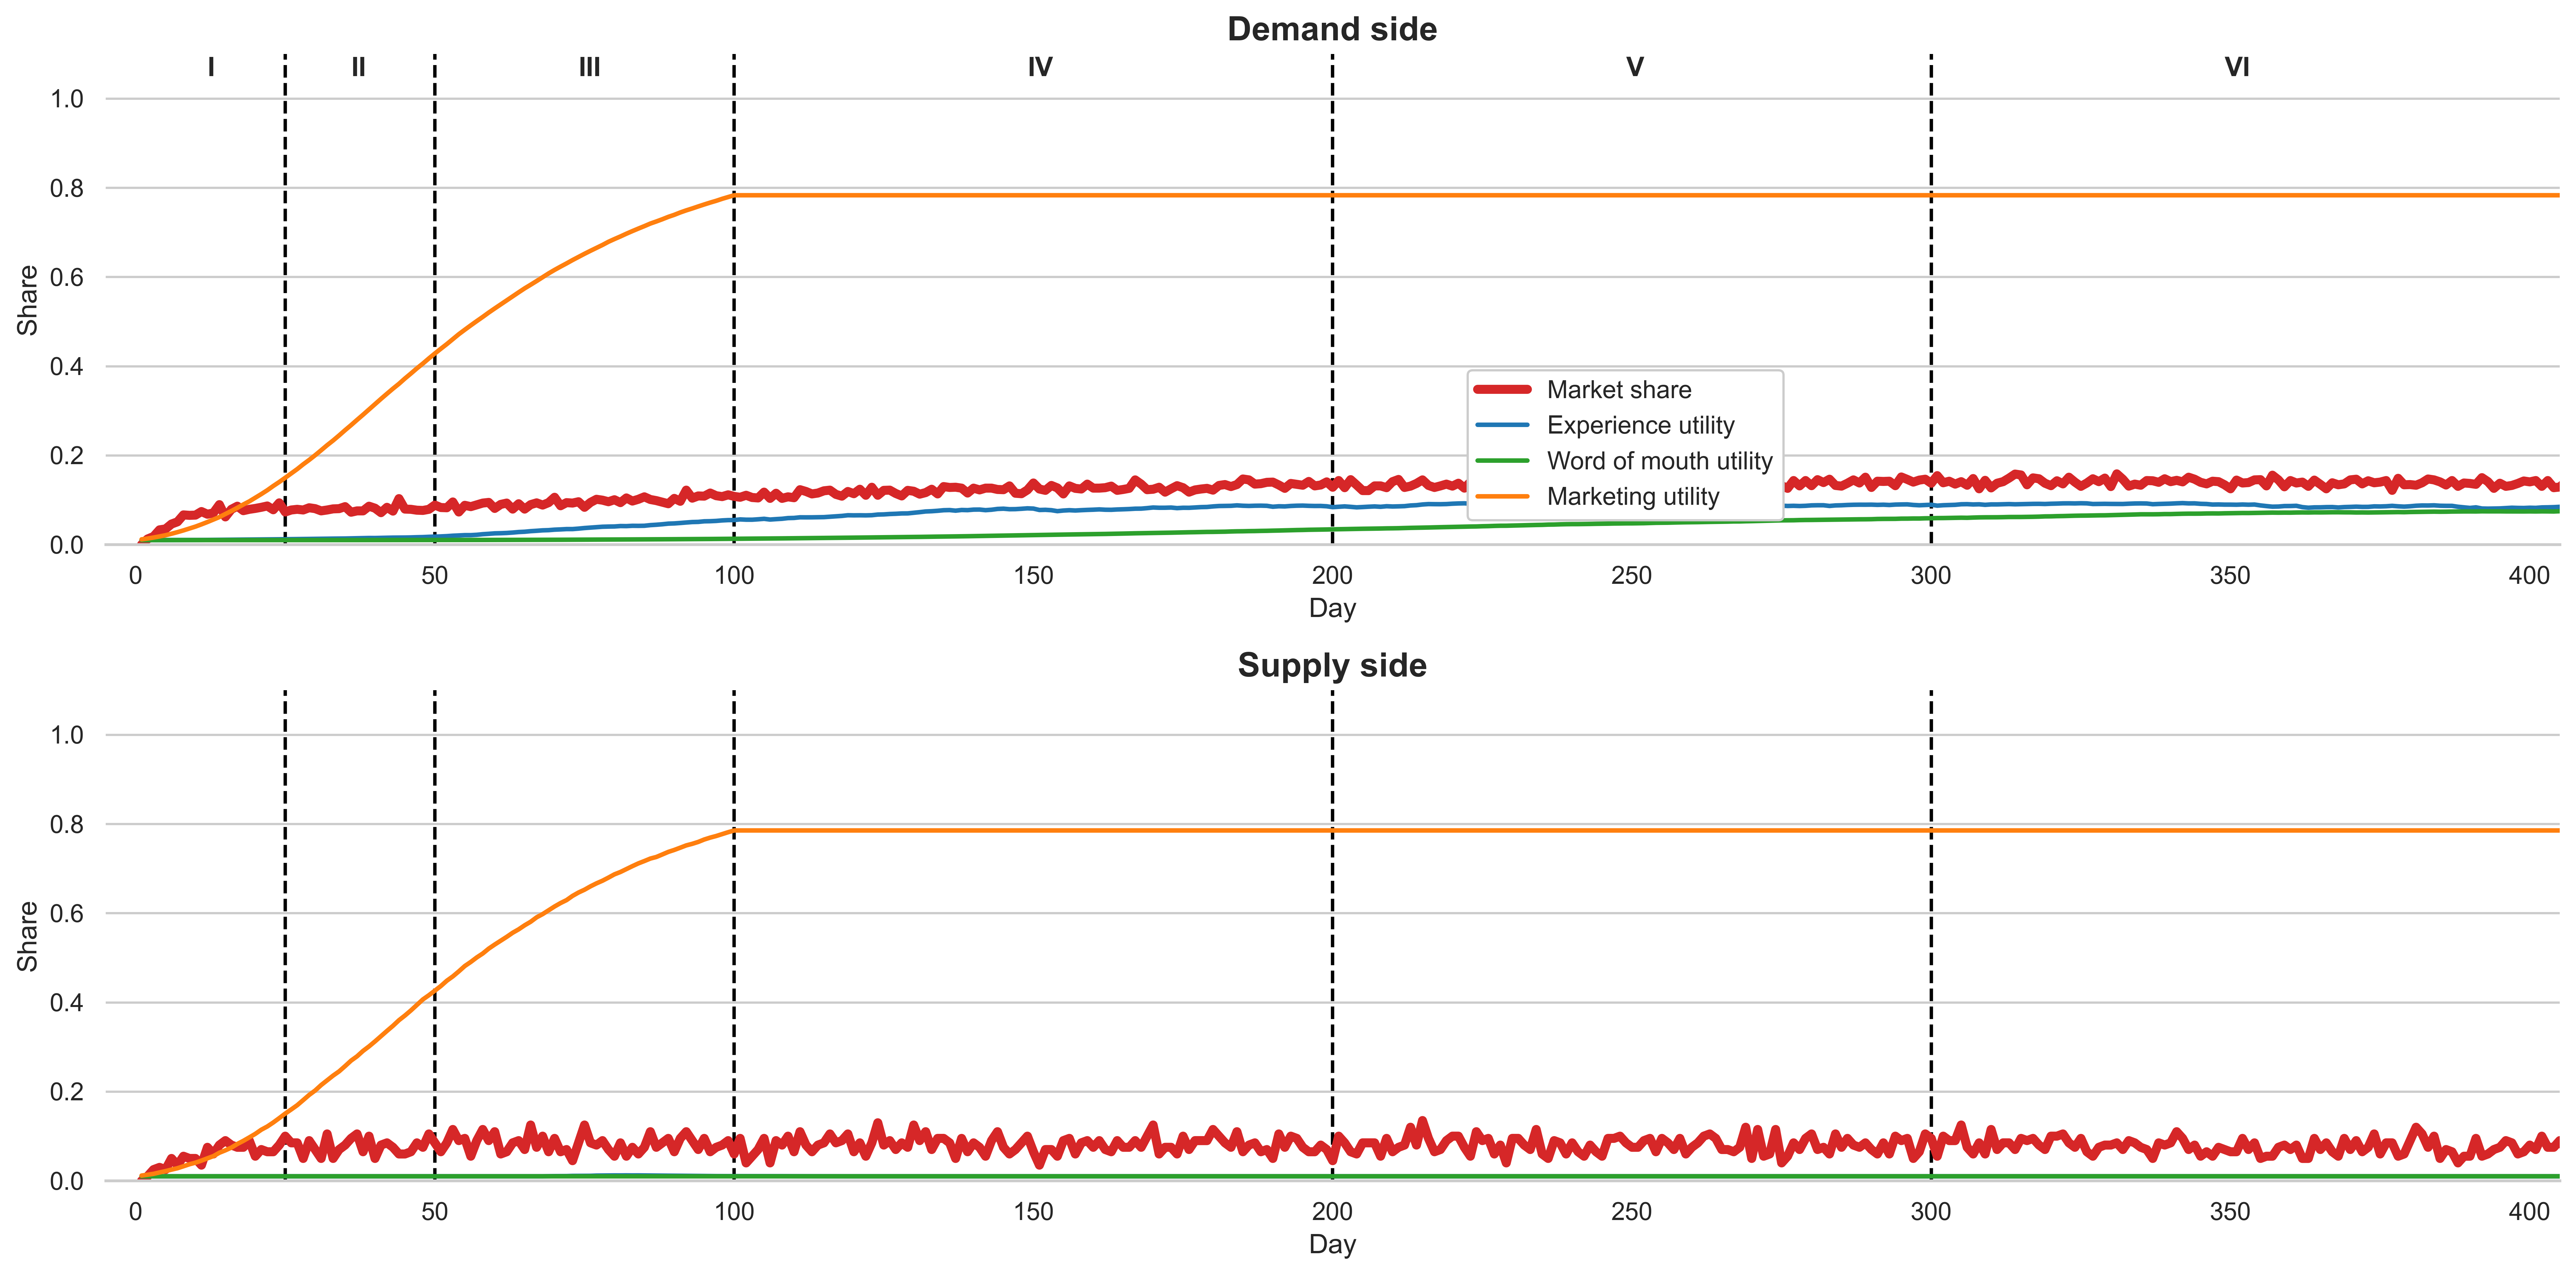

In [17]:
sim0 = sim_rln
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [18]:
sim = sim_rln

In [19]:
sim.res[100].veh_exp

nRIDES  nREJECTED  nDAYS_WORKED  DRIVING_TIME  IDLE_TIME  PICKUP_DIST  \
veh                                                                          
1       0.0        0.0          13.0           0.0        0.0         0.00   
2       0.0        0.0           8.0           0.0        0.0         0.00   
3       0.0        0.0           6.0           0.0        0.0         0.00   
4       0.0        0.0          10.0           0.0        0.0         0.00   
5       0.0        0.0          10.0           0.0        0.0         0.00   
..      ...        ...           ...           ...        ...          ...   
196     0.0        0.0          11.0           0.0        0.0         0.00   
197     0.0        0.0           5.0           0.0        0.0         0.00   
198    12.0        0.0           8.0       11319.0     9536.0        42.59   
199     0.0        0.0           8.0           0.0        0.0         0.00   
200     0.0        0.0           5.0           0.0        0.0         0.00   

     DRIVING_DIST  REVENUE     COST  COMMISSION  ...  \
veh                                              ...   
1            0.00    0.000   0.0000       0.000  ...   
2            0.00    0.000   0.0000       0.000  ...   
3            0.00    0.000   0.0000       0.000  ...   
4            0.00    0.000   0.0000       0.000  ...   
5            0.00    0.000   0.0000       0.000  ...   
..            ...      ...      ...         ...  ...   
196          0.00    0.000   0.0000       0.000  ...   
197          0.00    0.000   0.0000       0.000  ...   
198        113.19   60.912  28.2975      40.608  ...   
199          0.00    0.000   0.0000       0.000  ...   
200          0.00    0.000   0.0000       0.000  ...   

     IS_REJECTED_BY_TRAVELLER  ARRIVES_AT_PICKUP  MEETS_TRAVELLER_AT_PICKUP  \
veh                                                                           
1                           0                0.0                          0   
2                           0                0.0                          0   
3                           0                0.0                          0   
4                           0                0.0                          0   
5                           0                0.0                          0   
..                        ...                ...                        ...   
196                         0                0.0                          0   
197                         0                0.0                          0   
198                         0             4259.0                          0   
199                         0                0.0                          0   
200                         0                0.0                          0   

     DEPARTS_FROM_PICKUP ARRIVES_AT_DROPOFF  CONTINUES_SHIFT  \
veh                                                            
1                    0.0                0.0                0   
2                    0.0                0.0                0   
3                    0.0                0.0                0   
4                    0.0                0.0                0   
5                    0.0                0.0                0   
..                   ...                ...              ...   
196                  0.0                0.0                0   
197                  0.0                0.0                0   
198                360.0             7060.0                0   
199                  0.0                0.0                0   
200                  0.0                0.0                0   

     STARTS_REPOSITIONING  REPOSITIONED  DECIDES_NOT_TO_DRIVE  ENDS_SHIFT  
veh                                                                        
1                       0             0                     0         0.0  
2                       0             0                     0         0.0  
3                       0             0                     0         0.0  
4                   

In [20]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [22]:
sim.res[100].pax_exp.plat_revenue

pax
0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
1995    0.00000
1996    0.00000
1997    0.00000
1998    0.00000
1999    3.35744
Name: plat_revenue, Length: 2000, dtype: float64

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

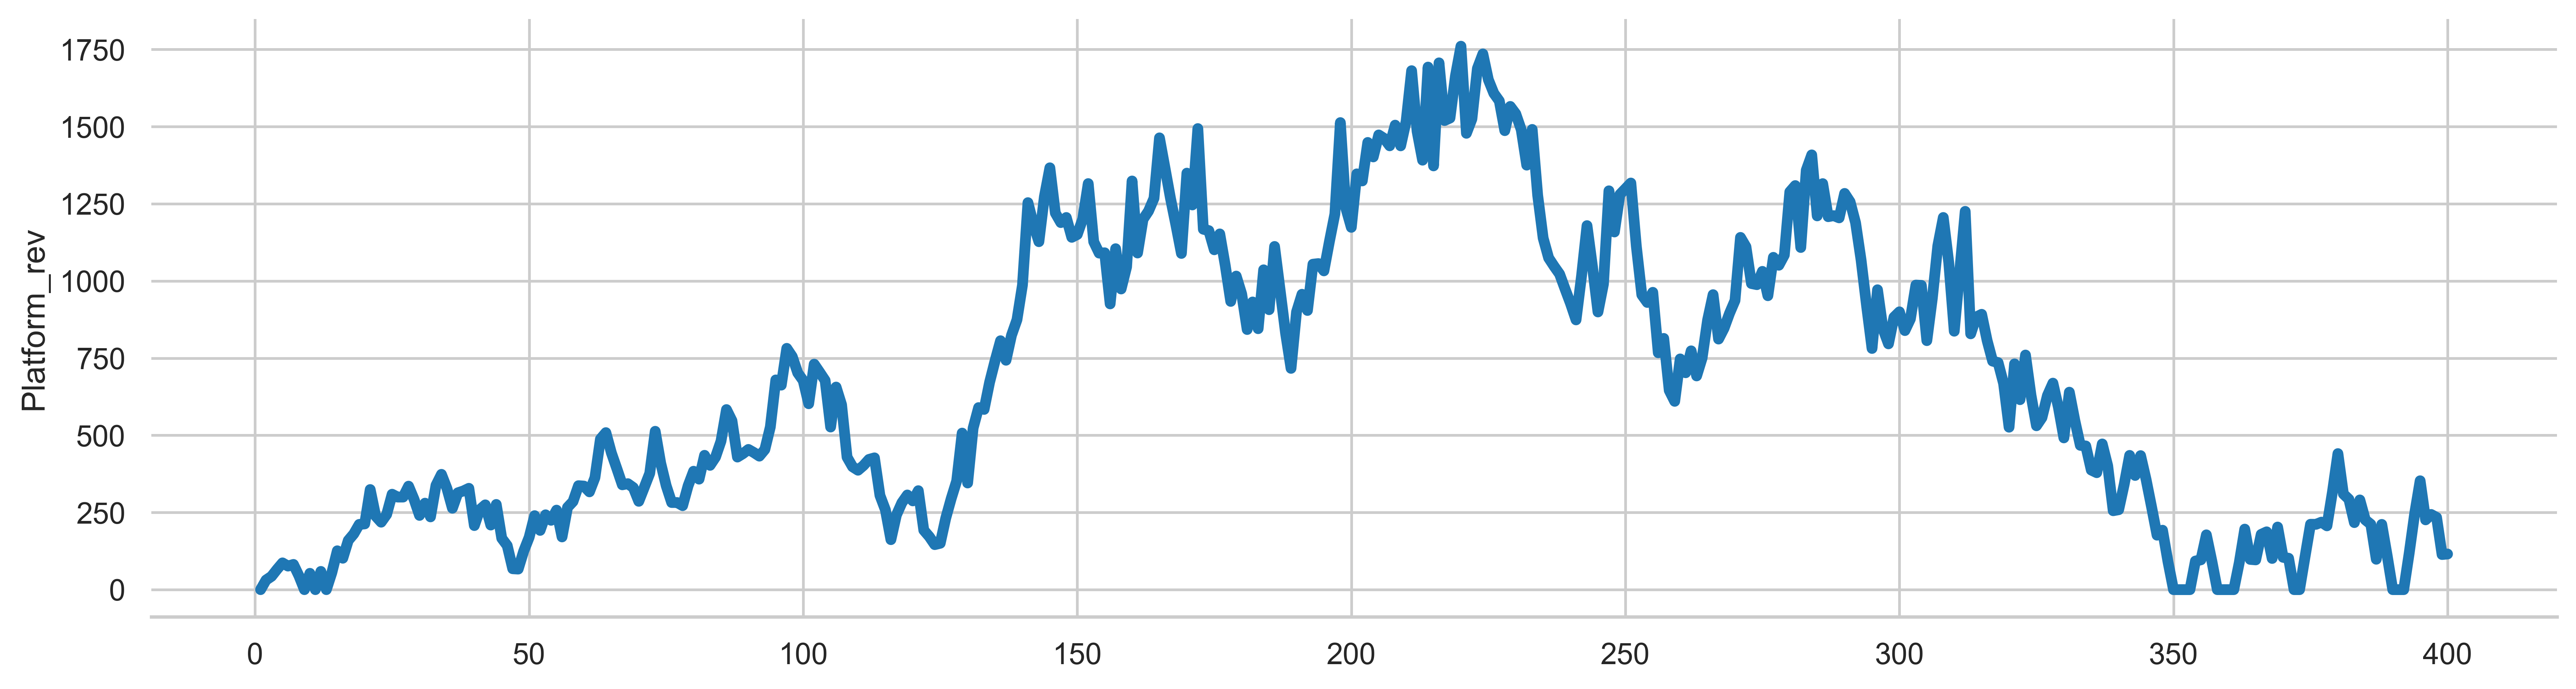

In [23]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

<AxesSubplot:ylabel='Platform_rev'>

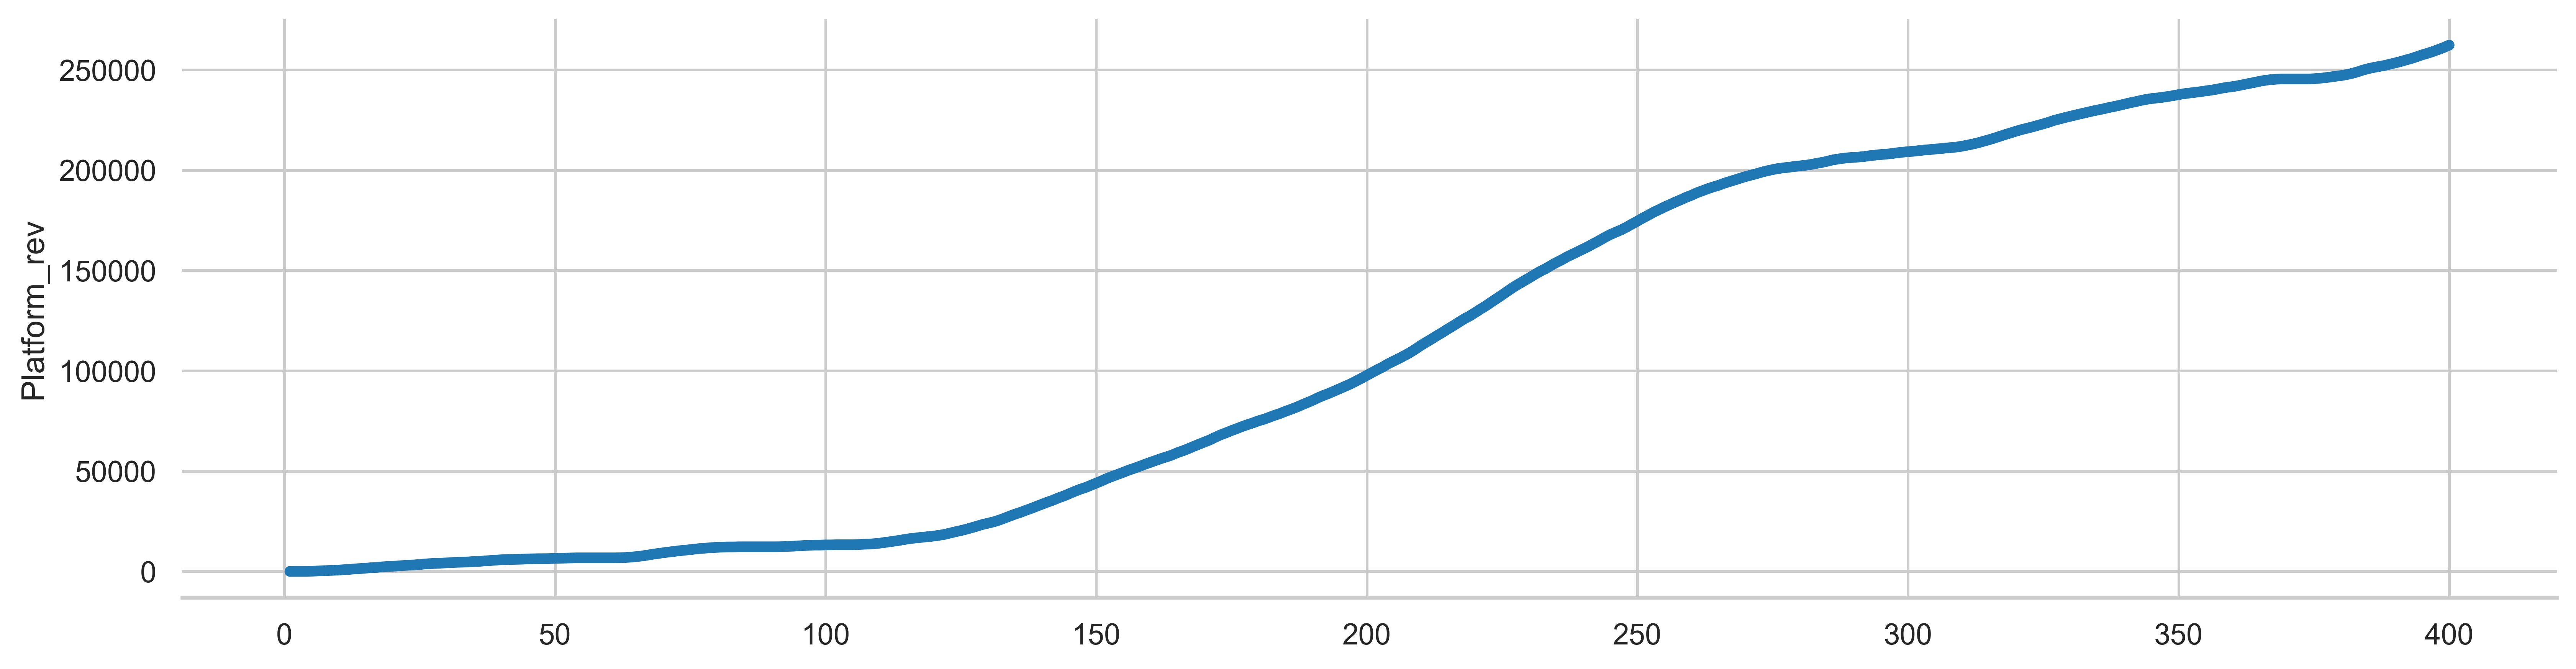

In [22]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [46]:
sim.platforms.fare[1]

1.2

In [16]:
sim

In [34]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0070     0.005      15.29592
2             2    0.0155     0.010      23.63168
3             3    0.0250     0.010      20.00924
4             4    0.0400     0.035      59.92720
..          ...       ...       ...           ...
395         395    0.2650     0.200    1031.77092
396         396    0.2720     0.210    1250.62672
397         397    0.2565     0.190    1178.18820
398         398    0.2725     0.115    1081.69752
399         399    0.2735     0.160    1266.17554

[400 rows x 4 columns]

In [20]:
df.Platform_rev.mean()

655.7543860000001

In [9]:
df.Platform_rev.mean()

604.4805835000008

In [10]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2           0.00000
3           0.00000
4          19.35682
           ...     
395    237676.85714
396    238813.95026
397    239708.00418
398    240677.55240
399    241792.23340
Name: Platform_rev, Length: 400, dtype: float64

In [30]:
df.Platform_rev.mean()

582.0985324000001

In [31]:
df.Platform_rev.cumsum()

0           0.00000
1          13.69388
2          44.78640
3          90.17320
4         149.92560
           ...     
395    228671.27896
396    229671.55656
397    230685.35376
398    231702.18296
399    232839.41296
Name: Platform_rev, Length: 400, dtype: float64

In [28]:
df.Platform_rev.mean()

553.2985028000002

In [35]:
df.Platform_rev.cumsum()

0           0.00000
1          15.29592
2          38.92760
3          58.93684
4         118.86404
           ...     
395    216542.71314
396    217793.33986
397    218971.52806
398    220053.22558
399    221319.40112
Name: Platform_rev, Length: 400, dtype: float64

In [26]:
df.Platform_rev.mean()

602.1789189999998

In [33]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2          13.21864
3          53.39316
4          80.25430
           ...     
395    236196.97054
396    237392.87096
397    238450.85096
398    239605.73920
399    240871.56760
Name: Platform_rev, Length: 400, dtype: float64

In [36]:
20/582

0.03436426116838488

In [ ]:
=====================================================================================

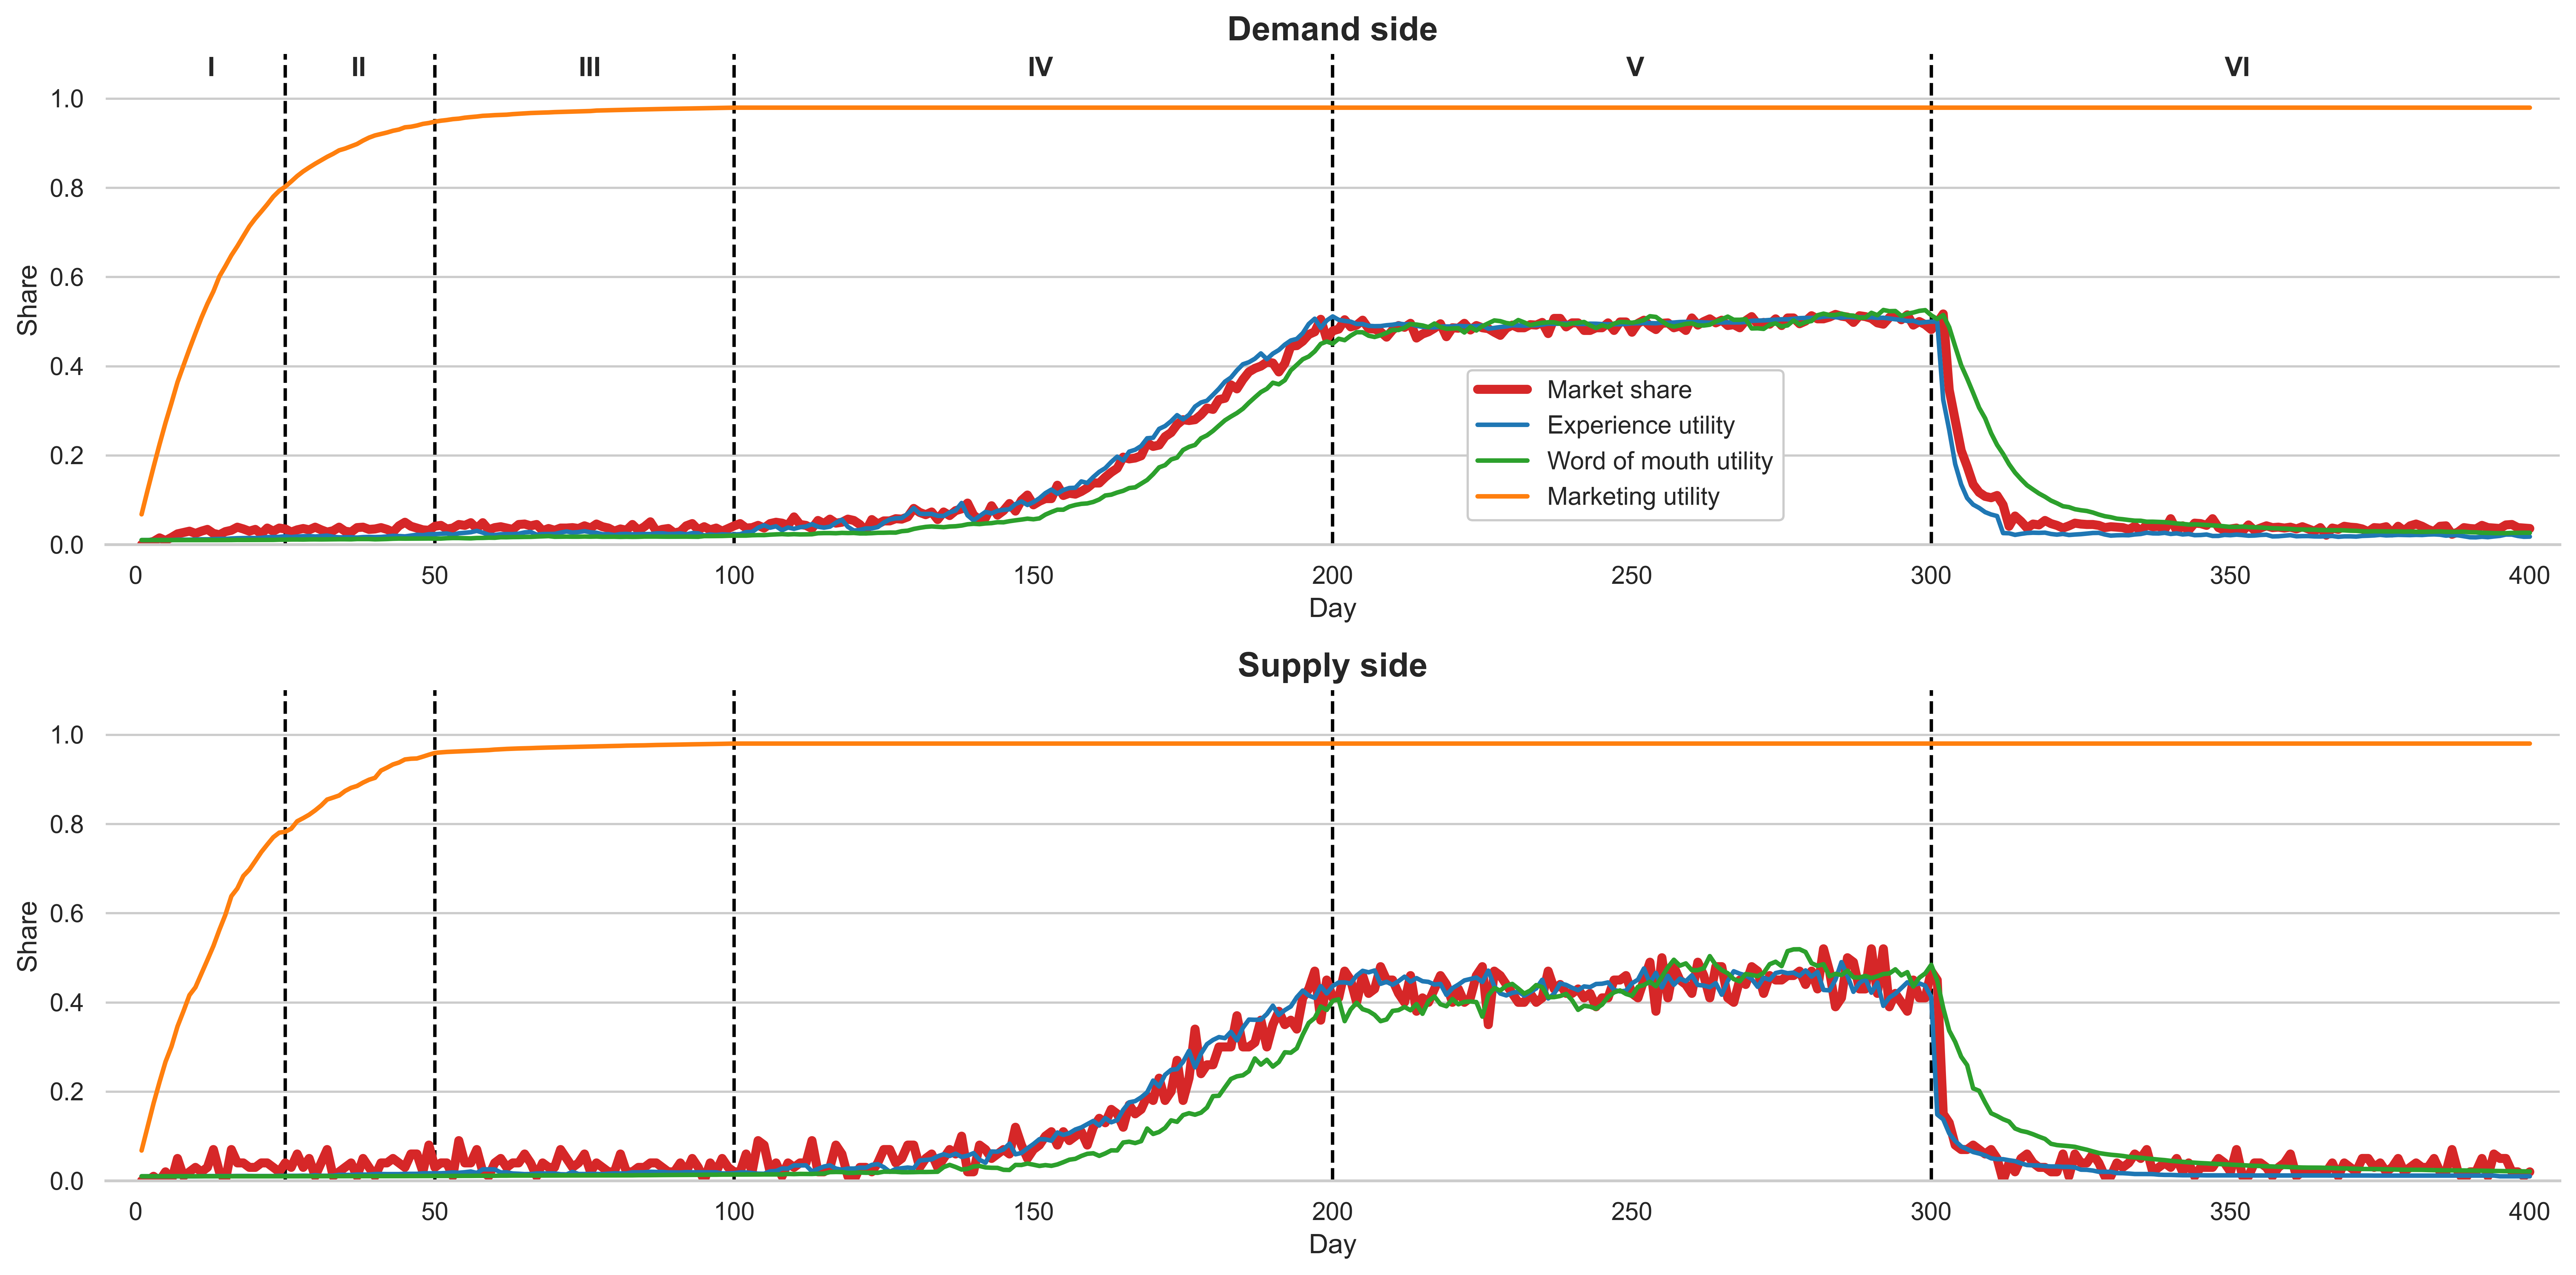

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

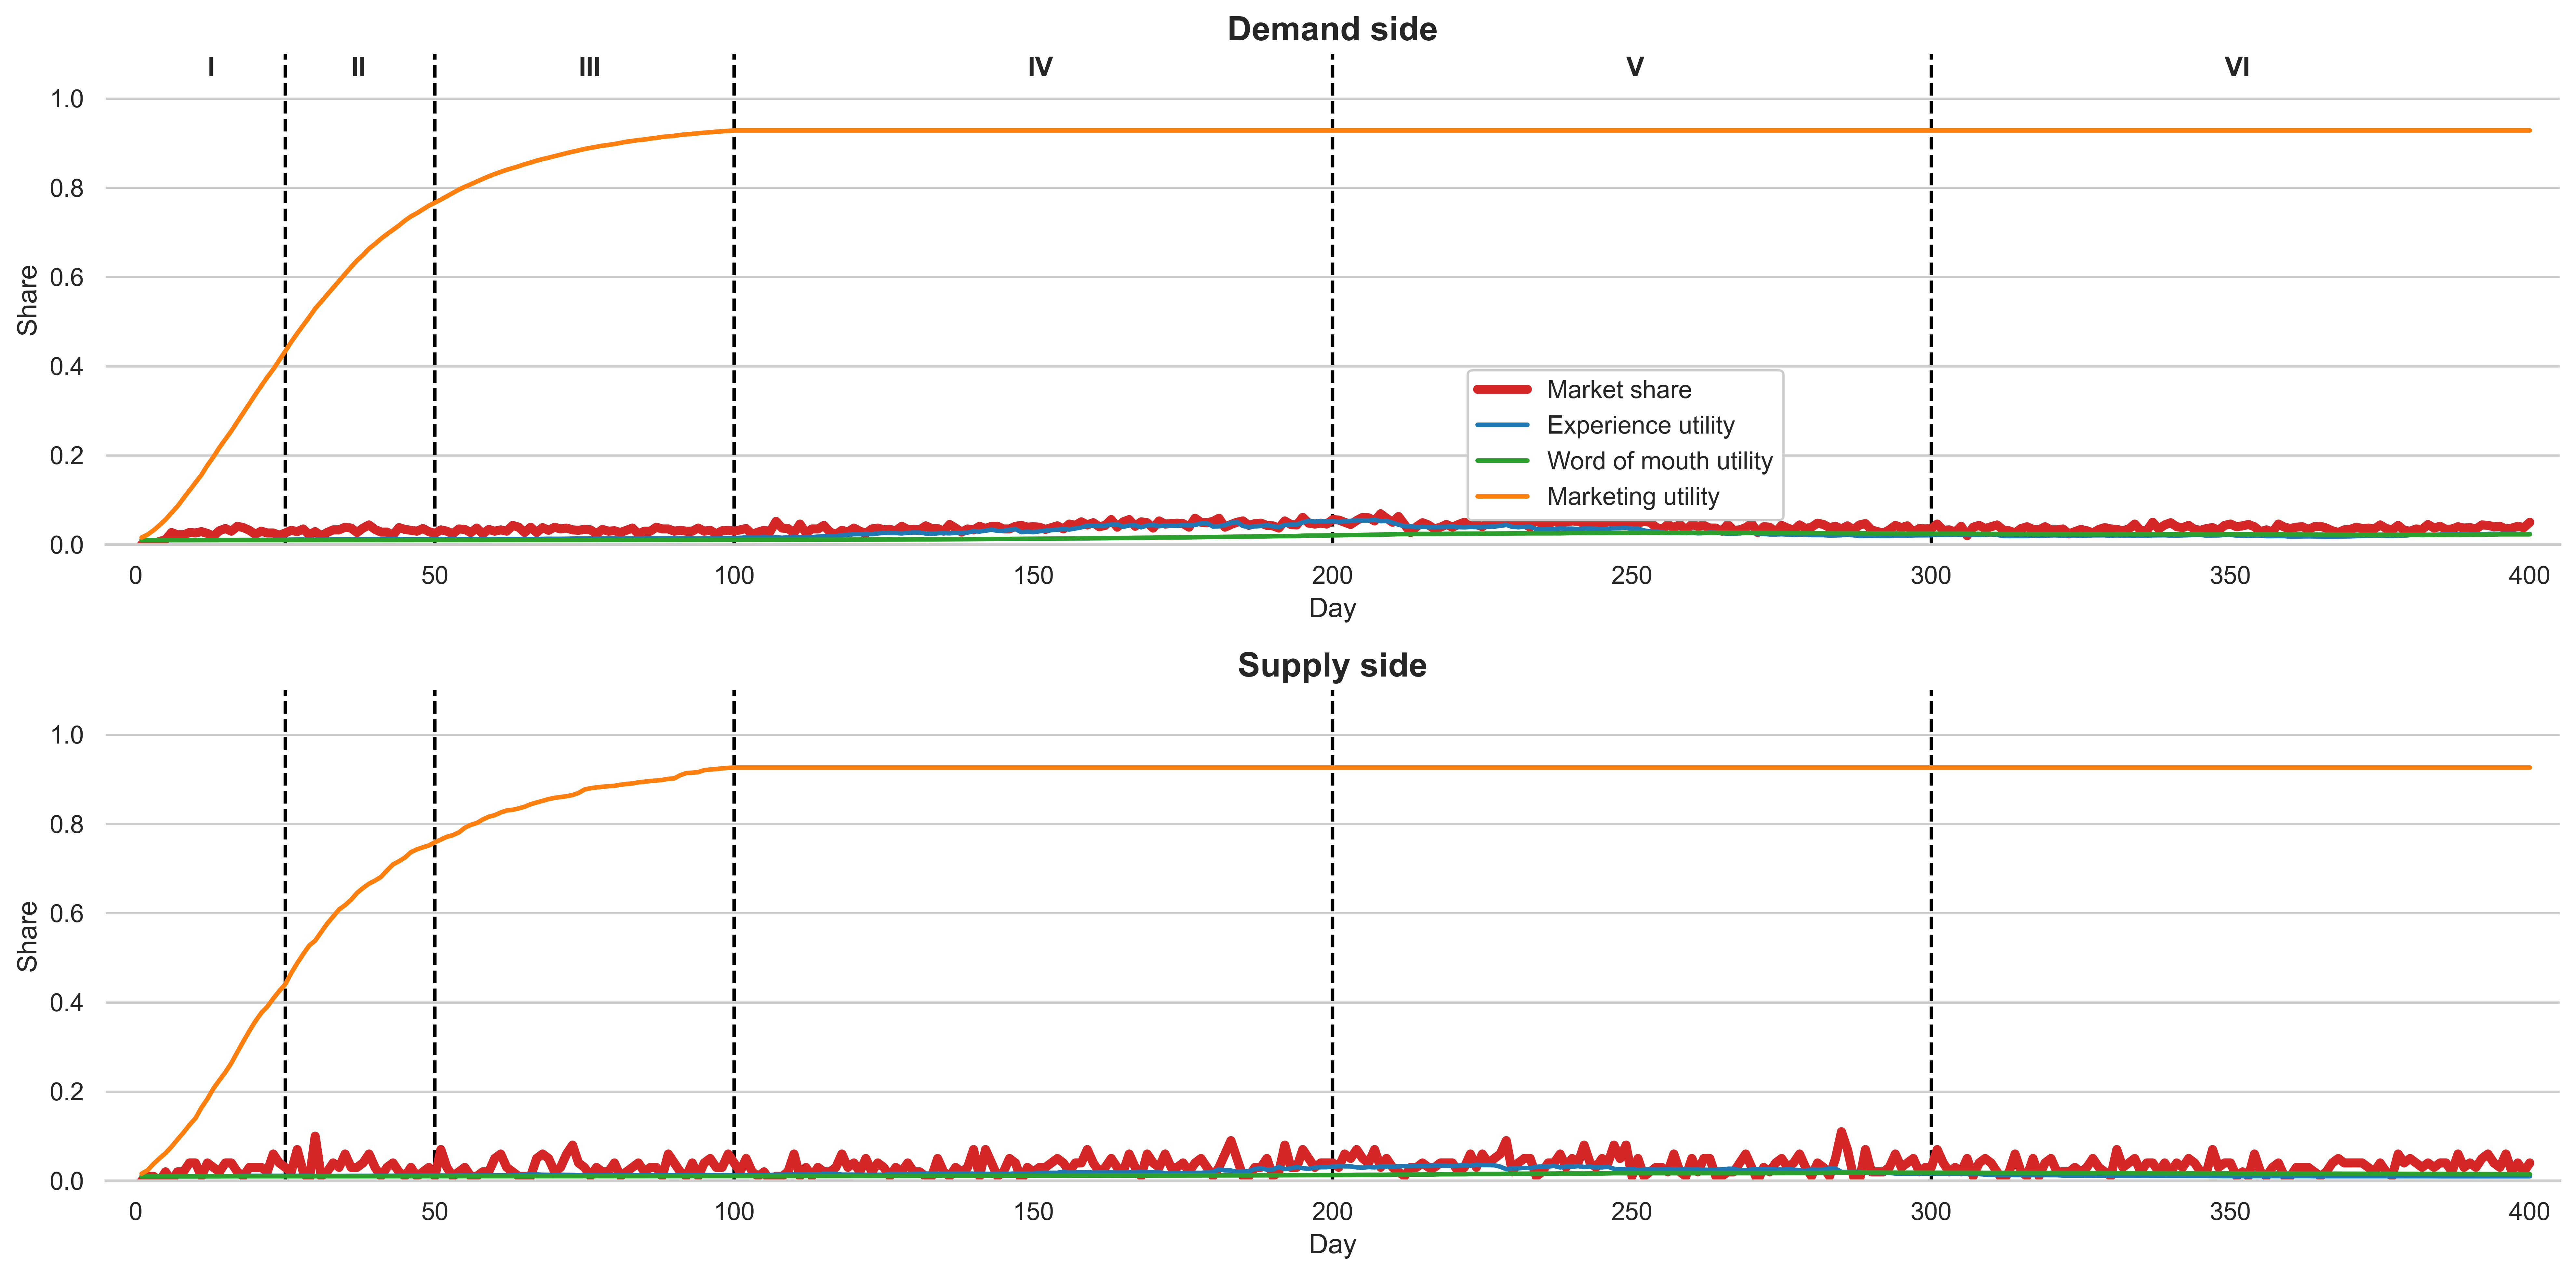

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

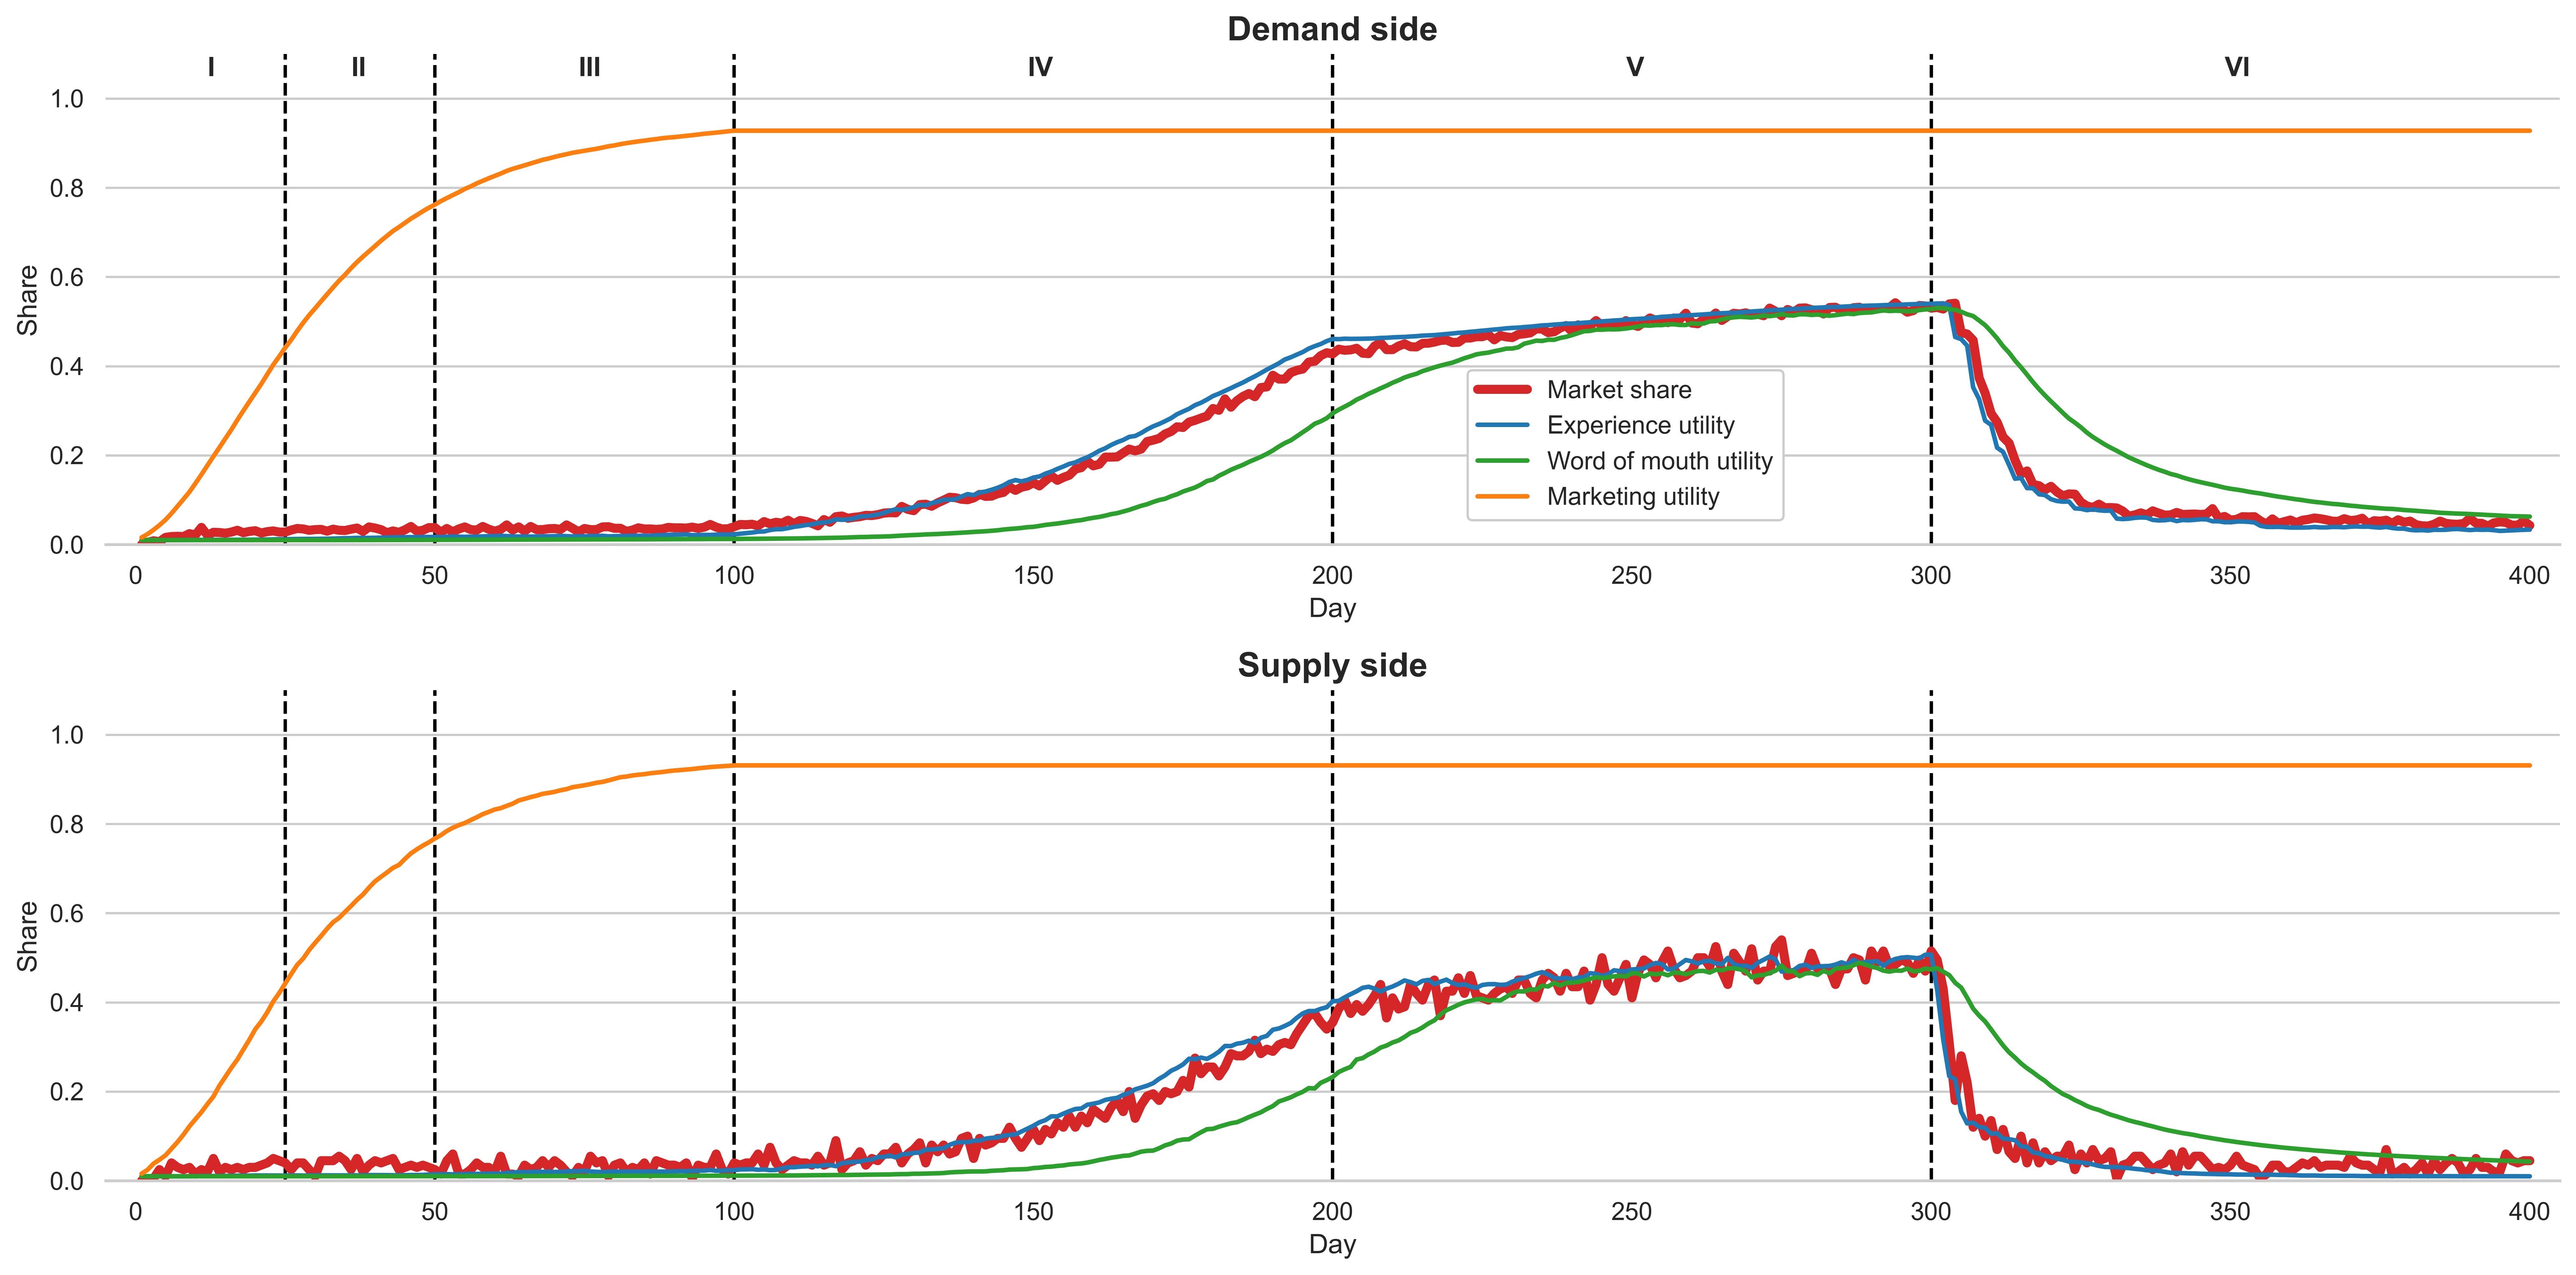

In [7]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

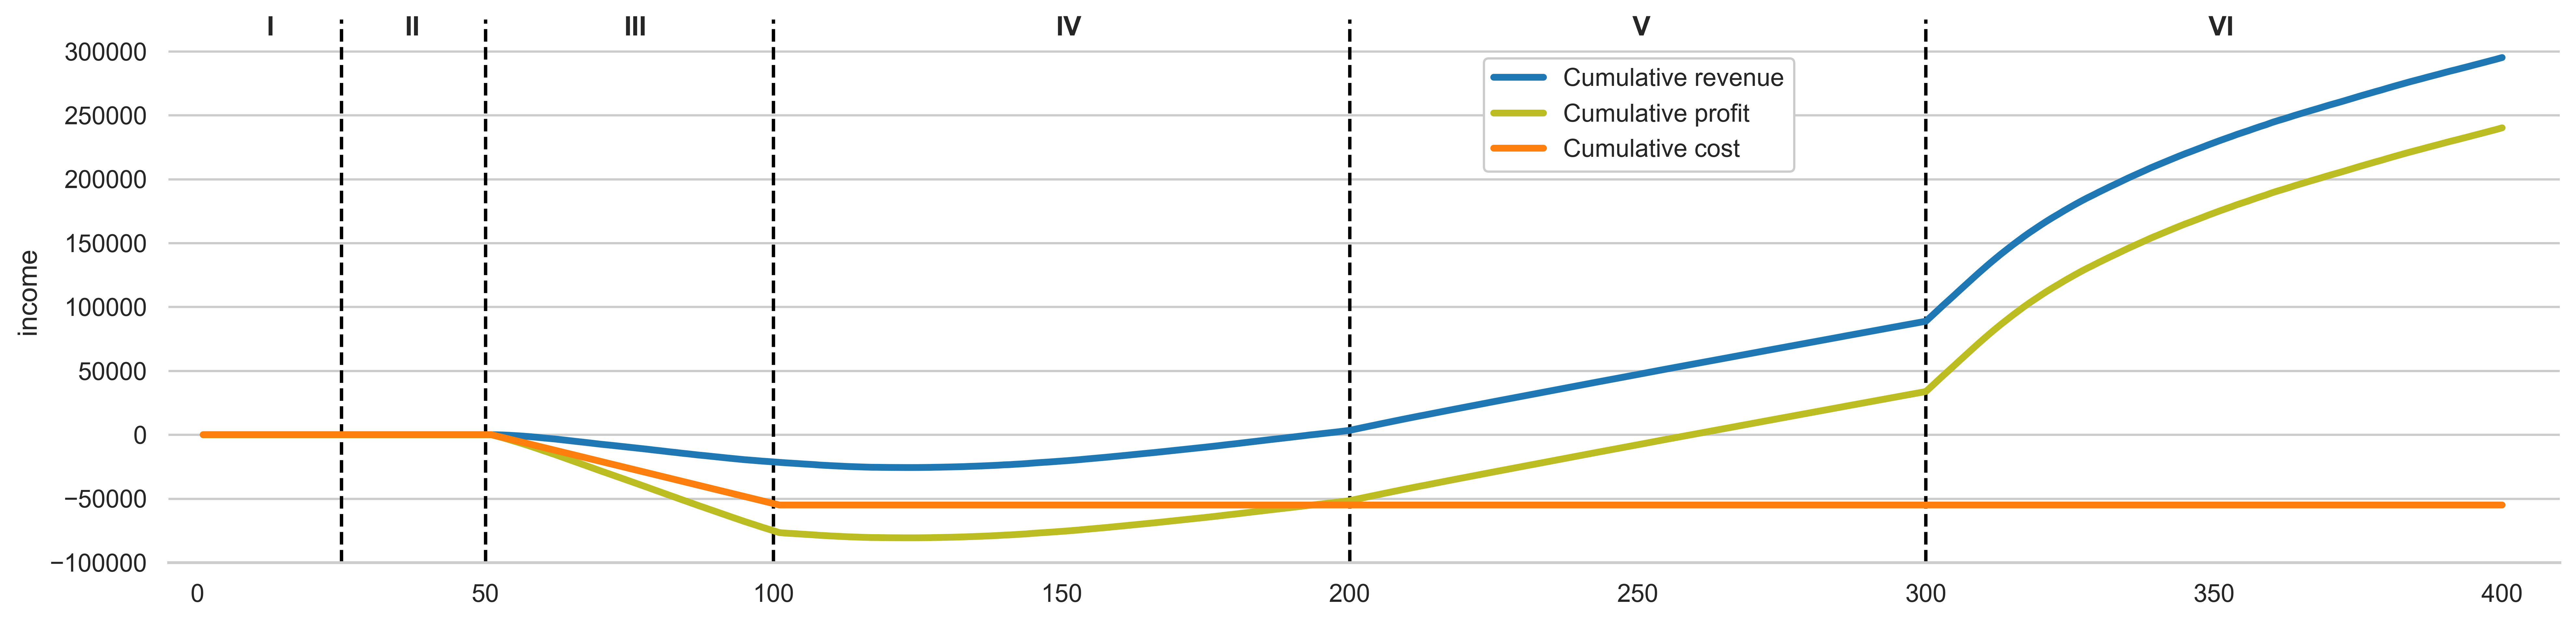

In [177]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [21]:
df = pd.read_csv('csv/baseline_fast.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0120     0.005      21.47460
2             2    0.0220     0.015      34.04332
3             3    0.0300     0.025      42.06120
4             4    0.0325     0.015      49.05952
..          ...       ...       ...           ...
395         395    0.1665     0.115    1123.47240
396         396    0.1555     0.080    1085.47640
397         397    0.1495     0.105     993.22100
398         398    0.1590     0.060    1099.28520
399         399    0.1540     0.090    1055.16860

[400 rows x 4 columns]

In [22]:
df.Platform_rev.max()

4098.8442

In [ ]:
2638.8502